# Std for logP value of duplicates

Most of the **std** values are located in range $[0; 1]$, whereas most of **logP** values are in range $[0; 2]$ with overall **std** = $1.87$

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
DATASETS_PATH = Path("../data/3_final_data")

In [13]:
logP_dataset = pd.read_csv(os.path.join(DATASETS_PATH,'logP.csv'))

In [7]:
logP_dataset.head()

smiles  logP
0  COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21  4.17
1     COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O  2.79
2       CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1  1.60
3  CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC  3.96
4      C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1  5.30

In [12]:
logP_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  14111 non-null  object 
 1   logP    14111 non-null  float64
dtypes: float64(1), object(1)
memory usage: 220.6+ KB


In [8]:
VALUE_COLUMN = "logP"
SMILES_COLUMN = "smiles"

In [14]:
duplicates_std = logP_dataset.groupby([SMILES_COLUMN]).std().dropna()

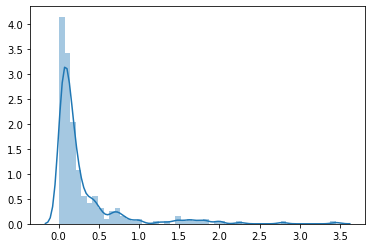

In [17]:
# distribution of std values of duplicates
sns.distplot(duplicates_std)

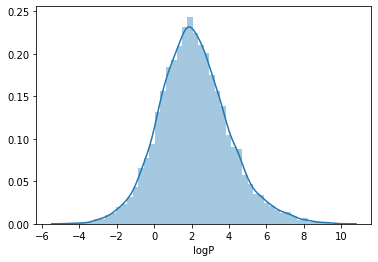

In [15]:
# distribution of logP values 
sns.distplot(logP_dataset[VALUE_COLUMN])

In [18]:
logP_without_duplicates = logP_dataset.drop_duplicates(subset=SMILES_COLUMN)

In [22]:
print('Standard deviation of logP value in the whole dataset without duplicates is', round(logP_without_duplicates[VALUE_COLUMN].std(),2))

Standard deviation of logP value in the whole dataset without duplicates is 1.87


In [35]:
ranges = [0, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
duplicates_std[VALUE_COLUMN].groupby(pd.cut(duplicates_std[VALUE_COLUMN], ranges)).count()

logP
(0.0, 0.1]    109
(0.1, 0.2]     74
(0.2, 0.5]     56
(0.5, 1.0]     26
(1.0, 1.5]      5
(1.5, 2.0]      9
(2.0, 2.5]      2
(2.5, 3.0]      1
(3.0, 3.5]      1
Name: logP, dtype: int64

In [36]:
logP_dataset.describe()

logP
count  14111.000000
mean       2.127711
std        1.876122
min       -4.650000
25%        0.890000
50%        2.030000
75%        3.260000
max        9.960000

# Number of atoms in molecules in PhysProp and LogP datasets

Distribution of number of atoms shows that additional datasets (logP, NCI, Diverse) **haven't contributed significantly** to number of large molecules (which usually are presented in industrial datasets)

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from rdkit import Chem
import sys
sys.path
sys.path.append('../scripts/preprocess')
from remove_strange_mols import remove_strange_mols

In [2]:
DATASETS_PATH_1 = Path("../data/3_final_data")
DATASETS_PATH_2 = Path("../data/2_standardize")

In [3]:
logP_dataset = pd.read_csv(os.path.join(DATASETS_PATH_1,'logP.csv'))
physprop_dataset = pd.read_csv(os.path.join(DATASETS_PATH_2,'physprop.csv'))

In [4]:
VALUE_COLUMN = "logP"
TEMPERATURE_COLUMN = "Temperature"
PH_COLUMN = "pH"
SMILES_COLUMN = "smiles"
NUM_ATOMS_COLUMN = "NumAtoms"

In [5]:
physprop_dataset = physprop_dataset.drop(columns=[TEMPERATURE_COLUMN], axis = 1)

In [6]:
def create_dataset(dataFrame, columns, filename, save_path = "../data/raw"):
    dataset = dataFrame[columns].dropna()
    dataset = dataset.drop_duplicates()
    initial_size = dataset.shape[0]
    dataset.to_csv(os.path.join(save_path, filename), index= False)
    remove_strange_mols(os.path.join(save_path, filename), os.path.join(save_path, filename))
    dataset = pd.read_csv(os.path.join(save_path, filename))
    return dataset, initial_size

In [7]:
physprop_dataset, physprop_init_size = create_dataset(physprop_dataset, [SMILES_COLUMN, VALUE_COLUMN], 'physprop_remove_strange_mols.csv')

2020-07-07 12:59:27.820 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(c2ccccc2)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.827 | DEBUG    | remove_st

2020-07-07 12:59:27.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2 isn't in 

2020-07-07 12:59:27.908 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCBr)N1CCN(C(=O)CCBr)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CCc2nnnn2CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccc1 isn't in the list of very soluble in wat

2020-07-07 12:59:27.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(O)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C1C(=O)C(C(N)=O)C(=O)C2(O)C(=O)C3C(=O)c4c(O)ccc(Cl)c4C(C)(O)C3CC12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)S(=O)(=O)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:27.959 | DEBUG    | remove_strange_mols:check_not

2020-07-07 12:59:28.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C(=O)NNCc2ccccc2)no1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]nc(S(N)(=O)=O)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)NN=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCOCC1 is

2020-07-07 12:59:28.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC3C(CC=C4CC(=O)CCC43C)C1CCC2=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSCCC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.046 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1=CCCN(C)C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)O isn'

2020-07-07 12:59:28.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(=O)C1(O)C(OC(C)=O)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CS isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.088 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.089 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C=CC1=C(C)CCCC1(C)C)=CC=CC(C)=CCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.089 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - 

2020-07-07 12:59:28.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CBr isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.127 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.128 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.129 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.129 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.130 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CI isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.131 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-07 12:59:28.170 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.170 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.

2020-07-07 12:59:28.212 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(Br)(CC)C(=O)NC(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C)CC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.214 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(C#N)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CC(O)(CC(=O)O)C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.216 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CO)(CO)CO isn't in the list of very 

2020-07-07 12:59:28.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)N(C)N=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC(C)(C)C1CC=C(C)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(=NS(=O)(=O)c2ccc(N)cc2)[nH]n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOS(=O)(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(OOC(

2020-07-07 12:59:28.338 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=Cc1ccc2c(O)c3ccccc3c(O)c2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1c2ccccc2C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccccc1C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCCCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC

2020-07-07 12:59:28.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(C)c(C)c(C)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.382 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=O)C(O)C(O)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(O)cc(C)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)O isn't in the list o

2020-07-07 12:59:28.422 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccccc1[Hg]Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.424 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-

2020-07-07 12:59:28.466 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CCO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.467 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.468 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(N2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(N2CCNCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC(OC(C)=O)c1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.471 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2cc3ccc(N)cc3nc2c1 isn't in

2020-07-07 12:59:28.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OCCO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OOC(=O)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.516 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.517 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OCc1ccccc1)c1cccnc1 isn't i

2020-07-07 12:59:28.615 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.616 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C2CO2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC(Br)CBr isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC(Cl)CCl isn't in the list of very soluble in water molecules
2020

2020-07-07 12:59:28.656 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.657 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.658 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.659 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OB(O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)c1ccccc1 isn't in the list of very soluble

2020-07-07 12:59:28.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)O)cc1 isn't in the list of very soluble in w

2020-07-07 12:59:28.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CN2CCC1CC2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1nc(=Nc2ccccc2Cl)nc(Cl)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.746 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)Nc1cccc(Cl)c1 isn't in the list 

2020-07-07 12:59:28.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CNc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28

2020-07-07 12:59:28.886 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.887 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CC(=O)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.888 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=S)NCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.888 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(C)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.889 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.890 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(O)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 

2020-07-07 12:59:28.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=NO isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.932 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)CC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OP(C)(=O)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.933 | DEBUG    | re

2020-07-07 12:59:28.973 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.973 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:28.978 | DEBUG 

2020-07-07 12:59:29.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=CC=CC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCBr isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCN isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCN isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.022 | DEBUG    | remove

2020-07-07 12:59:29.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOCCOC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.062 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCCOCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:2

2020-07-07 12:59:29.139 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=CC(C)(C)SC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(c1ccc(Cl)cc1)c1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c(Cl)c(Cl)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C2C(

2020-07-07 12:59:29.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(-c2nc3ccccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.181 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2cc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=O)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(O)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.184 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCN)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccc2ccccc2c1 isn't in the 

2020-07-07 12:59:29.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]c(OC)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.224 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.225 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc

2020-07-07 12:59:29.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCNCC=C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules


2020-07-07 12:59:29.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(I)c(=O)n(-c2ccccc2)n1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)O[Na])c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.306 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CC(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.307 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(Cl)c2cccnc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccccc1C(=O)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)c1ccccc1C(=O)

2020-07-07 12:59:29.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=S)SSC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=S)S[Zn]SC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(C(=O)O)cc1 isn't in th

2020-07-07 12:59:29.437 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(O)C(C)(C)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CI isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.440 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.441 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)N=c2cc

2020-07-07 12:59:29.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC=CCl isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc[nH]c(=S)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1=c2ccc3c4c(ccc(c24)=C1)=CC=3 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cnc2c(c1)cc1ccc3cccc4ccc2c1c34 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.516 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc2ccc3ccc4ccc5ccc6ccc1c1c2c3c4c5c61 isn't in 

2020-07-07 12:59:29.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Oc1ccccc1O2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Oc1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2cc3sccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc2ccsc2cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.596 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nocc2c1 isn't in the list of very solubl

2020-07-07 12:59:29.651 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.652 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)OC(Br)C(Cl)(Cl)Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.653 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC=CCC=CCC=CCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.654 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)CCSP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.655 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NN isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.655 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(O)C(Cl)(Cl)Cl isn't in the list of very soluble i

2020-07-07 12:59:29.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C(C)C)cc(C(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.696 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.697 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.699 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1cc(C)

2020-07-07 12:59:29.737 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(O)C=CC1C(O)CC(=O)C1CC=CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.738 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cc(F)c(F)c(F)c1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.739 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc(F)ccc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.741 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-07 12:59:29.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccc(F)cc1 isn't in the list of very soluble

2020-07-07 12:59:29.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)O)cc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.824 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.824 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cccc(CCl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)Sc1ccccc1 isn't in the list of very soluble in water mo

2020-07-07 12:59:29.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)OC(=CCl)c1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CCC12C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CC(=O)c2c(O)ccc(O)c21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(=O)C(O)C3 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.870 |

2020-07-07 12:59:29.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCC2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)COC2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCO2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccocc1O isn't in the list of very soluble in water molecu

2020-07-07 12:59:29.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(OC(C)=O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C2=CCCCCC2)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C1C(=O)OC2C1CCC(C)C1=CCC(=O)C12C isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(O)(c1ccc(Cl)cc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:29.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-07 12:59:30.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.005 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.008 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1cnc2[nH]c(=N)[nH]c(=N)c2n1)c1c(Cl)cc(C(=O)NC(CCC(=O)O)C(=O)O)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.009 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.010 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:30.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.049 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCc1ccccc1 isn't in the list of very soluble in water mo

2020-07-07 12:59:30.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(C)=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1cnc2[nH]c(=O)[nH]c(=O)c21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN

2020-07-07 12:59:30.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C1(c2ccccc2)CCN(CCC(O)c2ccccc2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CCC(O)(C(C)C)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)SCSP(=S)(OCC)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.148 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1OC1C1CO1 isn't in the list of 

2020-07-07 12:59:30.245 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccccc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2cc3ccccc3nc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc2ccccc2cc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2cc(C)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc2cc(O)ccc2c1 isn't in the list of very sol

2020-07-07 12:59:30.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(O)CCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.289 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(O)CCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.290 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(O)CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.291 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCC(O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.291 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCC(=O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:3

2020-07-07 12:59:30.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.330 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Cl)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.332 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(NO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)N=c2cc[nH]cn2)cc1 isn't in the list of very so

2020-07-07 12:59:30.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cccc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.392 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.392 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c(Br)cccc1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.393 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(O)ccc(O)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.394 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.395 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)c(Cl)c(Cl)c1 isn't in the list of very soluble i

2020-07-07 12:59:30.433 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Cc1ccccc1C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.434 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(-c2ccc(C)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.435 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.436 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.437 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1ccccc1 isn't in the

2020-07-07 12:59:30.501 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc([N+](=O)[O-])ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.503 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccc(CO)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.516 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(N)cc1

2020-07-07 12:59:30.570 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ON=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [N-]=[N+]=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)=Nc1ccccc1 isn't in the list of very soluble in water molecu

2020-07-07 12:59:30.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCc1cccc(CCl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cc(Br)cc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in wa

2020-07-07 12:59:30.680 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.681 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cl)cc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cl)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCCN2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-n2cccc2)cc1 isn't in the list of very 

2020-07-07 12:59:30.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ncc[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)c(C)cc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNNCc1ccc(C(=O)NC(C)C)cc1 isn't in

2020-07-07 12:59:30.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(O)c(C)c(C)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc([N+](=O)[O-])c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)(Cl)Sc1ccccc1 isn't in the list of v

2020-07-07 12:59:30.841 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.841 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(C)(=O)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.842 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.843 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(N=O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.844 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)C(=O)SCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.845 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CN(N=O)C(N)=O isn't in the list of very soluble in water molecules
2020-

2020-07-07 12:59:30.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.884 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccsc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.885 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1CCCCC1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.885 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ncccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.886 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(O)ccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.887 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-

2020-07-07 12:59:30.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccs1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.927 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1ccncc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C2CC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(O[Na])c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07

2020-07-07 12:59:30.972 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCCCCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.973 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1cccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:30.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N1CCCC1=O isn't in the list of very soluble in water molecules
2020-0

2020-07-07 12:59:31.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CC(C#N)=NNc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(COc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCCCCCCCCCCN1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc2ccccc2c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(N)Cc1ccc(O)cc1 isn't in the

2020-07-07 12:59:31.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(CC)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C2CCCN2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(Cl)nc(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ccccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCNC(=O)c1ccccc1 isn't in the list of very solub

2020-07-07 12:59:31.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.163 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)S(=O)(=O)N(SC(F)(Cl)Cl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.163 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.164 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.166 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C(=Nc2ccccc2)C(Cl)C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.167 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-07 12:59:31.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC#Cc1ccc(-c2cccs2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(Cc1ccccc1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=CC(=O)O)ccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1cccc(NC(N)=O)c1 

2020-07-07 12:59:31.245 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=Cc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OC(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(O)c1ccccc1)N(C)C isn't in the list of very s

2020-07-07 12:59:31.289 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(OC)c2c(c1)OC(C)(C)C1CC=C(C)CC21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.290 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.290 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.291 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccccc1-c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.292 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1noc(-c2ccccn2)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.293 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(N=O)CC(C)O1 isn't in the list

2020-07-07 12:59:31.332 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc2c1OC(C)(C)C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.333 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(O)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c

2020-07-07 12:59:31.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(OCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.375 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.376 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.377 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCC=C1c2ccccc2COc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.378 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(

2020-07-07 12:59:31.416 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)SC2C(NC(=O)CCOc3ccccc3)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.417 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.418 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(C)ccc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.418 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Oc1ccc(Cl)cc1)N1CCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.419 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.420 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC[Pb](C)(C)C isn't in the

2020-07-07 12:59:31.459 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.460 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.460 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.461 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.462 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.463 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OCC(=

2020-07-07 12:59:31.500 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)C1(N2CCCCC2)CCN(CCCC(=O)c2ccc(F)cc2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.502 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.502 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(=N)c2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.503 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(S(N)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.504 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.505 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=

2020-07-07 12:59:31.589 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC=CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSC(=O)N(CC(C)C)CC(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.592 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(O)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.594 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-]

2020-07-07 12:59:31.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.635 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C1NCCCN1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.636 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.637 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(I)cc1 isn't in the list of very soluble in water m

2020-07-07 12:59:31.673 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.674 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OC1(C(=O)CO)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.677 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(O)cc1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.678 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-07 12:59:31.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(N)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCC#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1Oc1ccccc1 

2020-07-07 12:59:31.758 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C1CC(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1=CC(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.761 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.762 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc([N+](=O)[O-])c2c([N+](=O)[O-])cccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.763 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(

2020-07-07 12:59:31.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1c2ccccc2nc2n1CCCC2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccncn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCN isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(OCCN(C)C)c1 isn't in the list of very 

2020-07-07 12:59:31.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(Br)o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.940 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOP(=O)(OCCCC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.941 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2c(ccc3ccccc32)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.943 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC1(CC(C)O)C(=O)NC(=O)NC1=O isn't in th

2020-07-07 12:59:31.981 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1OC(=O)NC isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1ccc(C#N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1cccc[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.984 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)SCn1nnc2ccccc2c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.985 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc2c3ccccc3ccc2c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:31.986 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CNC(=O)c1ccc([N+](=O)

2020-07-07 12:59:32.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCc1ccco1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.033 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2c(c1)N(CCCN1CCN(CCO)CC1)c1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1(C(=O)O)CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.037 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)c(Cl)c1)C1C

2020-07-07 12:59:32.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC(=O)CC(C)(C)N1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N=c1[nH]c(Cl)nc(=NCCO)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.088 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)c(C#[N+][O-])c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.090 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C

2020-07-07 12:59:32.131 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.132 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(OC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.133 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccccc1)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.134 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(O)cc(C)c(O)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)Oc1ccc(SC)cc1 isn't in 

2020-07-07 12:59:32.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C=C[N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=C[N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.227 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.230 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NC(=O)c1ccccc1 isn

2020-07-07 12:59:32.274 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.275 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.276 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.277 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.278 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cnnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.279 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC

2020-07-07 12:59:32.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)NC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)NN)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=O)ss1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cssc1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C2=CC3CCC(C2)C3)C(=O)NC(=O)NC1=O isn't in the list of very soluble 

2020-07-07 12:59:32.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1ccccc1OC(=O)NC isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(C)C)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(N(CCO)CCO)ccc1N=Nc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.389 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-07 12:59:32.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCC(=C2c3ccccc3CCc3cccnc32)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)ccc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccc(OC(=O)NC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1ccc(OC(=O)NC)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccco1)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C#N)=NNc1cc

2020-07-07 12:59:32.467 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Cl)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.468 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(Br)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)c1cc(Cl)cc(Cl)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1ccc([N+](=O)[O-])c[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.471 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C

2020-07-07 12:59:32.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)COCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)C1=C=CC(=O)NC(=O)N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-07 12:59:32.550 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.551 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)CC2OC2=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cco1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.554 | DEBUG    | remove_strange_mols

2020-07-07 12:59:32.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.592 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc([N+](=O)[O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.594 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC2CCCCC2C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(N=c1ccn(C2CC(O)C(CO)O2)c(=O)[nH]1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.596 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-07 12:59:32.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.635 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2cnc3ccccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.636 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CC=C(c2ccc(Cl)cc2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.636 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1cncc[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.637 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:32.674 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCSc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(C7COC(=O)C7)CCC65O)C4)OC3C)OC2C)CC(O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.677 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc(O)n(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(N)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
20

2020-07-07 12:59:32.753 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.753 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc([N+](=O)[O-])cc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.754 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.755 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=O)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.756 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1ccc(N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.757 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cnc2cc(C)ccn2c1=O isn'

2020-07-07 12:59:32.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cncc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.794 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1nc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Nc1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ncccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCNCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.797 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCCc1ccccn1 isn't in the list of very soluble 

2020-07-07 12:59:32.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CC=C(C)CC21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.835 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccn(C2C=CC(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.836 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC(c2cccnc2)N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.837 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2C=CC(CO)O2)c(=O)[nH]c1=S isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.838 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccn(C2CCC(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.839 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-07 12:59:32.875 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCCO)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.876 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CCC(C)C)C(=O)NC(=O)N(C)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.877 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cncc[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.878 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.879 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCO)c1ccccc1 isn

2020-07-07 12:59:32.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)cc1)c1cccc([N+](=O)[O-])c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.918 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)CCCCn1c(=O)c2c(ncn2C)n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cn(CCN2CCOCC2)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cncn1CCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(CSSCC(NC(C)=O)C(N)=O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:32.921 | DEBUG    | remove_strange_mols:check_not_s

2020-07-07 12:59:33.023 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc2n(n1)CCN2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.024 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1c2ccccc2C(=O)C1c1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.025 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC(C)(C)CC(OOC(C)(C)C)(OOC(C)(C)C)C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.026 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC1OC(n2ccc(=N)[nH]c2=O)C(OC(C)=O)C1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.026 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.027 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-07 12:59:33.065 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1[nH]cnc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)Nc1cccc(NS(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.067 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.068 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(N=O)ccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.068 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(N)=S isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)c1cccnc1 isn't in the list of v

2020-07-07 12:59:33.108 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C1CCCCCN1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(CCl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.113 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1ccc2cccccc1-2 isn't in the list of

2020-07-07 12:59:33.170 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc(NS(=O)(=O)c2ccc(N)cc2)c(C)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)c1ccc([N+]

2020-07-07 12:59:33.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(N)c(NC=O)c(=O)n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(CP(=O)(OCC)OCC)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.212 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)CNC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(N=Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.214 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc2cc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccc2c1ccc[n

2020-07-07 12:59:33.282 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(=O)C=CN2CC=CC2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.283 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.284 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2c(c1O)C(=O)C1C(=O)C3(O)C(=O)C(C(N)=O)C(=O)C(N(C)C)C3CC1C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc(O)c2c1CC1CC3C(N(C)C)C(=O)C(C(N)=O)C(=O)C3(O)C(=O)C1C2=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(CCC6C5CCC5(C)C(c7coc(O)c7)C(OC=O)CC65O)C4)CC3OC=O)CC2OC=O)CC(OC=O)C1

2020-07-07 12:59:33.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(=O)C(O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CO)n1cnc2c(=N)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)N(C)C(=O)c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.346 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc

2020-07-07 12:59:33.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.400 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.400 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.401 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.402 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)NC1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-07 12:59:33.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC2)Nc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CCC2C(C1)C2(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.440 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.441 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1nccnc1C#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1ccn(C2OC(CO)C(O)C2O)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(=O)Nc1cccc

2020-07-07 12:59:33.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)OC(F)(F)C(F)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1nc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.490 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(CCO)c1nc(=Nc2ccc(C=Cc3ccc(N=c4[nH]c(N(C)CCO)nc(=Nc5ccccc5)[nH]4)cc3S(=O)(=O)O[Na])c(S(=O)(=O)O[Na])c2)[nH]c(=Nc2ccccc2)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCC(NC(=O)N(CCCl)N=O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59

2020-07-07 12:59:33.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)CC(=O)CCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c1c([N+](=O)[O-])cc[n+]2[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c([N+](=O)[O-])cc[n+]([O-])c12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1C2CCC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc

2020-07-07 12:59:33.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CS(=O)(=O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(O[Na])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1cc(Cc2ccccc2)ss1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.623 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C)c(C)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1

2020-07-07 12:59:33.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CCC(C)(C)O1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)c2oc(=O)sc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCN(N=O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)C(Cl)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.665 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Oc1ccc(Cl)cc1Cl)C(=O)O isn't in the list of very 

2020-07-07 12:59:33.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=C(C(C)=O)C(C)=O)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1Cl)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(Cl)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1OC)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.706 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-07 12:59:33.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)NC(=O)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])OC1COC2C(O)COC12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.746 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)nc(Cl)c1 isn't i

2020-07-07 12:59:33.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC2(O)C3Cc4ccc(O)c5c4C2(CCN3CC2CC2)C1O5 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(-c2ccccc2)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2cc(Cl)ccc2Cl)cc1 i

2020-07-07 12:59:33.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.828 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(Sc1ccccc1)Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.829 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.830 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.830 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccncn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.831 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cncnc1 isn't in the list of ver

2020-07-07 12:59:33.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nonc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.871 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1no[nH]c1=N isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.871 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.872 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)NC isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.873 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NN isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.874 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(Cl)c(Cl)c1Cl isn't in the list of very solubl

2020-07-07 12:59:33.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Cc2nn[nH]n2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccccc1)N1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cn[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC12COC(=O)C(=C)C1C1OC(=O)C(=C)C1C(O)C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1[nH]c(=N

2020-07-07 12:59:33.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC1OC(CO)C(O)C(O)C1O isn't in the list of very

2020-07-07 12:59:33.991 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=CNc2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=CNc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)NN=Cc1ccc(O)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:33.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCc1ccc2ccccc2c1 isn't in the lis

2020-07-07 12:59:34.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(=C)C1C(O)C3OC3(C)C21O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCl)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(Cc1cccnc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1cccnc1 isn'

2020-07-07 12:59:34.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C=CC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.148 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(C)C)c(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.148 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1OC(Oc

2020-07-07 12:59:34.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCCC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1NC(=O)CN(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.186 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)C=CC=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-

2020-07-07 12:59:34.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1cnc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.230 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(C=Cc2ccc([N+](=O)[O-])o2)no1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.231 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc([N+](=O)[O-])c(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.232 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(=O)OC)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.233 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.233 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:34.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)N1CCCC1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C(C)NC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.272 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1ccc(NS(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.273 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1cccc(NS(=O)(=O)C(F)F)

2020-07-07 12:59:34.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(Cl)c1Nc1ccccc1CC(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2c(c1)C(c1ccccc1)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N)C(O)C(C)O1)CC(O)(C(=O)CO)C=4 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.312 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N1CCOC(c2ccccc2)C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.313 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.313 | DEBUG    | remove_strange_m

2020-07-07 12:59:34.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cnc([N+](=O)[O-])n1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc([N+](=O)[O-])n1CCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[PH](=O)(O)CN(CCCCCCN(C[PH](=O)(=O)O)C[PH](=O)(=O)O)C[PH](=O)(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-07 12:59:34.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1C(C=C(C)C)C1(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOP(=S)(OCCC)SCC(=O)N1CCCCC1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)N=C(N=c2[nH]cc([N+](=O)[O-])s2)OC1(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c[nH]c(=NC2=NCCO2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cnc(N=C2OCCN2CCO)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.431 | DEBUG    | remove_strange_mols:check_not_strang

2020-07-07 12:59:34.472 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.473 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1nc(C(Cl)(Cl)Cl)nc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.473 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C1CCCN1C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.474 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)COC(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.475 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.476 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mole

2020-07-07 12:59:34.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(CCC)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccco1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.541 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N=[N+]=[N-])C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.541 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrC=CBr isn't in the list of very soluble in water molecules
2020-

2020-07-07 12:59:34.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc2c1CCNCC2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCCc1cccc(S(=O)(=O)O[Na])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1ccc(N=C=S)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CC1CC1)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1OP(=O)(Oc1ccccc1)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.589 | DEBUG    | remove_strange_mols:check_not_

2020-07-07 12:59:34.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nnc(C)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=C1NC(=O)C(=CC=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.635 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-07 12:59:34.706 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(S(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.707 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C#N)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.708 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1c(Cl)cc(C(F)(F)F)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.709 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.710 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.711 | DEBUG    | r

2020-07-07 12:59:34.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.791 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)cc2)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.792 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCON=C(OC(=O)c1ccccc1)c1c(OC)ccc(Cl)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)COc1cccc(CC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.794 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)COc1ccc(CC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.795 | DEBUG

2020-07-07 12:59:34.832 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(O)n(Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.833 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2c(c1)C(c1ccccc1Cl)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.835 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)CN=C(c2c(Cl)cccc2Cl)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.836 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C23CC4CC(CC(C4)C2)C3)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.836 | DEBUG    | remove_strange_mols:check_not_st

2020-07-07 12:59:34.873 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(C)C(N=c2[nH]cc([N+](=O)[O-])s2)=N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.873 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN(C)C1=Nc1ncc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.874 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN=C(N=c2[nH]cc([N+](=O)[O-])s2)N1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.875 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(CCC)C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.876 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2CCC3(C)C2CCC2C3CCC3(C)C(c4coc(O)c4)CCC23O)OC(C)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.877 | DEBUG    | remove_strange

2020-07-07 12:59:34.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=C(NC)NC#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c([N+](=O)[O-])ncn1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2ccc3ccccc3c2)N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecul

2020-07-07 12:59:34.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCOC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccccc1C(=O)OCn1c(O)ccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)ON=c1cc[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCCOC(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2cc(Cl)c(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule

2020-07-07 12:59:34.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Cl)c1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cccc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc(N(CCO)CCO)ccc1NCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:34.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2ccccc2)c(Cl)c1 isn'

2020-07-07 12:59:35.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cncc(F)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1C=CC(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)cc2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.037 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)c1nnc(C(C)(C)C)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.038 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCC(=O)NC(Cc1ccccc1)C(N

2020-07-07 12:59:35.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=C(C(=O)O)N2C(=O)C(NC(=O)Cc3cccs3)C2SC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCC[N+]1([O-])c2ccccc2Sc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.076 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(N2CCNCC2)nc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.077 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(OC)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.078 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)C(O)CC1c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.078 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-07 12:59:35.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1[nH]c(C)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c([N+](=O)[O-])nc(C)n1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(-c2ccccc2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)ccc2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-07 12:59:35.159 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.161 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1nccn1CCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)n1cc(O)n(-c2cc(Cl)cc(Cl)c2)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.163 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1ccccc1C1=NCC(=S)N(CC(F)(F)F)c2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.164 | DEBUG    | remove_strange_mols:check_not

2020-07-07 12:59:35.268 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CCCCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2=CCCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC=CC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.272 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC=CCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.273 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 -

2020-07-07 12:59:35.346 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cnccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.347 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c2ccccc2cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.350 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.351 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-07 12:59:35.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CS(=O)(=O)c1ccccc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(N(C)C)c(=O)n(C)c(=O)n1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=S)NCCSCc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.392 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)Nc1ccccc1 isn't in

2020-07-07 12:59:35.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1cc2cccc(OCC(O)CNC(C)C)c2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.431 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCc1ccc(OCC(O)CNC(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.432 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1cccc(F)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.433 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.434 | DEBUG    | remove_strange_mo

2020-07-07 12:59:35.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(NN=C(C#N)C#N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cncc(C#N)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.471 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cncc(N(C)C)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.471 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cncc(C(N)=O)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.472 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc2oc3ccccc3c(=O)c2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.473 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2ccccc2n1 isn't in th

2020-07-07 12:59:35.508 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cncc(C)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OC(CNC(=O)N(C)N=O)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCSP(=O)(OCC)Oc1ccc(Br)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C(Cl)=C(Cl)C(=O)N1c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc

2020-07-07 12:59:35.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.550 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.551 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc(Oc2ccc(Cl)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C(=O)NC(C)(C)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.553 | DEBUG    | remove_strange_mo

2020-07-07 12:59:35.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CF)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Br)(Br)Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.592 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CC(C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.594 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 1

2020-07-07 12:59:35.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CSc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1ccc(=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(CC)SCCSCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)C(C(=O)OCCC)=C1SCCS1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.635 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)C(C(=O)OCCCC)=C1SCC

2020-07-07 12:59:35.671 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc2c(c1)=C(c1ccccc1F)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.673 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCSC(=Nc1cccnc1)SCc1ccc(C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.674 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)Oc1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.676 | DEBUG    | remove_strange_mols:check_not_strange_m

2020-07-07 12:59:35.714 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC(=O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.715 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccsc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OCC(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OC(CO)C(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OC(CO)C(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)

2020-07-07 12:59:35.792 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(=S)ss1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)COC(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.794 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(O)ccc(O)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=C1

2020-07-07 12:59:35.831 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(N2CCNC2=S)o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.832 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC1=NCCN1c1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.833 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)C=Cc1ncc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1ccccc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.835 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.835 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C

2020-07-07 12:59:35.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)c1ccc(OC(=O)NC)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.881 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1COCS1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.881 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCOC1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.882 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1COCCS1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC1OCSC1=NOC(=O)NC isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.884 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCOC1C(C)C isn't in the list of 

2020-07-07 12:59:35.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(O)C(Oc1ccc(-c2ccccc2)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(NC(C)=O)cc(CC)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1cc(F)ccc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.926 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-07 12:59:35.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(=O)CS(C)(=O)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.967 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:35.968 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CCC4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)OC(C)C1OC1CC(O)C(O)C(C)O1 isn't in the list

2020-07-07 12:59:36.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(N2CCOCC2)cc(N)[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(N2CCCC2)cc(N)[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.064 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNc1cc(N)[n+]([O-])c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OCCN(C)Cc2ccccc2)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.067 | DEBUG    | remov

2020-07-07 12:59:36.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2cccc(F)c2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2ccc(F)cc2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2ccccc2Cl)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2cccc(Cl)c2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.127 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 -

2020-07-07 12:59:36.170 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C[N+]([O-])=C(c2ccccc2)c2cc(Cl)ccc2N1CCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O[Na])C1CC1C#Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(Cl)C(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.174 | DEBUG    | remo

2020-07-07 12:59:36.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)CCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.218 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.220 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c[nH]c(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=N

2020-07-07 12:59:36.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.262 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Cc1cc(C(=O)NN)ccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(C(=O

2020-07-07 12:59:36.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)c1cccs1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.323 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN1CCCC1CNC(=O)c1cc2[nH]nnc2cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.325 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(N)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.328 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(O)c1cccc

2020-07-07 12:59:36.370 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1ccsc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.371 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(C)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.372 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CNC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.373 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOc1ccc(CC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)NC(CO)

2020-07-07 12:59:36.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.413 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NCCCCNC(=O)N(CCCl)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.415 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NCCO isn

2020-07-07 12:59:36.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1CC(O)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)N=Nc1ccc(NNC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1cc(N)ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CCOc1cc(N)ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.455 | DEBUG    | remove_strange_mols:check_not_strang

2020-07-07 12:59:36.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.521 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.522 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc([N+]([O-])=NC#N)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.524 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-07 12:59:36.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)N(C)SN(C)C(=O)ON=C(C)SC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.563 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.564 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cc(O)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.565 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1nc(N(C)C)nc(N(C)O)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.566 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-07 12:59:36.629 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)COC21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NCC(O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1ccccc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1cc(C#N)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(-c2cccc(SC(F)(F)F)c2)[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.634 | DEBUG    | remove_stran

2020-07-07 12:59:36.670 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.671 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.672 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.673 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.677 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.683 | DEBUG    | remove_strange_mols:ch

2020-07-07 12:59:36.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(CCO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.761 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.761 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.762 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2[nH]cnc12 isn't in the list of very soluble in water molecules
2

2020-07-07 12:59:36.798 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccccc1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.799 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccccc1CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.800 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.801 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.802 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(N)=O)cc1N=NN(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cc(C#N)cc(C#N)c1 is

2020-07-07 12:59:36.839 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.840 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC1OC(n2ccnc2[N+](=O)[O-])C(OC(C)=O)C(OC(C)=O)C1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.840 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(N=O)CC(C)N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.841 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.842 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.843 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mole

2020-07-07 12:59:36.881 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)CC(C(O)C(C)(C)C)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.882 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Oc1ccccc1OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON=CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.884 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)c1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.885 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC

2020-07-07 12:59:36.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cn(C23CC4CC(CC(C4)C2)C3)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)CCc1c[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NCc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.927 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C)c(O)cc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cc

2020-07-07 12:59:36.967 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(C)nc2n(c1=O)C(C)CCC2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.967 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1c(C)nc2ccccn2c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.968 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nc2cccc(C)n2c(=O)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.969 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1nc2cccc(C)n2c(=O)c1CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.970 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)cc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:36.971 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-07 12:59:37.009 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(S(=O)(=O)CCC(C)C)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.010 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.011 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(S(=O)(=O)CC(O)c2ccccc2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.012 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(C)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.013 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(CCCC)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.014 | DEBUG    | remove_strange_m

2020-07-07 12:59:37.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)NC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=NN=C(N)N)c1cccs1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC(C)(C)CC(c2ccccc2)(N2CCCCC2)C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CC1CCCCC1)N1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.059 | DEBUG    | remove_strange_mols:check_not_str

2020-07-07 12:59:37.094 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(=Cc1ccco1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.095 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1OC2(CCCC2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1-n1cccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-07 12:59:37.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)c1ccc(CCc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)nc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OC1C(C)OC(OC2C(C)OC(OC3C(CC=O)CC(C)C(O)C=CC=CCC(C)OC(=O)CC(O)C3OC)C(O)C2N(C)C)CC1(C)OC(=O)CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.175 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=O)CC1 isn't in the list of very soluble in water mole

2020-07-07 12:59:37.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1C1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.214 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc([N+](=O)[O-])n1CC(O)Cn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(O)Cn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.216 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1cc(Br)ccc1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN(CCn2cncc2[N+](=O)[O-])CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.218 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-07 12:59:37.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCOCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCN(C)CC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCNCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.263 | DEBUG    | remove_strange_mols:check_not_s

2020-07-07 12:59:37.301 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C(=O)NC2CC3CCC(C2)N3Cc2ccccc2)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSCOC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.306 

2020-07-07 12:59:37.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)On1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=O)n(OCC(C)C)c(=O)c1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.366 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The m

2020-07-07 12:59:37.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(NC(N)=O)ccc1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cc(OC(C)CCCc2ccccc2)cc2c1C1CC(O)CCC1C(C)N2C isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cc2ccccc2nn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-07 12:59:37.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1cccnc1)NN1CC=CCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)NN1CC=CCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN1CC=CCC1)C1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN1CC=CCC1)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN1CC=CCC1)c1cccs1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(-c2cc3ccccn3c2)c1 isn'

2020-07-07 12:59:37.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)c(Cl)c(C(C)C)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(C)C)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CON(Cc2ccccc2Cl)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.554 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])cc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.555 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)NS(=O)(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.556 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-07 12:59:37.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.644 | DEBUG    | remove_str

2020-07-07 12:59:37.690 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1C(C)(C)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.690 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.691 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OCC#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.692 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)COc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.694 | DEBUG    | remove_st

2020-07-07 12:59:37.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CN(C)N=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc(F)cc1)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.734 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc(Cl)cc1)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc(C#N)cc1)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.736 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc([N+](=O)[O-])cc1)N=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.737 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CCc1ccccn1 isn't in the li

2020-07-07 12:59:37.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CNC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(CC(C)C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(S)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(c1ccc(OC)cc1)c1ccc(OC)cc1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(C[N+](=O)[O-])c2cc

2020-07-07 12:59:37.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=Cc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=Cc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1cccc(NC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.819 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1ccc(Oc2ccc(Br)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.820 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccc(NC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.821 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c

2020-07-07 12:59:37.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCc1ccccc1)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CC2OC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)no[n+]1[O-] isn't in th

2020-07-07 12:59:37.944 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)[nH]c2ncn(Cc3ccccc3)c2c1=N isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.945 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCn1cnc2c(=N)n(C)c(=O)[nH]c21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.947 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.949 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)COc1cc(-n2c(O)c3c(c2O)CCC=C3)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:37.958 | DEBUG    | re

2020-07-07 12:59:38.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(OCCCCOc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cccc(NC(=O)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(C2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(CC(C)C)OC(=O)c1ccc(NC(=O)N(C)C)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.059 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-07 12:59:38.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]c(NCC(O)CO)c(Cl)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]c(N2CCN(C)CC2)c(Cl)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=NCC(c2cccc(F)c2)N1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=NCC(c2ccc(F)cc2)N1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=NCC(c2ccc(CO)cc2)N1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.113 | DEBUG    | remove_strange_m

2020-07-07 12:59:38.149 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.149 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.150 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(c1ccccc1)c1cccc2cccnc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.151 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc2nccnc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.152 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1nc(-c2ccccc2)c2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccnn1 isn't 

2020-07-07 12:59:38.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Br)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.190 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)cc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.191 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cccc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.192 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.192 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.193 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-07 12:59:38.230 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(CO)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.231 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)c1ccccc1)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.232 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.233 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(C)=O)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C(C)(C)C)cc1)C(CO)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.2

2020-07-07 12:59:38.273 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.274 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.275 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.276 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(-n2c(O)ccc2O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.277 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(C)=NN=C(N)N isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.277 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC

2020-07-07 12:59:38.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1NC(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.319 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(C=CS(=O)(=O)c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(SC(C)CC)SC(C)CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2[nH]c(N3CCN(C(=O)C(C)OC)CC3)nc(=N)c2cc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.321 | DEBUG    | remove_str

2020-07-07 12:59:38.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)OCOC(=O)C1=C(CSc2nncs2)CSC2C(NC(=O)Cn3cnnn3)C(=O)N12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59

2020-07-07 12:59:38.402 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)cc1Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC)[nH]c(=NC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.406 | DEBUG    | remove_strange_mols:check_n

2020-07-07 12:59:38.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(N)C(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(C)C(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCCN=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.450 | DE

2020-07-07 12:59:38.486 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cccc2c(Cc3ccccc3)cc(S(=O)(=O)O[Na])c-2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc2c(S(=O)(=O)O[Na])cc(C)c1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.490 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.491 | DEBUG    

2020-07-07 12:59:38.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=Cc1ccc(F)cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=Cc1ccc(Br)cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=NN(C)P(=O)(N2CC2)N2CC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=Cc1ccc([N+](=O)[O-])cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=P(N1CC1)(N1CC1)N(N=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.533 | DEBUG    | remove_stra

2020-07-07 12:59:38.567 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(=O)NCCCN(CCO)CCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.568 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.569 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.569 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN1CCc2[nH]c(=N)sc2CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.570 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCCOc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molec

2020-07-07 12:59:38.610 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1cccc(CCc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.611 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(Cl)nc(=NC2CCC2)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.612 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(C)N=c1[nH]c(Cl)nc(=NCC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.613 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N=c1[nH]onc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.614 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(OC)c(OC(C)=O)c2cc(C)c(C)cc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-07 12:59:38.756 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)C(C)(C)N1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.757 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)CC(C)(C)N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.758 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CN1P(=O)(NC(=O)NC12CC3CC(CC(C3)C1)C2)N1CC1(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc(CN2CCCCC2)cc(OCCCN=c2[nH]c3ccccc3s2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 isn't in the list of very soluble in water molecules


2020-07-07 12:59:38.842 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1ccc([N+](=O)[O-])c(S(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.843 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.844 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CCCCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.845 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)c2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)c2ccc(N)cc2)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.847 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-07 12:59:38.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1CSCCS1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCCSC1(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1CSCS1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCSC1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCSC1(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1CSC(C)(C)S1 isn't in the list of v

2020-07-07 12:59:38.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc([N+](=O)[O-])c1C(=O)NC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C(=O)NC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(F)cccc1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.937 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(Cl)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.938 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(Br)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-07 12:59:38.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.979 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:38.980 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-07 12:59:39.015 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(NC(=O)NNC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc

2020-07-07 12:59:39.093 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=NOCCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.096 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1CC2C3CC=C4CC(=O)C=CC4(C)C3C(O)CC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.106 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nn(C)c(Oc2ccccc2)c1C=NOCc1ccc(C(=O)OC(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.108 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(OC)[nH]c(=NC(=O)NS(=O)(=O)c2ncccc2C(=O)N(C)C)n1 isn't in the list of very soluble in water molecules

2020-07-07 12:59:39.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.148 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)cccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)NN(C(=O)c2ccccc2Cl)C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.15

2020-07-07 12:59:39.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2c(c1)N=C(SCC(=O)O)NS2(=O)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CSC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c2c(c(O)n1CCCCN1CCN(c3ncccn3)CC1)C1C=CC2C2C=CC12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.209 | DEBUG    | re

2020-07-07 12:59:39.245 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCC(C)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CC(N)=O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(N)=O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(=N)[nH]o[n+

2020-07-07 12:59:39.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1c(C)[nH]c(-c2cc(Cl)ccn2)c1C(=O)OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.286 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cccc(O)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)COC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)C(=O)COC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C(C)C)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.289 | DEBUG    | remove_strange_mols:check_not_stra

2020-07-07 12:59:39.325 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.326 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCCCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.327 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.328 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccc(O)c(O)c1)CCCCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.330 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)COC(=O)c1ccccc1

2020-07-07 12:59:39.366 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(=O)n(C2CC(F)C(CO)O2)cc1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.367 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.368 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(S(=O)(=O)c2csc(S(N)(=O)=O)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.369 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1)C(=O)OCC1CCCO1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.370 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1[nH]n(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c(=N)c1S(=O)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.371 | DEB

2020-07-07 12:59:39.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC(C(=O)ON=C(C)C12CC3CC(CC(C3)C1)C2)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1ccc([N+](=O)[O-])cc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)c1ccc[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1nc2c(c[nH]1)ncn2COCCOC(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)C(NC(=O)CNC(=O)c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.412 | DEBUG    | remove_strange_mols:check_

2020-07-07 12:59:39.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)OC(c2ccco2)CN1C(=O)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc(C(=O)OC)ccc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc([N+](=O)[O-])ccc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc(S(=O)(=O)C(C)C)ccc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)NS(=O)(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.453 | DEBUG    | remove_strange_mols:check_not

2020-07-07 12:59:39.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cccc(NC(=O)OCCN2CCOCC2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.490 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCOC(=O)N(C)SN(C)C(=O)Oc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NNC(=O)N(N=Cc2cccnc2)C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CCC(C=O)=CC21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.493 | DEBUG    | remove_strange_mol

2020-07-07 12:59:39.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.546 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)OCOC(C)=O)c(=O)c2ccc(C)nc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.547 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCOC(=O)c1cn(CC)c2nc(C)ccc2c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.548 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cn2cc(F)c(=O)[nH]c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.550 | DEBUG    | remove_strange_mo

2020-07-07 12:59:39.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1cc(Cl)ccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(Cl)c(F)c(Cl)c1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-07 12:59:39.627 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCl)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.628 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.629 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.632 | DEBUG    | remove_strange_mols:check_not_s

2020-07-07 12:59:39.667 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1c2nc3ccccc3c(=O)n2CN1CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1c2nc3ccccc3c(=O)n2CN1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.669 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1c2nc3ccccc3c(=O)n2CN1c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.670 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N2Cn3c(nc4ccccc4c3=O)C2C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.671 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N2Cn3c(nc4ccccc4c3=O)C2C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.672 | DEBUG    | remove_strange_mols:check_not_str

2020-07-07 12:59:39.709 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.710 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.711 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.712 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.713 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CC(O)CCC1CCc1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.713 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-07 12:59:39.750 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C(=O)NC(C(N)=O)C(C)C)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.751 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(=O)C(CC(C)C)NC(C)=O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.751 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C(=O)NC(C)C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.752 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.753 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C=O)C(=O)NC(C(C)C)C(N)O isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.754 | DEBUG    | remove_strange_mols:c

2020-07-07 12:59:39.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(OC(=O)N2CCCC2)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1CCN1CC(O)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1CCN1CC(O)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.858 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-07 12:59:39.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cncc(N(C)C)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cnc(Cl)c[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cnc(N(C)C)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c

2020-07-07 12:59:39.950 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(-c2ccncc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.951 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(-c2ccccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(-c2cccnc2)cc1)c1ccc(F)cc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1cccc(-c2ccncc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:3

2020-07-07 12:59:39.991 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1csc(-c2ccc(C(C)C(=O)O)cc2Cl)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(-c2ccc(C(C)C(=O)O)cc2Cl)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cnc(-c2ccc(C(C)C(=O)O)cc2Cl)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:39.996 | DEBUG    | remove_strange_mols:check_not_s

2020-07-07 12:59:40.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)NCCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.049 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)N1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)N1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:

2020-07-07 12:59:40.093 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(=O)Nc2ccc3nn(C)nc3c2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.094 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(C(=O)COc1nnc(C(F)(F)F)s1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.095 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)c1ccoc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1cccc(Br)c1)c1ccc(F)cc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccccc1)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.106 | DEBUG    | remove_strange_mols:check_not_str

2020-07-07 12:59:40.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(F)(F)F)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(Cl)cc(Cl)c1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(F)ccc(C(F)(F)F)c1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(F)cc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(Cl)cc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:40.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(OCc2cccc(CN3CCCOC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.235 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCN(CCO)Cc1cccc(COc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.237 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)[nH]c(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC2COC2)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.239 | DEBUG    | remove_strange_mols:

2020-07-07 12:59:40.275 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(O)c(=O)ccn1C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.276 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3C(CC)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.276 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2CC=CCC2(N)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.277 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CCCCC1CC(=O)c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.279 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C=O)c2ccccc12)NC(O)Cc1nc(O)c2n(c1=O)C1CCC2CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.280 | DEBUG    |

2020-07-07 12:59:40.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2cc(Cl)cc(Cl)c2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Oc2ccc(Cl)c(Cl)c2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(CC(=O)O)cnc1C(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.319 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(Oc2ccc(Cl)c(Cl)c2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c(Cl)ccc(Cl)c2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.321 | DEBUG    | remove_strange_mo

2020-07-07 12:59:40.358 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2ncccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.358 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cnccc2N1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cnccc2N1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.360 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3cc(C)ccc3[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(-c2nc3cc([N+](=O)[O-])ccc3[nH]2)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-07 12:59:40.401 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2cccs2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.402 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2ccco2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2cccnc2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2ccncn2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=S)C2CCCCC2)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.407 | DEBUG    | remove_strange_mols:check

2020-07-07 12:59:40.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC(CO)OC(C=O)n1cnc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=C(NC)NC#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1NCCN1CCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)CC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc(C[Se]CCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cccc(OC(C)=O)c1C(N)=O isn't in

2020-07-07 12:59:40.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C)C(=O)NC(CCC(=O)O)C(=O)NC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.490 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3ccccc3[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCCOc1ccc(-c2ccncc2)cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCN=c1ccc(-c2ccncc2)c(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCCN=c1ccc(-c2ccncc2)c[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.494 | DEBUG    | remove_strange_mols:check_no

2020-07-07 12:59:40.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nonc1-c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Sc2c[nH]nn2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc(OCC(=O)O)ccc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NN=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1nnnc1Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)c1cccc(CC(=O)O)c1 isn't in the list 

2020-07-07 12:59:40.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(C=Cc2nccc(Cl)n2)o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.573 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc2cccc(Cl)c2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccccc1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCC(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(Cl)cc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-07 12:59:40.612 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.613 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1OC(C2CCCCC2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.614 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccc(C)cc1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.615 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.616 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(C)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:40.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc2oc(N(N)CCC#N)nc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2oc(N(N)CCC#N)nc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCCN(N)c1nc2cc(C(F)(F)F)ccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.696 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCCN(N)c1nc2cc(Cl)ccc2o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.697 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.698 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CO

2020-07-07 12:59:40.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)c1sc(C(C)=O)c(C)c1C#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)c1ccc(S(=O)CC)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(=O)c1ccc(S(=O)CC)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.753 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)c1ccc(C(=O)c2ccccc2)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.754 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)c1ccc([N+](=O)[O-])cc1C#N isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.755 | DEBUG    | remove_strange_mols:ch

2020-07-07 12:59:40.843 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(O)(Cn2ccnc2)c2ccc(Br)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.844 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(SC=C2CSC3C(NC(=O)Cc4cccs4)C(=O)N3C2C(=O)O)n[nH]c(=O)c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccccc1OC isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=NO)ccc1OCCOC(=O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(OCc2cccc(CN3CCOCC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.849 | DEBUG    | r

2020-07-07 12:59:40.887 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.888 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCC2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.889 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCOCC2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.890 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(C)(C)C)c(O)cc1C isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.890 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCCC2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.891 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-07 12:59:40.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ncn(CC(O)CF)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ncn(CC(F)CO)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=NN)[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.932 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.932 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNS(=O)(=O)c1n[nH]c(=NC(C)=O)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)CCC(

2020-07-07 12:59:40.972 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N=NN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.973 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cc(C)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN=c1[nH]c(SC(F)F)nc(=NC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=c1[nH]c(SC(F)F)nc(=NCC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:40.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:41.012 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C=CC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.013 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOC(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.014 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOC(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.014 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CC=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.015 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cnc2c(=NC(C

2020-07-07 12:59:41.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)C(c1ccccc1)c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=N)[nH]c2ncc(-c3ccccc3)cc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(OCc2ccccc2)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C(Cc1ccccc1)n1cccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(N)(C(=O)O)c1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc2cc

2020-07-07 12:59:41.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC1CCCc2ncc(C(=O)OC)c(=O)n21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CCNc1c(O)c(N2CC2)c(NCCO)c(O)c1N1CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.101 | DEBUG    | remove_strange_mols:check_not_s

2020-07-07 12:59:41.148 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2ncn(C(c3ccccc3)c3ccccc3)c12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.149 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1=C(C)N=C(C)C(P2(=O)OCCCO2)C1c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.149 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1-c1nc2ccccc2n1CCCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.151 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCC(O)CO)c1c(I)c(N(CCO)C(=O)CO)c(I)c(N(CCO)C(=O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.152 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(-c2ccccc2)n[nH]c1=NCCN1CCOCC1 isn't in the list of very soluble in water molecules
202

2020-07-07 12:59:41.186 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.187 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1I isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.190 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.191 | DEBUG    | remove_strange_mols:check_not_strange_

2020-07-07 12:59:41.242 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)NOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.244 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc([N+](=O)[O-])c(ONC2CCCCC2)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc2occ(C)c2c2oc(=O)ccc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1cccc(C(C)C)c1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:

2020-07-07 12:59:41.289 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43OC(C)=O)C2)OC(C)C1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.290 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C[Hg]SCC(CO)S[Hg]C isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.291 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.292 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nonc1Cc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.293 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.294 | DEBUG    | remove_strange_mols:check_

2020-07-07 12:59:41.378 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)C1(C)CCC2C3=C(CCC21C)C1=C(CC3)CC(=O)CC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.379 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.380 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc([N+](=O)[O-])n1CCSC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.382 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOc1cc2c(c3ccccc13)-c1ccccc1C2=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.383 | DEBUG  

2020-07-07 12:59:41.421 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.422 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC(O)CC1=CCC1C2CCC2(C)C(O)CCC12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.424 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.425 | DEBUG    | remove_strange_mols:check_

2020-07-07 12:59:41.462 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.463 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)COC(=O)C(C)c1ccc2cc(OC)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.464 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.465 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)CCOCn1ccnc1C=NO isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.466 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1CCC(n2cnc3c(=S)[nH]cnc32)O1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.466 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:41.503 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C=CCC(C(=O)OC2CCC(NC(=O)N(CCCl)N=O)CC2)=C1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.504 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCCNCCO)C(C)C isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.505 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(C)C)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.506 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCCN1Cc1ccc(Cl)nc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1COC(Cn2cncn2)(c2ccc(NC(=O)NC)cc2)O1 isn't in the list of very soluble in water molecules

2020-07-07 12:59:41.545 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1COC(Cn2cncn2)(c2ccc(NC(=O)C(F)(F)F)cc2)O1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.546 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [O-][n+]1nc2ccccc2c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.547 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CC)OCC(c2ccc(NC(=O)N(C)C)cc2C)CO1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.548 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH][n+]([O-])c2cc(OCC(O)CO)ccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.550 | DEBUG    | rem

2020-07-07 12:59:41.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cccc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.589 | DEBUG

2020-07-07 12:59:41.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2c1ncn2C1OC(CO)CC1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.625 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cc(Cc2cccc(Cl)c2Cl)c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.626 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(C)=O)C(=O)NC(CC(C)C)C(=O)NC(CC(=O)O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.627 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(CC(C)C)C(=O)NC(CCCN)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.628 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-07

2020-07-07 12:59:41.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(I)c2cccnc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(F)c2cccnc12 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.665 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.666 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CN1C(=O)C(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.667 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1CC2C3CC=C4CC(=O)CCC4C3CCC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2

2020-07-07 12:59:41.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(O)Cn1c([N+](=O)[O-])nc(Br)c1Br isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ncnc2c1ncn2C1OC(CO)CC1F isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.706 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(=O)C(CC(=O)O)NC(C)=O)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.707 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.708 | DEBUG    | re

2020-07-07 12:59:41.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cc(-c2ccccc2)n[nH]c1=NCCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOC(C)CC)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.748 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCCO isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.749 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1CC(O)CC(Cc1ccccc1)C(=O)NC1c2ccccc2CC1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.750 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOCC=C)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 

2020-07-07 12:59:41.832 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCCNC(=S)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.833 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)NC(=O)C(=O)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCNC(=S)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOCOC)cc1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.835 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1-n1c(O)ccc1O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.836 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule

2020-07-07 12:59:41.892 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.894 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1n

2020-07-07 12:59:41.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.943 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.948 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC[Sn](CCCC)(CCCC)O[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:41.960 | DEBUG    | rem

2020-07-07 12:59:42.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)COc1ccc(C=O)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.005 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.006 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.008 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.009 | DEBUG    | remove_

2020-07-07 12:59:42.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cc[nH]nc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)NC(=S)Nc1ccccc1N isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=C1CCCN1Cc1ccc(Cl)nc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cc(CC(=O)O)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.046 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(N=[N+]=[N-])C(CO)O2)C(=O)NC(=O)C1(C)I isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-07 12:59:42.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OC(C)CF)cc1OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCCCl)cc1OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCCF)cc1OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OC(C)CCl)cc1OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.088 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-07 12:59:42.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(Br)cc2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.163 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.164 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(CCCCC(NC(C)=O)C(=O)NCc1ccccc1)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.164 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NCCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.166 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCNC(=O)N(CCC)CCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.166 | DE

2020-07-07 12:59:42.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(F)cc2)s1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.212 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1ccc(N=CNOCC)cc1OCC#C isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)C)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.214 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OC(C)COC)cc1OCC isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.216 | DEBUG    | remove_strange_mols:che

2020-07-07 12:59:42.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)CC(=O)N=c1[nH][n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1n[n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH][n+]([O-])c2ccc(Cl)cc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH][n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2c(c1)[n+]([O-])nc(N)[n+]2[O-] isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.257 | DEBUG    | remove_s

2020-07-07 12:59:42.293 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc(C)[n+]([O-])c1Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [O-][n+]1cc(Cl)nc(-c2ccc(Cl)cc2)c1-c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [O-][n+]1ccnc(-c2ccc(Br)cc2)c1-c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.295 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CC2C=CC1C2 isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl isn't in the list of very soluble in water molecules
2020-07-07 12:59:42.297 | DEBUG    | remove_strange_mols:check_not_str

2020-07-07 12:59:42.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)N1 are allowed
2020-07-07 12:59:42.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C are allowed
2020-07-07 12:59:42.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCCCN1c2ccccc2CCc2ccccc21 are allowed
2020-07-07 12:59:42.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCC=C1c2ccccc2CCc2ccccc21 are allowed
2020-07-07 12:59:42.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCCN1c2ccccc2CCc2ccccc21 are allowed
2020-07-07 12:59:42.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2 are allowed
2020-07-07 12:59:42.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-07 12:59:42.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC3C(CC=C4CC(O)CCC43C)C1CCC2=O are allowed
2020-07-07 12:59:42.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1cc3c(ccc4ccccc43)cc12 are allowed
2020-07-07 12:59:42.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(N)C(=O)NC2C(CO)OC(n3cnc4c(N(C)C)ncnc43)C2O)cc1 are allowed
2020-07-07 12:59:42.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:42.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(CCN)cc(OC)c1OC are allowed
2020-07-07 12:59:42.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCC(C)N=c1cc[nH]c2cc(Cl)ccc12 are allowed
2020-07-07 12:59:42.405 | DEBUG    | remov

2020-07-07 12:59:42.455 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1 are allowed
2020-07-07 12:59:42.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C1(c2ccccc2)CCN(C)CC1 are allowed
2020-07-07 12:59:42.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CCC(C)C)C(=O)NC(=O)NC1=O are allowed
2020-07-07 12:59:42.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-07 12:59:42.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc2c(c1)C1(C)CCN(C)C1N2C are allowed
2020-07-07 12:59:42.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O are allowed
2020-07-07 12:59:42.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-07-07 12:59:42.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1[nH]nc(S(N)(=O)=O)s1 are allowed
2020-07-07 12:59:42.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cccnc1 are allowed
2020-07-07 12:59:42.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NN=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-07-07 12:59:42.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCOCC1 are allowed
2020-07-07 12:59:42.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1ccc(O)c(O)c1)C(=O)O are allowed
2020-07-07 12:59:42.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CC2=NCCN2)cc1 are allowed
2020-07-07 12:59:42.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(N=Nc2ccccc2)cc1 are allowed
2

2020-07-07 12:59:42.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(C)N)cc1 are allowed
2020-07-07 12:59:42.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCO are allowed
2020-07-07 12:59:42.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CO are allowed
2020-07-07 12:59:42.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)O are allowed
2020-07-07 12:59:42.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC1(c2ccccc2)CC(C)N(C)CC1C are allowed
2020-07-07 12:59:42.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOS(=O)(=O)OCC are allowed
2020-07-07 12:59:42.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-07 12:59:42.571 | DEBUG    | remov

2020-07-07 12:59:42.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CC(N)C(=O)O are allowed
2020-07-07 12:59:42.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(N)(=O)=O)cc1 are allowed
2020-07-07 12:59:42.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)c1ccc(O)cc1 are allowed
2020-07-07 12:59:42.660 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1c[nH]cn1)C(=O)O are allowed
2020-07-07 12:59:42.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCO are allowed
2020-07-07 12:59:42.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]c(=O)[nH]1 are allowed
2020-07-07 12:59:42.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nc[nH]c(=O)[nH]1 are allowed
2020-07-07 12:59:42.665 | DEBUG 

2020-07-07 12:59:42.750 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(Cl)Cl are allowed
2020-07-07 12:59:42.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)Cl are allowed
2020-07-07 12:59:42.757 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)F are allowed
2020-07-07 12:59:42.758 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C are allowed
2020-07-07 12:59:42.759 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C[N+](=O)[O-] are allowed
2020-07-07 12:59:42.760 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CO1 are allowed
2020-07-07 12:59:42.761 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)Br are allowed
2020-07-07 12:59:42.761 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-07 12:59:42.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-07 12:59:42.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC)C(=O)NC(=S)NC1=O are allowed
2020-07-07 12:59:42.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl are allowed
2020-07-07 12:59:42.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)(Cl)C(Cl)=C1Cl are allowed
2020-07-07 12:59:42.818 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCCCCCCCCCC(=O)O[Sn](CCCC)(CCCC)OC(=O)CCCCCCCCCCC has the atom that out of the list of allowed atoms
2020-07-07 12:59:42.825 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(Br)(CC)C(=O)NC(N)=O are allowed
2020-07-07 12:59:42.831 | DEBUG    | remove_strange_

2020-07-07 12:59:42.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-07 12:59:42.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(OOC(C)(C)c1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:42.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CCC2CC1C2(C)C are allowed
2020-07-07 12:59:42.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(Br)C(=O)O are allowed
2020-07-07 12:59:42.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(N)C(=O)O are allowed
2020-07-07 12:59:42.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OC are allowed
2020-07-07 12:59:42.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=N)N(C)C are allowed
2020-07-07 12:59:42.921 | DE

2020-07-07 12:59:42.969 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)c2ccccc21 are allowed
2020-07-07 12:59:42.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1OC(=O)c2ccccc21 are allowed
2020-07-07 12:59:42.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(N)cccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:42.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccccc1C(=O)OCc1ccccc1 are allowed
2020-07-07 12:59:42.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1 are allowed
2020-07-07 12:59:42.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc([N+](=O)[O-])c2ncccc2c1 are allowed
2020-07-07 12:59:42.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1

2020-07-07 12:59:43.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc([N+](=O)[O-])c(O)c([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:43.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1C(N)=O are allowed
2020-07-07 12:59:43.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1C(=O)O are allowed
2020-07-07 12:59:43.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(-c2ccccc2)[nH]1 are allowed
2020-07-07 12:59:43.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1C(=O)O are allowed
2020-07-07 12:59:43.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Br)ccc1O are allowed
2020-07-07 12:59:43.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc

2020-07-07 12:59:43.113 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2ccccc2c1 are allowed
2020-07-07 12:59:43.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2ncccc2c1 are allowed
2020-07-07 12:59:43.115 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2ccccc2n1 are allowed
2020-07-07 12:59:43.116 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccc2ccccc2o1 are allowed
2020-07-07 12:59:43.117 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1ccccc1 are allowed
2020-07-07 12:59:43.118 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2ccccc2)[nH]c(=N)[nH]1 are allowed
2020-07-07 12:59:43.119 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCN(Cc1cccs1)c1ccccn1 are allowed
2020-07-07 12:59:43.

2020-07-07 12:59:43.170 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCc1ccccc1)c1ccc(O)cc1 are allowed
2020-07-07 12:59:43.171 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 are allowed
2020-07-07 12:59:43.172 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:43.173 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-07-07 12:59:43.174 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccc(N)cc1 are allowed
2020-07-07 12:59:43.175 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccc(O)cc1 are allowed
2020-07-07 12:59:43.176 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C

2020-07-07 12:59:43.225 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)=NO are allowed
2020-07-07 12:59:43.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NC are allowed
2020-07-07 12:59:43.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)OC are allowed
2020-07-07 12:59:43.227 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC1 are allowed
2020-07-07 12:59:43.228 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccs1 are allowed
2020-07-07 12:59:43.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C1NCCN1 are allowed
2020-07-07 12:59:43.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCCO1 are allowed
2020-07-07 12:59:43.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-07 12:59:43.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cccc(O)c1 are allowed
2020-07-07 12:59:43.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:43.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:43.279 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(O)cc(O)c1 are allowed
2020-07-07 12:59:43.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(O)c(O)c(O)c1 are allowed
2020-07-07 12:59:43.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc(Br)c(O)c(Br)c1 are allowed
2020-07-07 12:59:43.281 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(Cl)cc([N+](=O)[O-])cc1Cl

2020-07-07 12:59:43.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC1CC=CCC1 are allowed
2020-07-07 12:59:43.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1 are allowed
2020-07-07 12:59:43.332 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccccc1 are allowed
2020-07-07 12:59:43.333 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCc1ccccc1 are allowed
2020-07-07 12:59:43.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCc1ccccc1 are allowed
2020-07-07 12:59:43.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccccc1 are allowed
2020-07-07 12:59:43.335 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccncc1 are allowed
2020-07-07 12:59:43.336 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-07 12:59:43.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(=Cc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:43.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CNc2ccccc2)cc1 are allowed
2020-07-07 12:59:43.388 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(N=Nc2ccccc2)cc1 are allowed
2020-07-07 12:59:43.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C=Cc1ccccc1 are allowed
2020-07-07 12:59:43.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(=O)OCc1ccccc1 are allowed
2020-07-07 12:59:43.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCc1ccccc1 are allowed
2020-07-07 12:59:43.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CSCc1ccccc1 are allowed
2020-07-07 12:59:

2020-07-07 12:59:43.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CC(=O)OCC are allowed
2020-07-07 12:59:43.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=S)NCC are allowed
2020-07-07 12:59:43.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(C)OCC are allowed
2020-07-07 12:59:43.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)OCC are allowed
2020-07-07 12:59:43.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(O)c(C)c1 are allowed
2020-07-07 12:59:43.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCC=C(C)CCC=C(C)C are allowed
2020-07-07 12:59:43.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCC(=O)OCCCC are allowed
2020-07-07 12:59:43.453 | DEBUG    | remove_s

2020-07-07 12:59:43.533 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCl are allowed
2020-07-07 12:59:43.536 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCC(=O)O are allowed
2020-07-07 12:59:43.538 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCS are allowed
2020-07-07 12:59:43.539 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCC(=O)O are allowed
2020-07-07 12:59:43.540 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC[N+](=O)[O-] are allowed
2020-07-07 12:59:43.541 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=COC(C)=O are allowed
2020-07-07 12:59:43.543 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CC(C)C are allowed
2020-07-07 12:59:43.547 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-07 12:59:43.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCl are allowed
2020-07-07 12:59:43.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCCCBr are allowed
2020-07-07 12:59:43.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN are allowed
2020-07-07 12:59:43.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC#N are allowed
2020-07-07 12:59:43.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC#N are allowed
2020-07-07 12:59:43.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCN are allowed
2020-07-07 12:59:43.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC#N are allowed
2020-07-07 12:59:43.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#

2020-07-07 12:59:43.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCC are allowed
2020-07-07 12:59:43.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCN are allowed
2020-07-07 12:59:43.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCCCC#N are allowed
2020-07-07 12:59:43.660 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCO are allowed
2020-07-07 12:59:43.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNCCNCC are allowed
2020-07-07 12:59:43.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOCCO are allowed
2020-07-07 12:59:43.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CCCC=CCC1 are allowed
2020-07-07 12:59:43.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-07 12:59:43.712 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-07 12:59:43.713 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ccc(S(C)=O)cc1 are allowed
2020-07-07 12:59:43.713 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(C)(CCC=C(C)C)OC(C)=O are allowed
2020-07-07 12:59:43.714 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(OCCCl)(OCCCl)OCCCl are allowed
2020-07-07 12:59:43.715 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=CC(C)(C)SC are allowed
2020-07-07 12:59:43.716 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(c1ccc(Cl)cc1)c1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:43.717 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-07-07 12:59:43.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(C=O)cc1OC are allowed
2020-07-07 12:59:43.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(C)N)cc1OC are allowed
2020-07-07 12:59:43.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Oc1ccc(Cl)cc1Cl)C(=O)O are allowed
2020-07-07 12:59:43.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(O)cc1 are allowed
2020-07-07 12:59:43.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:43.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C(SSSSC(=S)N1CCCCC1)N1CCCCC1 are allowed
2020-07-07 12:59:43.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc2c(c1)OCO2 are allowed


2020-07-07 12:59:43.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CCc1ccccc1 are allowed
2020-07-07 12:59:43.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1 are allowed
2020-07-07 12:59:43.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(N)cc1 are allowed
2020-07-07 12:59:43.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(C=O)cc1 are allowed
2020-07-07 12:59:43.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:43.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccc(O)cc1 are allowed
2020-07-07 12:59:43.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCc1ccccc1 are allowed
2020-07-07 12:59:43.869 | DEBUG    | rem

2020-07-07 12:59:43.933 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(O)=NO are allowed
2020-07-07 12:59:43.934 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)=C(Cl)Cl are allowed
2020-07-07 12:59:43.935 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)C are allowed
2020-07-07 12:59:43.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F are allowed
2020-07-07 12:59:43.937 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C=CC1=C(C)CCCC1(C)C are allowed
2020-07-07 12:59:43.938 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(c1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:43.939 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(S(=O)(=O)O[Na

2020-07-07 12:59:43.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2cc3cc4cc5ccccc5cc4cc3cc2c1 are allowed
2020-07-07 12:59:43.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Nc1ccccc1O2 are allowed
2020-07-07 12:59:44.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Nc2ccc3ccccc3c2)cc1 are allowed
2020-07-07 12:59:44.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccccc1 are allowed
2020-07-07 12:59:44.002 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccc(C(=O)OCCC)nc1 are allowed
2020-07-07 12:59:44.003 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccccc1 are allowed
2020-07-07 12:59:44.003 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1ccc(O)cc1O are allo

2020-07-07 12:59:44.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21 are allowed
2020-07-07 12:59:44.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1 are allowed
2020-07-07 12:59:44.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(O)C(C)(C)CO are allowed
2020-07-07 12:59:44.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CI are allowed
2020-07-07 12:59:44.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-07 12:59:44.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 are allowed
2020-07-07 12:59:44.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N

2020-07-07 12:59:44.122 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)c1ccccc1c1c3ccccc3c3ccccc3c21 are allowed
2020-07-07 12:59:44.123 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)c1cccc3ccc4cccc2c4c31 are allowed
2020-07-07 12:59:44.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1c2ccc2ccc3ccccc3c21 are allowed
2020-07-07 12:59:44.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cc2cccc3c4cccc5cccc(c(c1)c23)c54 are allowed
2020-07-07 12:59:44.126 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1sc3ccccc3c12 are allowed
2020-07-07 12:59:44.127 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)-c1cccc3c1c-2cc1ccccc13 are allowed
2020-07-07 12:59:44.128 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-07 12:59:44.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCC2OC2CC1 are allowed
2020-07-07 12:59:44.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCCCCC1CO1 are allowed
2020-07-07 12:59:44.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCCC1 are allowed
2020-07-07 12:59:44.217 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cn[nH]c1 are allowed
2020-07-07 12:59:44.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cnoc1 are allowed
2020-07-07 12:59:44.219 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1c[nH]cn1 are allowed
2020-07-07 12:59:44.219 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1c[nH]nn1 are allowed
2020-07-07 12:59:44.220 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-07 12:59:44.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:44.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:44.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=CC(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:44.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Cl)ccc1O are allowed
2020-07-07 12:59:44.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1F are allowed
2020-07-07 12:59:44.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1c2c([nH]c3ccccc13)CCCC2 are allowed
2020-07-07 12:59:44.305 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cnc2nccnc2c1 are allowed
2

2020-07-07 12:59:44.354 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=CCN1CCC2(C)c3cc(O)ccc3CC1C2C are allowed
2020-07-07 12:59:44.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=CNc2ccccc21 are allowed
2020-07-07 12:59:44.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1C(F)(F)F are allowed
2020-07-07 12:59:44.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C are allowed
2020-07-07 12:59:44.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2ccccc2N1 are allowed
2020-07-07 12:59:44.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1[nH]cnc1N are allowed
2020-07-07 12:59:44.359 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-07 12:59:44.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(F)cc1 are allowed
2020-07-07 12:59:44.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(F)c1 are allowed
2020-07-07 12:59:44.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)C(F)(F)F are allowed
2020-07-07 12:59:44.409 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(F)c1 are allowed
2020-07-07 12:59:44.409 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(F)cc1 are allowed
2020-07-07 12:59:44.410 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(F)cc1 are allowed
2020-07-07 12:59:44.411 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CN are allowed
2020-07-07 12:59:44.412 | DEBUG    | rem

2020-07-07 12:59:44.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccc(F)cc1 are allowed
2020-07-07 12:59:44.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc(F)cc1 are allowed
2020-07-07 12:59:44.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(F)cc1 are allowed
2020-07-07 12:59:44.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(Br)cc1 are allowed
2020-07-07 12:59:44.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC#N are allowed
2020-07-07 12:59:44.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCC(F)(F)F are allowed
2020-07-07 12:59:44.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CN=C(N)N are allowed
2020-07-07 12:59:44.469 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-07 12:59:44.520 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC1CN2CCC1CC2C(O)c1ccnc2ccccc12 are allowed
2020-07-07 12:59:44.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=CCN2CCCC2)c2ccccn2)cc1 are allowed
2020-07-07 12:59:44.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2-c2ccccc21 are allowed
2020-07-07 12:59:44.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CCC1c1cccnc1 are allowed
2020-07-07 12:59:44.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(c2ccccc2)Oc2ccccc21 are allowed
2020-07-07 12:59:44.525 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC(=O)c1ccccc1O are allowed
2020-07-07 12:59:44.526 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1c[nH]c

2020-07-07 12:59:44.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(=O)O are allowed
2020-07-07 12:59:44.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]cc1 are allowed
2020-07-07 12:59:44.577 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cccc[nH]1 are allowed
2020-07-07 12:59:44.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCO are allowed
2020-07-07 12:59:44.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC#CC#CC=CC(=O)OC are allowed
2020-07-07 12:59:44.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCCCCCCCC(=O)O are allowed
2020-07-07 12:59:44.581 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC=CCC=CCC=CCC=CCCCC(=O)O are allowed
2020-07-07 12:59:44.581 | DEBUG    |

2020-07-07 12:59:44.646 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1c(C)c(O)c(=C)c(C)c1O are allowed
2020-07-07 12:59:44.647 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-07 12:59:44.648 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(C)c(C)c1 are allowed
2020-07-07 12:59:44.649 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(O)c(C)c1 are allowed
2020-07-07 12:59:44.650 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(=O)C=C(C)C1=O are allowed
2020-07-07 12:59:44.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cccs1 are allowed
2020-07-07 12:59:44.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ncc[nH]1 are allowed
2020-07-07 

2020-07-07 12:59:44.699 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:44.700 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 are allowed
2020-07-07 12:59:44.701 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCc1ccccc1 are allowed
2020-07-07 12:59:44.702 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(F)cc1 are allowed
2020-07-07 12:59:44.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(I)cc1 are allowed
2020-07-07 12:59:44.704 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(I)cc1 are allowed
2020-07-07 12:59:44.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCBr are allowed
2020-07-07 12:59:44.705 | DEBUG    | remove_strange_mo

2020-07-07 12:59:44.754 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCC(=O)c1ccoc1 are allowed
2020-07-07 12:59:44.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=O)OC are allowed
2020-07-07 12:59:44.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(=O)C=CC1=O are allowed
2020-07-07 12:59:44.757 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(Cl)cc1Cl are allowed
2020-07-07 12:59:44.758 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC are allowed
2020-07-07 12:59:44.759 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccs1 are allowed
2020-07-07 12:59:44.760 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(CCN)ccc(O)c1O are allowed
2020-07-07 12:59:44.761 | DEBUG    | remove_strange_m

2020-07-07 12:59:44.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:44.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2nc3ccccc3cc12 are allowed
2020-07-07 12:59:44.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2cc3ccccc3nc12 are allowed
2020-07-07 12:59:44.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1N are allowed
2020-07-07 12:59:44.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1Br are allowed
2020-07-07 12:59:44.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C are allowed
2020-07-07 12:59:44.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2cccnc12 are allowed
2020-07-07 12:59:44.814 | DEBUG    |

2020-07-07 12:59:44.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(CO)c1 are allowed
2020-07-07 12:59:44.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1cccc(Cl)c1 are allowed
2020-07-07 12:59:44.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1cccc(Cl)c1 are allowed
2020-07-07 12:59:44.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(C(=O)O)c1 are allowed
2020-07-07 12:59:44.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cc(Cl)cc(Cl)c1 are allowed
2020-07-07 12:59:44.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCl)Nc1ccccc1 are allowed
2020-07-07 12:59:44.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(Cl)c1 are allowed
2020-07-07 12:59:44

2020-07-07 12:59:44.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(N)=O are allowed
2020-07-07 12:59:44.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(C)C are allowed
2020-07-07 12:59:44.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Br)C(=O)O are allowed
2020-07-07 12:59:44.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C)O are allowed
2020-07-07 12:59:44.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)[N+](=O)[O-] are allowed
2020-07-07 12:59:44.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C)(C)C are allowed
2020-07-07 12:59:44.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(Cl)(Cl)Cl are allowed
2020-07-07 12:59:44.978 | DEBUG    | remove_strange_mols:check_al

2020-07-07 12:59:45.035 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccco1 are allowed
2020-07-07 12:59:45.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccs1 are allowed
2020-07-07 12:59:45.037 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1Cl are allowed
2020-07-07 12:59:45.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1N(C)C are allowed
2020-07-07 12:59:45.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O are allowed
2020-07-07 12:59:45.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(O)c(O)c1O are allowed
2020-07-07 12:59:45.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1[N+](=O)[O-] are all

2020-07-07 12:59:45.091 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc2ccccc2s1 are allowed
2020-07-07 12:59:45.092 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1Br are allowed
2020-07-07 12:59:45.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1I are allowed
2020-07-07 12:59:45.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Br)cc1Br are allowed
2020-07-07 12:59:45.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)cc1C are allowed
2020-07-07 12:59:45.095 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)c(Cl)c1 are allowed
2020-07-07 12:59:45.096 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)c(O)c1 are allowed
2020-07-07 12:59:45.097 | DEBUG    | remove_strange_mols

2020-07-07 12:59:45.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2ccccc2)cc1 are allowed
2020-07-07 12:59:45.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Cc2ccc(O)cc2)cc1 are allowed
2020-07-07 12:59:45.146 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)Nc1ccccc1 are allowed
2020-07-07 12:59:45.147 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccccc1 are allowed
2020-07-07 12:59:45.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(Cc1ccccc1)Cc1ccccc1 are allowed
2020-07-07 12:59:45.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)Nc1ccccc1 are allowed
2020-07-07 12:59:45.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(O)c1 are allowed
202

2020-07-07 12:59:45.275 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(N)=S are allowed
2020-07-07 12:59:45.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C[N+](=O)[O-] are allowed
2020-07-07 12:59:45.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)SC(C)C are allowed
2020-07-07 12:59:45.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)[nH]1 are allowed
2020-07-07 12:59:45.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)o1 are allowed
2020-07-07 12:59:45.279 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CC(F)(F)F)CC(F)(F)F are allowed
2020-07-07 12:59:45.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(Cl)c1 are allowed
2020-07-07 12:59:45.281 | DEBUG    | remove_strange_m

2020-07-07 12:59:45.337 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(Cl)c([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:45.338 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)CCCN2 are allowed
2020-07-07 12:59:45.339 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-n2cccc2)cc1 are allowed
2020-07-07 12:59:45.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C(Nc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:45.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cc(Br)c(Br)cc1Br are allowed
2020-07-07 12:59:45.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:45.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1cccs1 are allowed
2020-07-07 12:59:45.34

2020-07-07 12:59:45.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P(=O)(N(C)C)N(C)C are allowed
2020-07-07 12:59:45.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(CCC(=O)O)C(=O)O are allowed
2020-07-07 12:59:45.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Cl)(Cl)CCCC has the atom that out of the list of allowed atoms
2020-07-07 12:59:45.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CBr are allowed
2020-07-07 12:59:45.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C(Cl)Cl are allowed
2020-07-07 12:59:45.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C(F)(F)F)C(F)(F)F are allowed
2020-07-07 12:59:45.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(N)=O are allowed
2020-07-

2020-07-07 12:59:45.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCOc1cccc2ccccc12 are allowed
2020-07-07 12:59:45.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)CCC(=O)c1cccnc1 are allowed
2020-07-07 12:59:45.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)c([N+](=O)[O-])cc[n+]2[O-] are allowed
2020-07-07 12:59:45.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nn(-c2ccccc2)c(C)c1N=O are allowed
2020-07-07 12:59:45.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2nc3ccccc3[nH]2)cc1 are allowed
2020-07-07 12:59:45.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(c1ccccc1)(C(F)(F)F)C(F)(F)F are allowed
2020-07-07 12:59:45.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C2

2020-07-07 12:59:45.531 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccccc1C=Nc1ccccc1 are allowed
2020-07-07 12:59:45.532 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(C(C)(C)C)c1 are allowed
2020-07-07 12:59:45.535 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(CC=C)C(=O)NC(=O)N(C)C1=O are allowed
2020-07-07 12:59:45.537 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCO[Si](OCC)(OCC)c1ccccc1 has the atom that out of the list of allowed atoms
2020-07-07 12:59:45.537 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c2ccccc2c(C)c2ccccc12 are allowed
2020-07-07 12:59:45.538 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)SCSc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:45.539 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-07 12:59:45.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=N)C(C#N)C#N are allowed
2020-07-07 12:59:45.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCCO are allowed
2020-07-07 12:59:45.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(N=O)C(N)=O are allowed
2020-07-07 12:59:45.623 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(OC(C)=O)OC(C)=O are allowed
2020-07-07 12:59:45.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCCCC are allowed
2020-07-07 12:59:45.625 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccsc1 are allowed
2020-07-07 12:59:45.626 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCCC1=O are allowed
2020-07-07 12:59:45.627 | DEBUG    | remove_strange_mo

2020-07-07 12:59:45.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ncccn1 are allowed
2020-07-07 12:59:45.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N1CCCC1=O are allowed
2020-07-07 12:59:45.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCCCCC1 are allowed
2020-07-07 12:59:45.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1ccccc1 are allowed
2020-07-07 12:59:45.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(Cl)ccc(Cl)c1Cl are allowed
2020-07-07 12:59:45.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)cc(Cl)c1Cl are allowed
2020-07-07 12:59:45.686 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cnc([N+](=O)[O-])c1Br are allowed
2020-07-07 12:59:45.687 | DEBUG    | remov

2020-07-07 12:59:45.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(-c2nc3cccnc3[nH]2)cc1 are allowed
2020-07-07 12:59:45.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)SCSc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:45.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1 are allowed
2020-07-07 12:59:45.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)c1ccc(S(C)(=O)=O)cc1 are allowed
2020-07-07 12:59:45.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)c2ncn(C3CC(O)C(CO)O3)c2[nH]1 are allowed
2020-07-07 12:59:45.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:45.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-07 12:59:45.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](O)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-07 12:59:45.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NN are allowed
2020-07-07 12:59:45.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC[PH](=O)(=O)O are allowed
2020-07-07 12:59:45.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc[nH]1 are allowed
2020-07-07 12:59:45.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(Br)c1 are allowed
2020-07-07 12:59:45.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(O)cc1 are allowed
2020-07-07 12:59:45.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccccc1C are allowed
2020-07-07 12:59:45.83

2020-07-07 12:59:45.884 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNc1ccccc1 are allowed
2020-07-07 12:59:45.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc2ccccc12 are allowed
2020-07-07 12:59:45.886 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1csc2ccccc12 are allowed
2020-07-07 12:59:45.887 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1C are allowed
2020-07-07 12:59:45.888 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(N)(=O)=O)cc1 are allowed
2020-07-07 12:59:45.889 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(C=NO)cc1 are allowed
2020-07-07 12:59:45.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(C)c1 are allowed
2020-07-07 12:59:45.8

2020-07-07 12:59:45.939 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cnc2ccccc2[nH]1 are allowed
2020-07-07 12:59:45.940 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc(C#N)cc1 are allowed
2020-07-07 12:59:45.941 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1ccccc1 are allowed
2020-07-07 12:59:45.942 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=CCCc1ccccc1 are allowed
2020-07-07 12:59:45.943 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-07 12:59:45.944 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=Cc1ccccc1)C(=O)O are allowed
2020-07-07 12:59:45.944 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCc1ccccc1 are allowed
2020-07-07 12:59:45.

2020-07-07 12:59:45.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(N=O)CC(C)O1 are allowed
2020-07-07 12:59:45.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=O)Nc1ccccc1 are allowed
2020-07-07 12:59:45.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1CCCCC1O are allowed
2020-07-07 12:59:45.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Cl)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-07 12:59:45.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Br)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-07 12:59:45.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(Oc2ccccc2)C(O)C(O)C1O are allowed
2020-07-07 12:59:45.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mo

2020-07-07 12:59:46.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3(C)CC(O)C12F are allowed
2020-07-07 12:59:46.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CN1C(=O)C=CC1=O are allowed
2020-07-07 12:59:46.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccc2ccccc2c1 are allowed
2020-07-07 12:59:46.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C(C)C)c1 are allowed
2020-07-07 12:59:46.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2c(c1)c([N+](=O)[O-])cc[n+]2[O-] are allowed
2020-07-07 12:59:46.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)NC(=O)CCC(=O)O are allowed
2020-07-07 12:59:46.055 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-07 12:59:46.105 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cnn(-c2ccccc2)c(=O)c1Cl are allowed
2020-07-07 12:59:46.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNc1cnn(-c2ccccc2)c(=O)c1Cl are allowed
2020-07-07 12:59:46.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)c1ccncc1 are allowed
2020-07-07 12:59:46.108 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1nc(Cl)ccc1Cl are allowed
2020-07-07 12:59:46.109 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CCOC1 are allowed
2020-07-07 12:59:46.110 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-07 12:59:46.111 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)S(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-07

2020-07-07 12:59:46.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(O)OC(=O)c2ccccc21 are allowed
2020-07-07 12:59:46.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1Br are allowed
2020-07-07 12:59:46.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCOP(C)(=O)OCCCCCCCC are allowed
2020-07-07 12:59:46.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2ccc(Cl)cc2Cl)cc1 are allowed
2020-07-07 12:59:46.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2c(Cl)cc(Cl)cc2Cl)cc1 are allowed
2020-07-07 12:59:46.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NCN(c2ccccc2)C12CCN(CCCC(c1ccc(F)cc1)c1ccc(F)cc1)CC2 are allowed
2020-07-07 12:59:46.162 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-07 12:59:46.210 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC=Cc1ccccc1 are allowed
2020-07-07 12:59:46.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(=NN1CCCCC1)c1ccccc1 are allowed
2020-07-07 12:59:46.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccc(C(F)(F)F)cc1 are allowed
2020-07-07 12:59:46.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C1(N2CCCCC2)CCN(CCCC(=O)c2ccc(F)cc2)CC1 are allowed
2020-07-07 12:59:46.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl are allowed
2020-07-07 12:59:46.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=N)c2ccccc2[nH]1 are allowed
2020-07-07 12:59:46.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc

2020-07-07 12:59:46.268 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(Cc1ccccc1)C(=O)O are allowed
2020-07-07 12:59:46.269 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)c2cc(-c3ccccc3)ccc21 are allowed
2020-07-07 12:59:46.270 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCc1ccccc1 are allowed
2020-07-07 12:59:46.271 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(F)ccc21 are allowed
2020-07-07 12:59:46.272 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C#N)=Cc1ccccc1 are allowed
2020-07-07 12:59:46.273 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCC=CCCCCCCCC(=O)O are allowed
2020-07-07 12:59:46.274 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCOC

2020-07-07 12:59:46.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OCC(=O)O)c1 are allowed
2020-07-07 12:59:46.369 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCN1c2ccccc2Sc2ccc(Cl)cc21 are allowed
2020-07-07 12:59:46.371 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC)c(Cl)c1 are allowed
2020-07-07 12:59:46.373 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1 are allowed
2020-07-07 12:59:46.376 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl are allowed
2020-07-07 12:59:46.378 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1-c1ccccc1 are allowed
2020-07-07 12:59:46.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1c

2020-07-07 12:59:46.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:46.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:46.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:46.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(NCC(C)C)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:46.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(NC(C)(C)C)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:46.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(N)(=O)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:46.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-07 12:59:46.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(-n2c(O)ccc2O)cc1 are allowed
2020-07-07 12:59:46.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-n2c(O)ccc2O)cc1 are allowed
2020-07-07 12:59:46.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccccc1 are allowed
2020-07-07 12:59:46.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=CC(=O)O)cc1OC are allowed
2020-07-07 12:59:46.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1cc(Br)ccc1O are allowed
2020-07-07 12:59:46.517 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-07 12:59:46.518 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2[nH]nnc2c1 are allowed


2020-07-07 12:59:46.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2ccccc2nc2n1CCCC2 are allowed
2020-07-07 12:59:46.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC are allowed
2020-07-07 12:59:46.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccncn1 are allowed
2020-07-07 12:59:46.577 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCN are allowed
2020-07-07 12:59:46.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)c1ccccc1N are allowed
2020-07-07 12:59:46.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OCCN(C)C)c1 are allowed
2020-07-07 12:59:46.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cncc(Cl)c1 are allowed
2020-07-07 12:59:46.580 

2020-07-07 12:59:46.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCO[Si](OCC)(c1ccccc1)c1ccccc1 has the atom that out of the list of allowed atoms
2020-07-07 12:59:46.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FS(F)(F)(F)(F)c1ccccc1 are allowed
2020-07-07 12:59:46.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2F)c2cc([N+](=O)[O-])ccc2N1 are allowed
2020-07-07 12:59:46.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=O)cc(O)[nH]c1=O are allowed
2020-07-07 12:59:46.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C1CCC(C)C1(O)CCC(=O)C21C are allowed
2020-07-07 12:59:46.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(O)ccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:46.634 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-07 12:59:46.744 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccccc1Oc1ccccc1 are allowed
2020-07-07 12:59:46.745 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(OC(=O)N(C)C)c1 are allowed
2020-07-07 12:59:46.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])CN([N+](=O)[O-])C1 are allowed
2020-07-07 12:59:46.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c3c(cccc13)-c1ccccc1-2 are allowed
2020-07-07 12:59:46.747 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(N)cc1 are allowed
2020-07-07 12:59:46.748 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=Cc1ccccc1 are allowed
2020-07-07 12:59:46.749 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-07 12:59:46.796 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC1=NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1 are allowed
2020-07-07 12:59:46.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1=NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1 are allowed
2020-07-07 12:59:46.798 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCc1cccnc1 are allowed
2020-07-07 12:59:46.799 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCc1ccccn1 are allowed
2020-07-07 12:59:46.800 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(Cc2ccccc2)C(=O)NC1Cc1ccccc1 are allowed
2020-07-07 12:59:46.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1c(C)cccc1C are allowed
2020-07-07 12:59:46.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N

2020-07-07 12:59:46.851 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cncc1[N+](=O)[O-] are allowed
2020-07-07 12:59:46.852 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(F)(F)F are allowed
2020-07-07 12:59:46.853 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(O)c2ccccc21 are allowed
2020-07-07 12:59:46.853 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCN1CCCCC1 are allowed
2020-07-07 12:59:46.854 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccc[nH]2)cc1 are allowed
2020-07-07 12:59:46.855 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCOc1ccccc1 are allowed
2020-07-07 12:59:46.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2C=CC(CO)O2)c(=O)[nH]c1=O are allowed
2020-07-

2020-07-07 12:59:46.904 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=C[N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:46.905 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cc2ccccc2o1 are allowed
2020-07-07 12:59:46.906 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NC(=O)c1ccccc1 are allowed
2020-07-07 12:59:46.907 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccco1 are allowed
2020-07-07 12:59:46.908 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(Cl)c1Cl are allowed
2020-07-07 12:59:46.910 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1Cl)N=C(Cc1ccccc1)NS2(=O)=O are allowed
2020-07-07 12:59:46.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c(c1)C13C

2020-07-07 12:59:46.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(=O)c2ccccc21 are allowed
2020-07-07 12:59:46.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccc(CC)cc1 are allowed
2020-07-07 12:59:46.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1[nH]c2ccccc2c1-c1ccccc1 are allowed
2020-07-07 12:59:46.963 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(-c2cssc2=S)cc1 are allowed
2020-07-07 12:59:46.964 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1sscc1-c1ccccc1 are allowed
2020-07-07 12:59:46.965 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Ic1cn[nH]c1 are allowed
2020-07-07 12:59:46.966 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)N(C)N=O are allowed
2020-07-07 12:59:46.967 | D

2020-07-07 12:59:47.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-07 12:59:47.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1C=C2CC(=O)CCC2C2CCC3(C)C(CCC3(C)O)C12 are allowed
2020-07-07 12:59:47.016 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cnn(-c2ccccc2)c(=O)c1Cl are allowed
2020-07-07 12:59:47.017 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:47.018 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1cccnc1 are allowed
2020-07-07 12:59:47.019 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC(=O)O are allowed
2020-07-07 12:59:47.020 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCc1ccc

2020-07-07 12:59:47.068 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)c1ccc(NS(C)(=O)=O)cc1 are allowed
2020-07-07 12:59:47.069 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1I are allowed
2020-07-07 12:59:47.070 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(OC(C)C)c1 are allowed
2020-07-07 12:59:47.071 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1OC are allowed
2020-07-07 12:59:47.072 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(OC)c1 are allowed
2020-07-07 12:59:47.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(OC)cc1 are allowed
2020-07-07 12:59:47.074 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(SC)cc1 are allowed
2020

2020-07-07 12:59:47.123 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(NC2=NCCN2)c(Cl)c1 are allowed
2020-07-07 12:59:47.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)cc(C)c1NC1=NCCN1 are allowed
2020-07-07 12:59:47.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(NC2=NCCN2)c(C)c1 are allowed
2020-07-07 12:59:47.126 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(CC(C)=O)OC are allowed
2020-07-07 12:59:47.127 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(Cl)c1NC1=NCCN1 are allowed
2020-07-07 12:59:47.127 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cccc(Br)c1NC1=NCCN1 are allowed
2020-07-07 12:59:47.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)c1cc(Cl)cc

2020-07-07 12:59:47.177 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 are allowed
2020-07-07 12:59:47.178 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1cccs1 are allowed
2020-07-07 12:59:47.179 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC(=O)c2ccc(N)cc2O)cc1 are allowed
2020-07-07 12:59:47.180 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(N=C=S)c1ccccc1 are allowed
2020-07-07 12:59:47.181 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-07-07 12:59:47.182 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCN1C(=O)c2ccccc2N(C)c2ccccc21 are allowed
2020-07-07 12:59:47.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N

2020-07-07 12:59:47.272 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(NO)c2ccccc21 are allowed
2020-07-07 12:59:47.273 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(Cl)c2ccccc21 are allowed
2020-07-07 12:59:47.274 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)c1cc(Cl)ccc1O are allowed
2020-07-07 12:59:47.275 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 are allowed
2020-07-07 12:59:47.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OC(C)C are allowed
2020-07-07 12:59:47.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc(=N[NH+]=[N-])nc(N=C(C)C)[nH]1 are allowed
2020-07-07 12:59:47.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=

2020-07-07 12:59:47.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 are allowed
2020-07-07 12:59:47.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)Oc1ccccc1 are allowed
2020-07-07 12:59:47.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)NS(=O)(=O)c1ccccc1 are allowed
2020-07-07 12:59:47.359 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1occc(=O)c1O are allowed
2020-07-07 12:59:47.360 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(=O)c2ccccc2o1 are allowed
2020-07-07 12:59:47.361 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc([N+](=O)[O-])cc2c1=NC(=O)CNC=2c1ccccc1 are allowed
2020-07-07 12:59:47.362 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-07 12:59:47.437 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1CC2CCC1C2 are allowed
2020-07-07 12:59:47.438 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-07-07 12:59:47.439 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CONC(=O)c1ccccc1 are allowed
2020-07-07 12:59:47.440 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CNC(=O)c1ccc(N)cc1 are allowed
2020-07-07 12:59:47.441 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(C(=O)Nc2ccccc2)S(=O)(=O)CCO1 are allowed
2020-07-07 12:59:47.442 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2ncccc2c1 are allowed
2020-07-07 12:59:47.443 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-07 12:59:47.507 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)NN=Cc1ccco1 are allowed
2020-07-07 12:59:47.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=Cc1ccccc1)N1CCCCC1 are allowed
2020-07-07 12:59:47.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cnc2ccccc2[nH]1 are allowed
2020-07-07 12:59:47.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1cccnc1 are allowed
2020-07-07 12:59:47.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc([N+](=O)[O-])cc1O are allowed
2020-07-07 12:59:47.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NC(=O)CN2CCCCC2)cc1 are allowed
2020-07-07 12:59:47.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C1CCCCC1 are allowed
2020-07

2020-07-07 12:59:47.586 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(=O)c1ccccc1O)c1ccccc1 are allowed
2020-07-07 12:59:47.587 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCNCCC are allowed
2020-07-07 12:59:47.588 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C are allowed
2020-07-07 12:59:47.589 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(O)=NO are allowed
2020-07-07 12:59:47.590 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccccn1 are allowed
2020-07-07 12:59:47.591 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCNC(=O)c1ccccc1 are allowed
2020-07-07 12:59:47.592 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(O)=NO are allowed
2020-07-07 12:59:47.594 | DEBUG    | remove_stra

2020-07-07 12:59:47.642 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1OC1OC(CO)C(O)C(O)C1O are allowed
2020-07-07 12:59:47.643 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OC2OC(CO)C(O)C(O)C2O)c1 are allowed
2020-07-07 12:59:47.644 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccncn1 are allowed
2020-07-07 12:59:47.645 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCNC(=O)c1ccccc1 are allowed
2020-07-07 12:59:47.646 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CCc1ccccc1 are allowed
2020-07-07 12:59:47.646 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1ssc2c1CCCCC2 are allowed
2020-07-07 12:59:47.647 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ssc(=S)c1C are allowed
2020-07-07 1

2020-07-07 12:59:47.695 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCC(=O)O)c1 are allowed
2020-07-07 12:59:47.696 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2c1Cc1ccccc1-2 are allowed
2020-07-07 12:59:47.697 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc([N+](=O)[O-])cc(Cl)c1O are allowed
2020-07-07 12:59:47.698 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(Cc1ccc(O)cc1)NC(C)=O are allowed
2020-07-07 12:59:47.699 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C2CCCCC2)cc1 are allowed
2020-07-07 12:59:47.701 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(NC(=O)c2ccc(C=Cc3ccc(NC(=O)c4ccc(NC(=O)c5ccc(N)cc5)cc4)cc3S(=O)(=O)O[Na])c(S(=O)(=O)O[Na])c2)cc1 are allowed
2020-07-07 12:59:47.702 | DEBUG    | remove_stran

2020-07-07 12:59:47.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCN(CCO)c1ccc(N=Nc2ccc([N+](=O)[O-])cc2Cl)cc1 are allowed
2020-07-07 12:59:47.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(-c2ccccc2)oc2cc(O)ccc12 are allowed
2020-07-07 12:59:47.754 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1 are allowed
2020-07-07 12:59:47.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCC(O)CNC(C)C)c1 are allowed
2020-07-07 12:59:47.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCC2=NCCCN2CC1 are allowed
2020-07-07 12:59:47.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C are allowed
2020-07-07 12:59:47.758 | DEBUG    | remove_strange_mols:check_all

2020-07-07 12:59:47.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cnc([N+](=O)[O-])c1S(=O)(=O)Oc1ccccc1 are allowed
2020-07-07 12:59:47.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccccc1Cl are allowed
2020-07-07 12:59:47.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1[nH]cnc1Br are allowed
2020-07-07 12:59:47.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1[nH]cnc1Cl are allowed
2020-07-07 12:59:47.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1cccc(NS(C)(=O)=O)c1 are allowed
2020-07-07 12:59:47.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1ccccc1 are allowed
2020-07-07 12:59:47.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(N

2020-07-07 12:59:47.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCN1CCN(CCCN)CC1 are allowed
2020-07-07 12:59:47.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(OC(=O)NC)c1 are allowed
2020-07-07 12:59:47.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1 are allowed
2020-07-07 12:59:47.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(Oc2ccccc2I)C(O)C(O)C1O are allowed
2020-07-07 12:59:47.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OC1OC(CO)C(O)C(O)C1O are allowed
2020-07-07 12:59:47.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CC(O)C(CO)O2)c(=O)[nH]c1=S are allowed
2020-07-07 12:59:47.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CC(OC2C(C)

2020-07-07 12:59:47.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule [Xe] has the atom that out of the list of allowed atoms
2020-07-07 12:59:47.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCCC1O are allowed
2020-07-07 12:59:47.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCCC1O are allowed
2020-07-07 12:59:47.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(N(C)C)cc1 are allowed
2020-07-07 12:59:47.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(C(C)=O)c1 are allowed
2020-07-07 12:59:47.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(Cl)c1C are allowed
2020-07-07 12:59:47.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c([N+](=O)[O-])ncn1C are allowed
2020-07-07 12:5

2020-07-07 12:59:47.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=N)[nH]c(=N)c1-c1ccc(Cl)c(Cl)c1 are allowed
2020-07-07 12:59:47.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C1CCC(C)C(=O)C1 are allowed
2020-07-07 12:59:47.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P1(=O)N(C)CCN1C are allowed
2020-07-07 12:59:47.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(C)OC are allowed
2020-07-07 12:59:47.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cccc(O)c1 are allowed
2020-07-07 12:59:47.980 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=O are allowed
2020-07-07 12:59:47.981 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CCC2CC1C2(C)C are allowed
2020-07-07 12:59:47.982 

2020-07-07 12:59:48.034 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)c1cccnc1 are allowed
2020-07-07 12:59:48.035 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-07-07 12:59:48.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(Cl)cc1Cl are allowed
2020-07-07 12:59:48.037 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCOC(=O)C=Cc1ccccc1 are allowed
2020-07-07 12:59:48.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)C=NC(=C2CCCCC2)c2cc(Cl)ccc21 are allowed
2020-07-07 12:59:48.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule c1cnc2c(O[Cu]Oc3cccc4cccnc34)cccc2c1 has the atom that out of the list of allowed atoms
2020-07-07 12:59:48.040 | DEBUG    | remove_strange_mols:check_a

2020-07-07 12:59:48.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1cccc(C(F)(F)F)c1 are allowed
2020-07-07 12:59:48.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC(Cl)(Cl)CCl are allowed
2020-07-07 12:59:48.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccoc1 are allowed
2020-07-07 12:59:48.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule C[Si](C)(C)c1ccc(O)cc1 has the atom that out of the list of allowed atoms
2020-07-07 12:59:48.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 are allowed
2020-07-07 12:59:48.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 are allowed
2020-07-07 12:59:48.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C

2020-07-07 12:59:48.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)C(C)(C)C are allowed
2020-07-07 12:59:48.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(Cl)cc(Cl)c1 are allowed
2020-07-07 12:59:48.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1Br are allowed
2020-07-07 12:59:48.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1I are allowed
2020-07-07 12:59:48.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(Br)cc1 are allowed
2020-07-07 12:59:48.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(I)cc1 are allowed
2020-07-07 12:59:48.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(OC(=O)NC)cc1 are a

2020-07-07 12:59:48.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)NC(=O)Nc2ccccc2)cc1 are allowed
2020-07-07 12:59:48.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:48.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-07 12:59:48.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(C)=O)c(OC)c1OC are allowed
2020-07-07 12:59:48.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1CCc2ccccc2C1O are allowed
2020-07-07 12:59:48.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cnccn1 are allowed
2020-07-07 12:59:48.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nccnc1CC(C)C are a

2020-07-07 12:59:48.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNCc1ccccc1 are allowed
2020-07-07 12:59:48.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1ccc(N=Nc2ccc(Br)cn2)c(O)c1 are allowed
2020-07-07 12:59:48.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1cc(C(=O)NN)ccn1 are allowed
2020-07-07 12:59:48.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1CC2CCC1c1ccccc12 are allowed
2020-07-07 12:59:48.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(CC(=O)O)cc1 are allowed
2020-07-07 12:59:48.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(CC(=O)O)cc1 are allowed
2020-07-07 12:59:48.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1ccc(CC(=O)O)cc1 are allowed
2

2020-07-07 12:59:48.353 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(Cl)cccc1Cl are allowed
2020-07-07 12:59:48.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(C)C2C(Cc3ccccc3)NC(=O)C23OC(=O)CCC(=O)CCCC(C)CC=CC3C1O are allowed
2020-07-07 12:59:48.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(O)cc1 are allowed
2020-07-07 12:59:48.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc(=N)nc(C(Cl)(Cl)Cl)[nH]1 are allowed
2020-07-07 12:59:48.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]nc(S(N)(=O)=O)s1 are allowed
2020-07-07 12:59:48.412 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc[nH]c2c(O)cccc12 are allowed
2020-07-07 12:59:48.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mo

2020-07-07 12:59:48.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(=Cc1cccc(Cl)c1)C(C)=O are allowed
2020-07-07 12:59:48.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C=C(C(C)=O)C(C)=O are allowed
2020-07-07 12:59:48.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=C(C(C)=O)C(C)=O)cc1 are allowed
2020-07-07 12:59:48.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=C(C(C)=O)C(C)=O)c(OC)c1 are allowed
2020-07-07 12:59:48.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1cccc(F)c1)C(C)=O are allowed
2020-07-07 12:59:48.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccccc1Cl)C(C)=O are allowed
2020-07-07 12:59:48.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-07 12:59:48.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cnc(Cl)c(Cl)c1 are allowed
2020-07-07 12:59:48.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(O)c1cc(N=c2[nH]c(N3CCOCC3)nc(=Nc3ccccc3)[nH]2)ccc1C=Cc1ccc(N=c2[nH]c(N3CCOCC3)nc(=Nc3ccccc3)[nH]2)cc1S(=O)(=O)O are allowed
2020-07-07 12:59:48.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])OC1COC2C(O)COC12 are allowed
2020-07-07 12:59:48.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)nc1 are allowed
2020-07-07 12:59:48.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(=O)c2c(OCC(O)COc3cccc4oc(C(=O)O)cc(=O)c34)cccc2o1 are allowed
2020-07-07 12:59:48.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CNc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-0

2020-07-07 12:59:48.618 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cl)c(Cl)c(Cl)c1OC are allowed
2020-07-07 12:59:48.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CC(O)CCl are allowed
2020-07-07 12:59:48.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)Nc2ccc(Cl)cc2)cc1 are allowed
2020-07-07 12:59:48.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NS(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-07 12:59:48.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-07 12:59:48.623 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2ccc(Br)c[nH]2)cc1 are allowed
2020-07-07 12:59:48.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-07 12:59:48.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2cc[nH]c2c1 are allowed
2020-07-07 12:59:48.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccccc1[N+](=O)[O-])C(=O)OCC are allowed
2020-07-07 12:59:48.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)c1ccccn1 are allowed
2020-07-07 12:59:48.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:48.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:48.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:48.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecul

2020-07-07 12:59:48.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(Cl)c(Cl)c1 are allowed
2020-07-07 12:59:48.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(C#N)cc1 are allowed
2020-07-07 12:59:48.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(Cl)ccc1Cl are allowed
2020-07-07 12:59:48.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-07-07 12:59:48.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCC2CCC(=O)N12 are allowed
2020-07-07 12:59:48.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)CC(=O)C(C)C are allowed
2020-07-07 12:59:48.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-]

2020-07-07 12:59:48.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C#N are allowed
2020-07-07 12:59:48.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC(=O)c1cccnc1 are allowed
2020-07-07 12:59:48.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccc(O)cc1 are allowed
2020-07-07 12:59:48.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccc(O)cc1 are allowed
2020-07-07 12:59:48.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(O)c1 are allowed
2020-07-07 12:59:48.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1cccc(O)c1 are allowed
2020-07-07 12:59:48.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl are allowed
2020-07-07 12:59:48.810 | DEBUG

2020-07-07 12:59:48.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1cccc(C(C)(C)C)c1 are allowed
2020-07-07 12:59:48.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1I are allowed
2020-07-07 12:59:48.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C(=O)OCC)=C1SCCS1 are allowed
2020-07-07 12:59:48.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccccc1Cl are allowed
2020-07-07 12:59:48.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl are allowed
2020-07-07 12:59:48.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:48.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=

2020-07-07 12:59:48.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CC=CC#CC#Cc1ccccc1 are allowed
2020-07-07 12:59:48.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCC=CC#CC#Cc1ccccc1 are allowed
2020-07-07 12:59:48.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-07-07 12:59:48.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(-c2ccccc2)c1 are allowed
2020-07-07 12:59:48.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1 are allowed
2020-07-07 12:59:48.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(Cl)c1OC are allowed
2020-07-07 12:59:48.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-07 12:59:49.027 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1nnc(SC)n(N)c1=O are allowed
2020-07-07 12:59:49.028 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1CC(C(=O)NC(C(C)O)C2OC(SCC)C(O)C(O)C2O)N(CC)C1 are allowed
2020-07-07 12:59:49.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=c1[nH]nc(C(C)C)c(=O)n1N are allowed
2020-07-07 12:59:49.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nnc(C2CCCCO2)c(=O)n1N are allowed
2020-07-07 12:59:49.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1nnc(SC)n(N)c1=O are allowed
2020-07-07 12:59:49.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1nnc(SC)n(N)c1=O are allowed
2020-07-07 12:59:49.033 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc

2020-07-07 12:59:49.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)n1cc(F)c(=O)[nH]c1=O are allowed
2020-07-07 12:59:49.084 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ccc(SC)c(Cl)c1 are allowed
2020-07-07 12:59:49.085 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C1CCC(O)CC1 are allowed
2020-07-07 12:59:49.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C(N)=O are allowed
2020-07-07 12:59:49.087 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCC(c2ccccc2)(C2CCN(Cc3ccccc3)CC2)C(=O)N1 are allowed
2020-07-07 12:59:49.088 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C1C(OC(=O)C=C(C)C)Cc1cc(oc1O)CC1(C)OC21 are allowed
2020-07-07 12:59:49.089 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-07 12:59:49.140 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)N1CCCC1=O are allowed
2020-07-07 12:59:49.141 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(C)NC(C)=O are allowed
2020-07-07 12:59:49.142 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)NN are allowed
2020-07-07 12:59:49.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cccc(Br)c1 are allowed
2020-07-07 12:59:49.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1ccc(NS(=O)(=O)C(F)(F)F)cc1 are allowed
2020-07-07 12:59:49.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1cccc(NS(=O)(=O)C(F)F)c1 are allowed
2020-07-07 12:59:49.146 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1cc(=O)[nH]

2020-07-07 12:59:49.194 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSCCC(NC(C)=O)C(N)=O are allowed
2020-07-07 12:59:49.195 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C=O)C(N)O are allowed
2020-07-07 12:59:49.196 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)CNC(=O)CNC(=O)CCCCSc1ncnc2[nH]cnc12 are allowed
2020-07-07 12:59:49.197 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)NC(=O)CCCCSc1ncnc2[nH]cnc12 are allowed
2020-07-07 12:59:49.198 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(NS(=O)(=O)C(F)(F)F)cc1 are allowed
2020-07-07 12:59:49.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1cccc(NS(=O)(=O)C(F)(F)F)c1 are allowed
2020-07-07 12:59:49.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-07 12:59:49.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(CO)C(O)c1ccc(Br)cc1)C(Cl)Cl are allowed
2020-07-07 12:59:49.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 are allowed
2020-07-07 12:59:49.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:49.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:49.251 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(OC(C)=O)C1(C)O are allowed
2020-07-07 12:59:49.252 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(-n2c(=O)cc(C)n2C)nc(C)n1 are

2020-07-07 12:59:49.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)NN are allowed
2020-07-07 12:59:49.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:49.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(C(C)C)c1N are allowed
2020-07-07 12:59:49.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Oc2ccccn2)cc1 are allowed
2020-07-07 12:59:49.305 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CN=c1[nH]c(-c2ccc([N+](=O)[O-])o2)cs1 are allowed
2020-07-07 12:59:49.306 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc(Br)cc1)C(F)(F)F are allowed
2020-07-07 12:59:49.307 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(N

2020-07-07 12:59:49.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1cnc2ccccc2c1 are allowed
2020-07-07 12:59:49.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(NC(C)C)Oc1ccccc1C(=O)OC(C)C are allowed
2020-07-07 12:59:49.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cc1ccccc1)=NC=O are allowed
2020-07-07 12:59:49.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSC(=O)COc1ccc(Cl)cc1C are allowed
2020-07-07 12:59:49.359 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccccc1C(C)C are allowed
2020-07-07 12:59:49.360 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2ccccc2Cl)c1 are allowed
2020-07-07 12:59:49.360 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)c1

2020-07-07 12:59:49.409 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC1Oc2ccc(OS(C)(=O)=O)cc2C1(C)C are allowed
2020-07-07 12:59:49.410 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc2c1CCNCC2 are allowed
2020-07-07 12:59:49.411 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCc1cccc(S(=O)(=O)O[Na])c1 are allowed
2020-07-07 12:59:49.412 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1ccc(N=C=S)cc1 are allowed
2020-07-07 12:59:49.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CC1CC1)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] are allowed
2020-07-07 12:59:49.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OP(=O)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-07 12:59:49.415 | DEBUG    | remove_strange_mols:check_allow

2020-07-07 12:59:49.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CNc1ccccc1C(N)=O are allowed
2020-07-07 12:59:49.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O are allowed
2020-07-07 12:59:49.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 are allowed
2020-07-07 12:59:49.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOC1=NS(=O)(=O)c2ccccc21 are allowed
2020-07-07 12:59:49.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N(CCCN(N=O)C(N)=O)N=O are allowed
2020-07-07 12:59:49.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N(CCCCCCN(N=O)C(N)=O)N=O are allowed
2020-07-07 12:59:49.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All a

2020-07-07 12:59:49.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(C#N)=NNc1ccc(SC(F)(F)F)cc1 are allowed
2020-07-07 12:59:49.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1cccc(Cl)c1 are allowed
2020-07-07 12:59:49.517 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1ccc(Cl)cc1C(F)(F)F are allowed
2020-07-07 12:59:49.518 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C#N)=NNc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-07 12:59:49.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(C(F)(F)F)ccc1Cl are allowed
2020-07-07 12:59:49.520 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(C(F)(F)F)cc(C(F)(F)F)c1 are allowed
2020-07-07 12:59:49.521 | DEBUG    | 

2020-07-07 12:59:49.626 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(Cc1ccccc1)C(=O)NCC(N)=O are allowed
2020-07-07 12:59:49.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1Cc2ccccc2CN1 are allowed
2020-07-07 12:59:49.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OC(=O)CNC(=O)c2ccccc2)cc1 are allowed
2020-07-07 12:59:49.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC(=O)CNC(=O)c2ccccc2)cc1 are allowed
2020-07-07 12:59:49.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CNC(=O)c1ccccc1)Oc1ccc(F)cc1 are allowed
2020-07-07 12:59:49.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCCCCCCOP(=O)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-07 12:59:49.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms 

2020-07-07 12:59:49.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2ccc(Cl)c[nH]2)cc1 are allowed
2020-07-07 12:59:49.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cc(Cl)cc2Cl)cc1 are allowed
2020-07-07 12:59:49.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cccc2Br)cc1 are allowed
2020-07-07 12:59:49.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cc(Br)cc2Br)cc1 are allowed
2020-07-07 12:59:49.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Br)c[nH]c1=NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-07 12:59:49.686 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c[nH]c(=NS(=O)(=O)c2ccc(N)cc2)c(Br)c1 are allowed
2020-07-07 12:59:49.687 | DEBUG    | remove_st

2020-07-07 12:59:49.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1OCC(C)N are allowed
2020-07-07 12:59:49.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)nc2ccccc12 are allowed
2020-07-07 12:59:49.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1 are allowed
2020-07-07 12:59:49.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C(NC)NC#N are allowed
2020-07-07 12:59:49.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c([N+](=O)[O-])ncn1C are allowed
2020-07-07 12:59:49.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2 are allowed
2020-07-07 12:59:49.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Oc

2020-07-07 12:59:49.788 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1nccnc1C are allowed
2020-07-07 12:59:49.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1cnccn1 are allowed
2020-07-07 12:59:49.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(C(C)(C)C)cc1 are allowed
2020-07-07 12:59:49.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)C(O)C4CC(O)CCC4(C)C3CCC12C are allowed
2020-07-07 12:59:49.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(Cl)c1Cl are allowed
2020-07-07 12:59:49.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(-c2cc(Cl)c(Cl)c(Cl)c2)cc(Cl)c1Cl are allowed
2020-07-07 12:59:49.794 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-07-07 12:59:49.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-07 12:59:49.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C2c3cc4c(cc3C(OC3OC5COC(C)OC5C(O)C3O)C3COC(=O)C23)OCO4)cc(OC)c1O are allowed
2020-07-07 12:59:49.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c2c(c1)Oc1cc(Cl)cc(Cl)c1O2 are allowed
2020-07-07 12:59:49.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nc(-c2ccccc2)c2cc(Br)ccc2[nH]1 are allowed
2020-07-07 12:59:49.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cnc2n(c1=O)C(C)CCC2 are allowed
2020-07-07 12:59:49.899 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCc2ncc(C(N)=O)c(=O)n21 are allowed
2020-07-07 12:59:49.900 | DEBUG    | remove_strange_m

2020-07-07 12:59:49.946 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cc1ccccc1)(OP(=O)(Oc1ccccc1)Oc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:49.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CCC(NC(=O)c1ccc(N(C)Cc2cnc3[nH]c(=N)[nH]c(=N)c3n2)cc1)C(=O)OC are allowed
2020-07-07 12:59:49.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(S(=O)(=O)F)cc1 are allowed
2020-07-07 12:59:49.949 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1COc2ccccc2O1 are allowed
2020-07-07 12:59:49.950 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1Cc2cc(Cl)ccc2O1 are allowed
2020-07-07 12:59:49.951 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc(NS(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-07 12:59:49.952 | DEBUG    | remove_strang

2020-07-07 12:59:50.013 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(-n2c(O)ccc2O)cc1 are allowed
2020-07-07 12:59:50.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc2cccnc12 are allowed
2020-07-07 12:59:50.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C=CC#N are allowed
2020-07-07 12:59:50.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)SC2C(NC(=O)C(C(=O)Oc3ccc4c(c3)CCC4)c3ccccc3)C(=O)N2C1C(=O)O are allowed
2020-07-07 12:59:50.016 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOC(Cn1ccnc1)c1ccc(Cl)cc1Cl are allowed
2020-07-07 12:59:50.017 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)SCn1c(=O)oc2cc(Cl)cnc21 are allowed
2020-07-07 12:59:50.018 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - A

2020-07-07 12:59:50.071 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl are allowed
2020-07-07 12:59:50.072 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl are allowed
2020-07-07 12:59:50.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C are allowed
2020-07-07 12:59:50.074 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CCN1CCOCC1 are allowed
2020-07-07 12:59:50.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC(=O)n1cc(O)n(-c2cc(Cl)cc(Cl)c2)c1=O are allowed
2020-07-07 12:59:50.076 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccccc1C1=NCC(=S)N(CC(F)(F)F)c2ccc(Cl)cc21 are allowed
2020-07-07 12:59:50.077 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-07 12:59:50.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=C(C(Cl)Cl)Nc2cc(Cl)ccc21 are allowed
2020-07-07 12:59:50.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-07 12:59:50.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-07 12:59:50.146 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccc(F)cc1 are allowed
2020-07-07 12:59:50.147 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(F)(F)F are allowed
2020-07-07 12:59:50.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(N)Cc1ccc(O)c(O)c1 are allowed
2020-07-07 12:59:50.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(

2020-07-07 12:59:50.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCOC(=O)c1ccccc1 are allowed
2020-07-07 12:59:50.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)NCC(O)COc1ccccc1C1CCCC1 are allowed
2020-07-07 12:59:50.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1cccc(Cl)c1 are allowed
2020-07-07 12:59:50.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(NC(=O)CN2CCCCC2)c1 are allowed
2020-07-07 12:59:50.264 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:50.265 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccccc1Cl are allowed
2020-07-07 12:59:50.266 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-07-07 12:59:50.314 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccnnc1 are allowed
2020-07-07 12:59:50.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCO[PH](=O)O[Al](O[PH](=O)OCC)O[PH](=O)OCC has the atom that out of the list of allowed atoms
2020-07-07 12:59:50.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)C1O are allowed
2020-07-07 12:59:50.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)C1O are allowed
2020-07-07 12:59:50.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNCC(C)C are allowed
2020-07-07 12:59:50.319 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(C)CC are allowed
2020-07-07 12:59:50.320 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1c(OC)cc(CCN)cc1OC are allowed


2020-07-07 12:59:50.374 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C=CCc1ccccc1)=NC=O are allowed
2020-07-07 12:59:50.375 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cccc(Oc2ccc(Br)c(Br)c2Br)c1 are allowed
2020-07-07 12:59:50.376 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCc1ccncc1 are allowed
2020-07-07 12:59:50.377 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=[N+]([O-])C(C)(C)C)cc1 are allowed
2020-07-07 12:59:50.378 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C=[N+]([O-])C(C)(C)C)cc1 are allowed
2020-07-07 12:59:50.379 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-07 12:59:50.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-07 12:59:50.438 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cncc(C)n1 are allowed
2020-07-07 12:59:50.439 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1OC(CNC(=O)N(C)N=O)C(O)C(O)C1O are allowed
2020-07-07 12:59:50.440 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccc(Br)cc1 are allowed
2020-07-07 12:59:50.441 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSP(=O)(OCC)Oc1ccc(Br)cc1Cl are allowed
2020-07-07 12:59:50.442 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(Cl)=C(Cl)C(=O)N1c1ccc(F)cc1 are allowed
2020-07-07 12:59:50.443 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(N3CCCCC3)ncnc2c1 are allowed
2020-07-07 12:59:50.444 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1n

2020-07-07 12:59:50.491 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)C1O are allowed
2020-07-07 12:59:50.492 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(NC(=O)N(C)C)c1 are allowed
2020-07-07 12:59:50.493 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2ccc(C(F)(F)F)cc2Cl)cc1 are allowed
2020-07-07 12:59:50.494 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:50.495 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CCC(C)=O)ccc2c1 are allowed
2020-07-07 12:59:50.496 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C=COc1ccccc1 are allowed
2020-07-07 12:59:50.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-07-07 12:59:50.547 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1Sc1ccccc1 are allowed
2020-07-07 12:59:50.548 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(CC)N=O are allowed
2020-07-07 12:59:50.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(N=O)C(=O)N(C)C are allowed
2020-07-07 12:59:50.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(C)N=O are allowed
2020-07-07 12:59:50.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cc2ccccc2o1 are allowed
2020-07-07 12:59:50.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)ccc(Cl)c1Cl are allowed
2020-07-07 12:59:50.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3(C)CC3OC312 are

2020-07-07 12:59:50.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1cccnc1 are allowed
2020-07-07 12:59:50.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc(C(N)=O)cc1 are allowed
2020-07-07 12:59:50.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CC(C#N)C1C2CCC2(C)C1CCC21CCC(=O)O1 are allowed
2020-07-07 12:59:50.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1Cl are allowed
2020-07-07 12:59:50.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1 are allowed
2020-07-07 12:59:50.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C1(O)CCN2CC3c4ccccc4CCc4cccc(c43)C2C1 are allowed
2020-07-07 12:59:50.611 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-07 12:59:50.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2ccccc2)c(Cl)c1 are allowed
2020-07-07 12:59:50.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 are allowed
2020-07-07 12:59:50.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1CCc2ccccc2O1 are allowed
2020-07-07 12:59:50.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cc(C(=O)O)c(=O)c2cnc(N3CCNCC3)nc21 are allowed
2020-07-07 12:59:50.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NNC(=O)C(C)Oc1ccccc1 are allowed
2020-07-07 12:59:50.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NNC(=O)COc1ccccc1Cl are allowed
2020-07-07 12:59:50.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mole

2020-07-07 12:59:50.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC12CCC3(CC1C(C)(O)C(C)(C)C)C1Cc4ccc(O)c5c4C3(CCN1CC1CC1)C2O5 are allowed
2020-07-07 12:59:50.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(=S)ss1 are allowed
2020-07-07 12:59:50.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)(C)COC(N)=O are allowed
2020-07-07 12:59:50.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)ccc(O)c1OC are allowed
2020-07-07 12:59:50.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 are allowed
2020-07-07 12:59:50.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 are allowed
2020-07-07 12:59:50.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-07 12:59:50.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1C=Cc1ccncn1 are allowed
2020-07-07 12:59:50.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P(=O)(N1CCCC1)N1CCCC1 are allowed
2020-07-07 12:59:50.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1c2ccccc2C2CCCCC2C1O are allowed
2020-07-07 12:59:50.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1c2ccccc2C2CCCCC2C1O are allowed
2020-07-07 12:59:50.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1c2ccccc2C2CCCCC2C1O are allowed
2020-07-07 12:59:50.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O are allowed
2020-07-07 12:59:50.818 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)O

2020-07-07 12:59:50.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc2n(c1=O)CCCC2 are allowed
2020-07-07 12:59:50.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1cc(=O)c(O)co1 are allowed
2020-07-07 12:59:50.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(N=O)C(=O)Nc1ccccc1 are allowed
2020-07-07 12:59:50.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(N)CC1CCCCC1 are allowed
2020-07-07 12:59:50.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccccc1C(N)=O are allowed
2020-07-07 12:59:50.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NC1C(O)OC(CO)C(O)C1O are allowed
2020-07-07 12:59:50.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CN=[N+]([O-])c1ccccc1 are allowed
2020-0

2020-07-07 12:59:50.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(N=O)CCN1N=O are allowed
2020-07-07 12:59:50.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCCN(N=O)CC1 are allowed
2020-07-07 12:59:50.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)OCc1ccccc1)C(=O)O are allowed
2020-07-07 12:59:50.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1Cl are allowed
2020-07-07 12:59:50.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1NN=C(C#N)C#N are allowed
2020-07-07 12:59:50.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:50.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1c

2020-07-07 12:59:50.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1 are allowed
2020-07-07 12:59:50.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-07 12:59:50.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-07 12:59:50.991 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-07 12:59:50.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(NC2CCCCC2)cc(N)[n+]1[O-] are allowed
2020-07-07 12:59:50.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-07 12:59:50.994 | DEBUG    | remove_strange_mols:check_all

2020-07-07 12:59:51.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccccc2F)c(O)c1 are allowed
2020-07-07 12:59:51.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2cccc(F)c2)c(O)c1 are allowed
2020-07-07 12:59:51.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccc(F)cc2)c(O)c1 are allowed
2020-07-07 12:59:51.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccccc2Cl)c(O)c1 are allowed
2020-07-07 12:59:51.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2cccc(Cl)c2)c(O)c1 are allowed
2020-07-07 12:59:51.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2)c(O)c1 are allowed
2020-07-07 12:59:51.057 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-07 12:59:51.140 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)Nc1ccc(OCC(O)CNC(C)(C)C)c(C(C)=O)c1 are allowed
2020-07-07 12:59:51.141 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1CC(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:51.142 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C=CCC(Cl)C1Cl are allowed
2020-07-07 12:59:51.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1c(Cl)cc(C)cc1Cl are allowed
2020-07-07 12:59:51.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1Cl are allowed
2020-07-07 12:59:51.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)cc(Cl)c(Cl)c1Cl are allowed
2020-07-07 12:59:51.146 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-07 12:59:51.197 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:51.198 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:51.200 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-07 12:59:51.201 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cnc2cccc(C)n2c1=O are allowed
2020-07-07 12:59:51.202 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2 are allowed
2020-07-07 12:59:51.203 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2ccccc2n1CCCN1CCC(n2c(=O)[nH]c3cc(Cl)ccc32)CC1 are allowed
2020-07-07 12:59:51.204 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-07 12:59:51.255 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2oc3ccc(Cl)c(Cl)c3c2cc1Cl are allowed
2020-07-07 12:59:51.256 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1N(C(=O)CCl)C1CCOC1=O are allowed
2020-07-07 12:59:51.257 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cc3ccccc3cn2)nc1 are allowed
2020-07-07 12:59:51.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1COC(NC(=O)N(CCCl)N=O)C(OC(C)=O)C1OC(C)=O are allowed
2020-07-07 12:59:51.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(Cl)c(Cl)c(Cl)c(Cl)c2c(Cl)c1Cl are allowed
2020-07-07 12:59:51.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCOc1cccc2ccccc12 are allowed
2020-07-07 12:59:51.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-07 12:59:51.363 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCN1CCC(n2c(=O)[nH]c3cc(Cl)ccc32)CC1)c1ccc(F)cc1 are allowed
2020-07-07 12:59:51.364 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(O)c1cc(O)n(C)c1 are allowed
2020-07-07 12:59:51.369 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CC(Cl)C(Cl)C1 are allowed
2020-07-07 12:59:51.377 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C are allowed
2020-07-07 12:59:51.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(N2CCN(CCO)CC2)=C(N2CC2)C(=O)C(N2CCN(CCO)CC2)=C1N1CC1 are allowed
2020-07-07 12:59:51.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-07 12:59:51.455 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(N)CCC(=O)O are allowed
2020-07-07 12:59:51.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1cccc(F)c1 are allowed
2020-07-07 12:59:51.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccc(F)cc1 are allowed
2020-07-07 12:59:51.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1ccco1 are allowed
2020-07-07 12:59:51.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Cl)c1 are allowed
2020-07-07 12:59:51.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCc1cccnc1 are allowed
2020-07-07 12:59:51.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NCCCCNC(=O)N(CCCl)N=O are allo

2020-07-07 12:59:51.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2ccccc2c1OC(C)=O are allowed
2020-07-07 12:59:51.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(SC)c(OC)cc1CC(C)N are allowed
2020-07-07 12:59:51.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(SC)c(OC)cc1CCN are allowed
2020-07-07 12:59:51.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cncc(Cl)n1 are allowed
2020-07-07 12:59:51.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(C(=O)c2ccccc2)cc1 are allowed
2020-07-07 12:59:51.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOC(=O)C(C(=O)OCCCCC)=C1SCCS1 are allowed
2020-07-07 12:59:51.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C

2020-07-07 12:59:51.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccc(NC2=NCCN2)cc1 are allowed
2020-07-07 12:59:51.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(C(C)C)c1NC1=NCCN1 are allowed
2020-07-07 12:59:51.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-07-07 12:59:51.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-07-07 12:59:51.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(SCc2ccccc2)C(O)C(O)C1O are allowed
2020-07-07 12:59:51.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(SCCc2ccccc2)C(O)C(O)C1O are allowed
2020-07-07 12:59:51.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CC(=O)c

2020-07-07 12:59:51.625 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1cc(OC)c(CC(C)N)cc1OC are allowed
2020-07-07 12:59:51.626 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)COC(=O)c1ccccc1 are allowed
2020-07-07 12:59:51.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)COC(=O)c1ccccc1 are allowed
2020-07-07 12:59:51.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)COC(=O)c1ccccc1 are allowed
2020-07-07 12:59:51.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1cc2ccccc2o1 are allowed
2020-07-07 12:59:51.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=O)ccc1OCCO are allowed
2020-07-07 12:59:51.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cc1nc(O)c(N2CCCCC2)s1

2020-07-07 12:59:51.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-07 12:59:51.680 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-07 12:59:51.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-07 12:59:51.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-07 12:59:51.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-07 12:59:51.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-07 12:59:51.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-07 12:59:51.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(-c2ccccn2)o1 are allowed
2020-07-07 12:59:51.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:51.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CCO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-07 12:59:51.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-07 12:59:51.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC are allowed
2020-07-07 12:59:51.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2[nH]cnc12 are allowed
2020-07-07 12:59

2020-07-07 12:59:51.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)c1ccccc1N=NN(C)C are allowed
2020-07-07 12:59:51.788 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NC#N are allowed
2020-07-07 12:59:51.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)N=Nc1ccc(C)cc1 are allowed
2020-07-07 12:59:51.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NN are allowed
2020-07-07 12:59:51.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCN(C)N=Nc1[nH]cnc1C(N)=O are allowed
2020-07-07 12:59:51.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCNC(=O)c1ccccc1 are allowed
2020-07-07 12:59:51.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Oc1ccccc1)

2020-07-07 12:59:51.839 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=COCC(O)Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-07 12:59:51.840 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc([N+](=O)[O-])o1)[N+](=O)[O-] are allowed
2020-07-07 12:59:51.841 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc(Br)o1)[N+](=O)[O-] are allowed
2020-07-07 12:59:51.842 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N(CCC(CCN1CCCCC1)(C(N)=O)c1ccccc1Cl)C(C)C are allowed
2020-07-07 12:59:51.843 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)CC(OC(=O)C2OC(O)CC(O)C2O)C1O are allowed
2020-07-07 12:59:51.845 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(

2020-07-07 12:59:51.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCn1nnc2ccccc21 are allowed
2020-07-07 12:59:51.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCCn1nnc2ccccc21 are allowed
2020-07-07 12:59:51.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cn1nc2ccccc2n1 are allowed
2020-07-07 12:59:51.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCn1nc2ccccc2n1 are allowed
2020-07-07 12:59:51.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCCCn1nc2ccccc2n1 are allowed
2020-07-07 12:59:51.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCn1nc2ccccc2n1 are allowed
2020-07-07 12:59:51.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCCn1nc2ccc

2020-07-07 12:59:51.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2c(nc3n1CCCC3)CCC2 are allowed
2020-07-07 12:59:52.010 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cnccn1 are allowed
2020-07-07 12:59:52.013 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(OC(F)F)cc1 are allowed
2020-07-07 12:59:52.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CC(O)CN1CCCCC1 are allowed
2020-07-07 12:59:52.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1cccc(Cl)c1Cl are allowed
2020-07-07 12:59:52.017 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1ccccc1 are allowed
2020-07-07 12:59:52.018 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-07 12:59:52.097 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CCC(C)C)cc(OC)c1OC are allowed
2020-07-07 12:59:52.100 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-07 12:59:52.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CC(O)c2ccccc2)cc(OC)c1OC are allowed
2020-07-07 12:59:52.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-07 12:59:52.112 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-07 12:59:52.117 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1cc(Br)ccc1OC are allowed
2020-07-07 12:59:52.121 | DEBUG    | remove_strange_mols:c

2020-07-07 12:59:52.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)NCc1ccccc1 are allowed
2020-07-07 12:59:52.210 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCOCC1)NCc1ccccc1 are allowed
2020-07-07 12:59:52.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)CC(=O)NC1c2ccccc2-c2ccccc21 are allowed
2020-07-07 12:59:52.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCc1cccc(O)c1 are allowed
2020-07-07 12:59:52.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C2=NCC(=O)N(C)c3ccc(Cl)cc32)cc1 are allowed
2020-07-07 12:59:52.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1nc(-n2ccnc2)nc2ccc(Cl)cc21 are allowed
2020-07-07 12:59:52.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms 

2020-07-07 12:59:52.283 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=Cc1ccc(C)o1 are allowed
2020-07-07 12:59:52.284 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2occc2c2oc(=O)ccc12 are allowed
2020-07-07 12:59:52.285 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(NC(=O)NN)c1 are allowed
2020-07-07 12:59:52.286 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1cc(Cl)ccc1Cl are allowed
2020-07-07 12:59:52.286 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccccc1Br are allowed
2020-07-07 12:59:52.287 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)CNc1cccc(Br)c1 are allowed
2020-07-07 12:59:52.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccc(I)cc1 are allowed
2020

2020-07-07 12:59:52.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:52.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)C(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:52.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN(C(=O)C(Cl)Cl)c1ccccc1)Nc1ccccc1 are allowed
2020-07-07 12:59:52.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C)C are allowed
2020-07-07 12:59:52.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-07 12:59:52.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C(=O)N(C)C)C1CC1 are allowed
2020-07-07 12:59:52.346 | DEBUG    | remove_strange_mols:check

2020-07-07 12:59:52.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)n1nc2ccccc2n1 are allowed
2020-07-07 12:59:52.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)n1nnc2ccccc21 are allowed
2020-07-07 12:59:52.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(Cl)nn1 are allowed
2020-07-07 12:59:52.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc2nonc12 are allowed
2020-07-07 12:59:52.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(O)C(Cc1ccc(Cl)cc1Cl)n1cncn1 are allowed
2020-07-07 12:59:52.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(N=O)ccc1O are allowed
2020-07-07 12:59:52.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mole

2020-07-07 12:59:52.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I are allowed
2020-07-07 12:59:52.455 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-07 12:59:52.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C(=O)NC2CC3CCC(C2)N3Cc2ccccc2)c1OC are allowed
2020-07-07 12:59:52.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O are allowed
2020-07-07 12:59:52.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSCOC(=O)c1ccccc1OC(C)=O are allowed
2020-07-07 12:59:52.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCS(C)=O are allowed
2020-07-07 12:59:52.461 | DEBU

2020-07-07 12:59:52.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)[nH]c(C)c(SC#N)c1=O are allowed
2020-07-07 12:59:52.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)[nH]c(CCC)c(Br)c1=O are allowed
2020-07-07 12:59:52.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)c(Br)c(C)n(C)c1=O are allowed
2020-07-07 12:59:52.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O are allowed
2020-07-07 12:59:52.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2cncnc2[nH]1 are allowed
2020-07-07 12:59:52.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSP(=O)(OCC)Oc1cnn(-c2ccc(Cl)cc2)c1 are allowed
2020-07-07 12:59:52.517 | DEBUG    | remove_strange_mols:check_allow

2020-07-07 12:59:52.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCc1ccccc1Sc1ccccc1CO are allowed
2020-07-07 12:59:52.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1cccc(COc2ccccc2)c1 are allowed
2020-07-07 12:59:52.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCc2cccc(N3C(N)=NC(N)=NC3(C)C)c2)c1 are allowed
2020-07-07 12:59:52.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)O)nc(C)[nH]1 are allowed
2020-07-07 12:59:52.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(F)c(F)c(COC(=O)C2C(C=C(Cl)C(F)(F)F)C2(C)C)c(F)c1F are allowed
2020-07-07 12:59:52.572 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCOc1ccc(C(=O)Nc2cccc(Cl)c2Cl)cc1 are allowed
2020-07-07 12:59:52.573 | 

2020-07-07 12:59:52.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(=O)OC1CC(O)C=C2C=CC(C)C(CCC(O)CC(O)CC(=O)O[Na])C21 are allowed
2020-07-07 12:59:52.625 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OCC2CN=C(N)O2)cc1 are allowed
2020-07-07 12:59:52.626 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(COc2ccc(Cl)cc2)O1 are allowed
2020-07-07 12:59:52.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OCC2CN=C(N)O2)cc1 are allowed
2020-07-07 12:59:52.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C#N)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:52.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C1(C)N=C(c2ncccc2C(=O)O)NC1=O are allowed
2020-07-07 12:59:52.630 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-07-07 12:59:52.697 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCN(SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2)C(C)C are allowed
2020-07-07 12:59:52.698 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1OCc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:52.699 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(COc2ccccc2C(N)=O)cc1 are allowed
2020-07-07 12:59:52.700 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1cccc2ccccc12)O[Na] are allowed
2020-07-07 12:59:52.701 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-07 12:59:52.702 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-07 12:59:52.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - A

2020-07-07 12:59:52.796 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)c(Cl)c(OC)c1 are allowed
2020-07-07 12:59:52.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1C(C)(C)O are allowed
2020-07-07 12:59:52.798 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1O are allowed
2020-07-07 12:59:52.800 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OCC#N are allowed
2020-07-07 12:59:52.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)COc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-07-07 12:59:52.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] are allowed
2020-07-07 12:59:52.803 | DEBUG    | re

2020-07-07 12:59:52.907 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCc1cccnc1 are allowed
2020-07-07 12:59:52.908 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCCc1cccnc1 are allowed
2020-07-07 12:59:52.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCCc1cccnc1 are allowed
2020-07-07 12:59:52.910 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCCc1cccnc1 are allowed
2020-07-07 12:59:52.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCc1ccncc1 are allowed
2020-07-07 12:59:52.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCCc1ccncc1 are allowed
2020-07-07 12:59:52.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CCCC1CNC(=O)c1c(OC)ccc(Br)c1O are allowed
2020-07-07 12:59:52.914

2020-07-07 12:59:52.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC)C(=O)N=C(OC(C)C)NC1=O are allowed
2020-07-07 12:59:52.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule C[Si](Cn1cncn1)(c1ccc(F)cc1)c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-07-07 12:59:52.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-07-07 12:59:52.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=Cc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-07-07 12:59:52.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1I are allowed
2020-07-07 12:59:52.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1N are allowed
2020-07-07 12:59:52.978 | DEBUG   

2020-07-07 12:59:53.028 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)OC1CCCCC1 are allowed
2020-07-07 12:59:53.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(C)=O are allowed
2020-07-07 12:59:53.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-07 12:59:53.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-07 12:59:53.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)C(C)C are allowed
2020-07-07 12:59:53.033 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(SN(C)C(=O)ON=C(C)SC)C(C)=O are allowed
2020-07-07 12:59:53.034 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-07 12:59:53.092 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-07 12:59:53.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-07 12:59:53.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-07 12:59:53.095 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-07 12:59:53.096 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-07 12:59:53.098 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-07 12:59:53.099 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-07 12:59:53.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(F)cc1 are allowed
2020-07-07 12:59:53.155 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(NC(=O)N(C)OC)cc1 are allowed
2020-07-07 12:59:53.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(C(=O)c2ccccc2)cc1 are allowed
2020-07-07 12:59:53.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(OCCCCOc2ccccc2)cc1 are allowed
2020-07-07 12:59:53.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2 are allowed
2020-07-07 12:59:53.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1cccc(NC(=O)N(C)C)c1 are allowed
2020-07-07 12:59:53.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-07-07 12:59:53.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NC1=NCC(c2cc(Br)ccc2Br)N1C are allowed
2020-07-07 12:59:53.217 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NC1=NCC(c2cccc(Cl)c2)N1C are allowed
2020-07-07 12:59:53.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(N)c12)C(OC1CC(N2CCOCC2)C(O)C(C)O1)=CC(O)(C(O)CO)C4 are allowed
2020-07-07 12:59:53.220 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(C)=O)C=4 are allowed
2020-07-07 12:59:53.221 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(O)CO)C=4 are allowed
2020-07-07 12:59:53.222 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-07 12:59:53.275 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Cl)c([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:53.275 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)n1N=c1ccc(N(C)CC(C)O)n[nH]1 are allowed
2020-07-07 12:59:53.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(c1ccc(N2CCOCC2)nn1)n1c(C)ccc1C are allowed
2020-07-07 12:59:53.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)n1N=c1ccc(N2C(C)COCC2C)n[nH]1 are allowed
2020-07-07 12:59:53.279 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cccc(O)c1=O are allowed
2020-07-07 12:59:53.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCn1cccc(O)c1=O are allowed
2020-07-07 12:59:53.281 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-07 12:59:53.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(Br)ccc2c1OC(C)=O are allowed
2020-07-07 12:59:53.350 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2c(OC)cccc2c1OC(C)=O are allowed
2020-07-07 12:59:53.351 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2c(C#N)cccc2c1OC(C)=O are allowed
2020-07-07 12:59:53.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(C#N)ccc2c1OC(C)=O are allowed
2020-07-07 12:59:53.353 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(NC(C)=O)ccc2c1OC(C)=O are allowed
2020-07-07 12:59:53.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(OC(C)=O)c(OC)c(OC)c(OC(C)=O)c2c1 are allowed
2020-07-07 12:59:53.356 |

2020-07-07 12:59:53.409 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=O)ccc1OCCOC(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:53.410 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:53.411 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1cccc(Cl)c1 are allowed
2020-07-07 12:59:53.412 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCO are allowed
2020-07-07 12:59:53.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CON=Cc1ccc(OCCOC(=O)c2cc(OC)c(OC)c(OC)c2)c(OC)c1 are allowed
2020-07-07 12:59:53.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCC(CNC(=O)c2cc3[nH]nnc3cc2OC)C1 are allowed
2020-07-07 12:59:53.417 | DEBUG    | remove_strang

2020-07-07 12:59:53.492 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Oc1cccc(NC(=O)Cc2ccccc2)c1 are allowed
2020-07-07 12:59:53.494 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccc(O)cc1 are allowed
2020-07-07 12:59:53.495 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccccc1O are allowed
2020-07-07 12:59:53.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1NC(=O)Cc1ccccc1 are allowed
2020-07-07 12:59:53.498 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NC(=O)Cc1ccccc1 are allowed
2020-07-07 12:59:53.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C are allowed
2020-07-07 12:59:53.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-07 12:59:53.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(SC=C2CSC3C(NC(=O)Cn4cnnn4)C(=O)N3C2C(=O)OCOC(=O)C(C)(C)C)s1 are allowed
2020-07-07 12:59:53.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nc2c(Cl)cc(Cl)cc2s1 are allowed
2020-07-07 12:59:53.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nc2ccc(OCc3ccccc3)cc2s1 are allowed
2020-07-07 12:59:53.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc2nc(S(N)(=O)=O)sc2c1 are allowed
2020-07-07 12:59:53.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1 are allowed
2020-07-07 12:59:53.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccsc1CN(C(=O)CCl)c1c(C)cccc1C are allowed
2020-07-07 12:59:53.572 | DEBUG  

2020-07-07 12:59:53.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=Cc1ccccc1)C(=O)NC(C)CC are allowed
2020-07-07 12:59:53.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C(=Cc1ccccc1)Sc1ccccc1 are allowed
2020-07-07 12:59:53.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)=NC(=O)C(Cc1ccccc1)NC(=O)c1ccccc1 are allowed
2020-07-07 12:59:53.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:53.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:53.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C=C(c1ccc(Cl)cc1)C(C)C are allowed
2020-07-07 12:59:53.635 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-07-07 12:59:53.764 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cnc2c(cnn2COC(=O)CCC)c1=O are allowed
2020-07-07 12:59:53.765 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cc2c(=O)n(COC(=O)CCC)cnc2n1 are allowed
2020-07-07 12:59:53.766 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-07 12:59:53.767 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cc2c(=O)[nH]cnc2n1 are allowed
2020-07-07 12:59:53.769 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-07 12:59:53.770 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)CCC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-07 12:59:53.771 | DEBUG    | remove_strange_mols:check_allo

2020-07-07 12:59:53.841 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1 are allowed
2020-07-07 12:59:53.842 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=O)C2CCCCC2)CC1 are allowed
2020-07-07 12:59:53.846 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=Cc1ccc(O)c(O)c1)NCc1ccccc1 are allowed
2020-07-07 12:59:53.848 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNC(=O)C=Cc1ccc(O)c(O)c1 are allowed
2020-07-07 12:59:53.848 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC=CCc1ccc(O)c(O)c1 are allowed
2020-07-07 12:59:53.850 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1Cl are allowed
2020-07-07 12:59:53.853 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-07 12:59:53.918 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1Br are allowed
2020-07-07 12:59:53.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1C(F)(F)F are allowed
2020-07-07 12:59:53.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(NN=C(C#N)C#N)c1 are allowed
2020-07-07 12:59:53.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)NCCCN(CCO)CCO are allowed
2020-07-07 12:59:53.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-07 12:59:53.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-07 12:59:53.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-07 12:59:53.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NN=Cc1ccccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:53.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1F are allowed
2020-07-07 12:59:53.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(F)c1 are allowed
2020-07-07 12:59:53.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1Cl are allowed
2020-07-07 12:59:53.984 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(Cl)c1 are allowed
2020-07-07 12:59:53.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1Br are allowed
2020-07-07 12:59:53.991 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-07 12:59:54.068 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCO)s1 are allowed
2020-07-07 12:59:54.069 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)s1 are allowed
2020-07-07 12:59:54.069 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 are allowed
2020-07-07 12:59:54.070 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 are allowed
2020-07-07 12:59:54.072 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(Cc1ccc(-c2nc3ccccc3s2)cc1)N1CCCC1=O are allowed
2020-07-07 12:59:54.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)N=c1[nH]c2cc(C(=O)c3ccccc3)ccc2n1C(=O)OC are allowed
2020-07-07 12:59:54.074 | DEBUG    | remov

2020-07-07 12:59:54.179 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CC(=O)NC1COc2cc(OC)ccc21 are allowed
2020-07-07 12:59:54.180 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCCCC1 are allowed
2020-07-07 12:59:54.182 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCOCC1 are allowed
2020-07-07 12:59:54.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(=O)NC1COc2ccccc21 are allowed
2020-07-07 12:59:54.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CC(=O)NC1COc2ccccc21 are allowed
2020-07-07 12:59:54.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCC1)NC1COc2ccccc21 are allowed
2020-07-07 12:59:54.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-07 12:59:54.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CC=C(c2ccc(N)cc2)CC1 are allowed
2020-07-07 12:59:54.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(s1)S(=O)(=O)CCC2O are allowed
2020-07-07 12:59:54.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccccc1 are allowed
2020-07-07 12:59:54.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccccc1 are allowed
2020-07-07 12:59:54.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)C(C)(C)C)Cc1cncn1C are allowed
2020-07-07 12:59:54.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)n(C2CCC(CO)O2)cc1Br are allowed
2020-07-07 12:59:54.244 | DEBUG    | remove_stran

2020-07-07 12:59:54.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO are allowed
2020-07-07 12:59:54.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(S(N)(=O)=O)ccc1SCCCO are allowed
2020-07-07 12:59:54.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO are allowed
2020-07-07 12:59:54.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCO)c(F)c1 are allowed
2020-07-07 12:59:54.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 are allowed
2020-07-07 12:59:54.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCO)c(F)c1 are allowed
2020-07-07 12:59:54.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-07 12:59:54.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(NC(=O)NNC(C)=O)cc1 are allowed
2020-07-07 12:59:54.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(Oc2ccccc2)cc1 are allowed
2020-07-07 12:59:54.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(N(C)C)cc1 are allowed
2020-07-07 12:59:54.359 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(O)cc1 are allowed
2020-07-07 12:59:54.360 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:54.361 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:54.362 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-07 12:59:54.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:54.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)cc1 are allowed
2020-07-07 12:59:54.417 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1Cl are allowed
2020-07-07 12:59:54.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1 are allowed
2020-07-07 12:59:54.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1cccc(Cl)c1)C(=O)c1ccccc1Cl are allowed
2020-07-07 12:59:54.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1Cl are allowed
2020-07-07 12:59:54.4

2020-07-07 12:59:54.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(-c2nc3cccnc3[nH]2)cc1 are allowed
2020-07-07 12:59:54.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)cc1 are allowed
2020-07-07 12:59:54.479 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br are allowed
2020-07-07 12:59:54.480 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1c(C(=O)N=c2nn[nH][nH]2)sc(Br)c1Br are allowed
2020-07-07 12:59:54.481 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br are allowed
2020-07-07 12:59:54.483 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1c(Br)c(Br)n(C)c1C(=O)N=c1nn[nH][nH]1 are allowed
2020-07-07 12:59:54.484 | DEBUG    | r

2020-07-07 12:59:54.540 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(N)=O)n1nnc2ccccc21 are allowed
2020-07-07 12:59:54.541 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(N)=O)n1nc2ccccc2n1 are allowed
2020-07-07 12:59:54.543 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C(N)=O)n1nnc2ccccc21 are allowed
2020-07-07 12:59:54.544 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CC)n1nnc2ccccc21 are allowed
2020-07-07 12:59:54.545 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)(C)n1nnc2ccccc21 are allowed
2020-07-07 12:59:54.546 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CC)n1nc2ccccc2n1 are allowed
2020-07-07 12:59:54.547 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(C(N)=O

2020-07-07 12:59:54.602 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN1CCOC2c3cccc(O)c3OCC21 are allowed
2020-07-07 12:59:54.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C1CCOc2ccc(O)cc21 are allowed
2020-07-07 12:59:54.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C1COc2ccc(O)cc2C1 are allowed
2020-07-07 12:59:54.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCn1cc(C(O)O)cc1O are allowed
2020-07-07 12:59:54.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1 are allowed
2020-07-07 12:59:54.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(C)[nH]c(-c2ccc(Cl)cn2)c1C(=O)OC are allowed
2020-07-07 12:59:54.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-07 12:59:54.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 are allowed
2020-07-07 12:59:54.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)COC(=O)c1ccccc1OC(C)=O are allowed
2020-07-07 12:59:54.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)NCC(N)=O are allowed
2020-07-07 12:59:54.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)COC(=O)c1ccccc1OC(C)=O are allowed
2020-07-07 12:59:54.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C)C are allowed
2020-07-07 12:59:54.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C)CCO are allowed
2020-07-07 12:59:54.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-07 12:59:54.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3cccc(C(F)(F)F)c3)CC2)O1 are allowed
2020-07-07 12:59:54.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccc(F)cc3)CC2)O1 are allowed
2020-07-07 12:59:54.774 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1C are allowed
2020-07-07 12:59:54.775 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ncccn3)CC2)O1 are allowed
2020-07-07 12:59:54.777 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2ccnnc2[nH]1 are allowed
2020-07-07 12:59:54.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2cnncc2[nH]1 are allowed
2020-07-07 12:59:54.779 | DEBUG    | remove_strange_mols:check_allo

2020-07-07 12:59:54.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cc2ccc(Cl)c(Cl)c2)c(Cl)cc1Cl are allowed
2020-07-07 12:59:54.858 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)c(Cl)cc1Cc1ccc(Cl)cc1Cl are allowed
2020-07-07 12:59:54.860 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)c(Cl)cc1Cc1c(Cl)cccc1Cl are allowed
2020-07-07 12:59:54.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOc1ccc(OCCOCCOC)cc1 are allowed
2020-07-07 12:59:54.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOc1cccc(OCCOCCOC)c1 are allowed
2020-07-07 12:59:54.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCOCCOCCOCCO2 are allowed
2020-07-07 12:59:54.869 | DEBUG    | remove_strange_mols:che

2020-07-07 12:59:54.946 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CCC(CO)O2)c(=O)[nH]c1=S are allowed
2020-07-07 12:59:54.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=S)ccn1C1CCC(CO)O1 are allowed
2020-07-07 12:59:54.950 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nn(-c2cc(NS(C)(=O)=O)c(Cl)cc2Cl)c(=O)n1C(F)F are allowed
2020-07-07 12:59:54.953 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)(=O)c1cccnc1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-07-07 12:59:54.954 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(Cl)c2ncn(C3CCC(CO)O3)c2[nH]1 are allowed
2020-07-07 12:59:54.956 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-07 12:59:54.957 | DEBUG    | remove_strange_m

2020-07-07 12:59:55.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2cc(Br)ccc2N1 are allowed
2020-07-07 12:59:55.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2cc(Br)cc(Br)c2N1 are allowed
2020-07-07 12:59:55.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O are allowed
2020-07-07 12:59:55.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)cc(Cl)c(O)c1C(=O)NCC1CCCN1CCF are allowed
2020-07-07 12:59:55.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-07 12:59:55.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O are allowed
2020-07-07 12:59:55.040 | DEBUG    | remove_strange_m

2020-07-07 12:59:55.097 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-07 12:59:55.098 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)c(F)c(Cl)c1F are allowed
2020-07-07 12:59:55.100 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CCOCC2)OC1=O are allowed
2020-07-07 12:59:55.101 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CC(O)C(O)C2)OC1=O are allowed
2020-07-07 12:59:55.102 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N(C)CC(O)CO)OC1=O are allowed
2020-07-07 12:59:55.104 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-07 12:59:55.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)c1ccc(Cl)c(Cl)c1 are allowed
2020-07-07 12:59:55.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc(OC)c1OC are allowed
2020-07-07 12:59:55.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1ccc2nn(C3CCCC3)nc2c1 are allowed
2020-07-07 12:59:55.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-07 12:59:55.191 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-07 12:59:55.192 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-07 

2020-07-07 12:59:55.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=S)NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1 are allowed
2020-07-07 12:59:55.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1)N[N+](=O)[O-] are allowed
2020-07-07 12:59:55.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CNCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1 are allowed
2020-07-07 12:59:55.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=Nc2c([N+](=O)[O-])cc([N+](=O)[O-])cc2C(F)(F)F)c(C#N)cc1C#N are allowed
2020-07-07 12:59:55.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccc(Br)c(C(C)C)c1NC(=O)CN(CC(=O)O)CC(=O)O ar

2020-07-07 12:59:55.388 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(C)C(=O)O)ccc1-c1nccs1 are allowed
2020-07-07 12:59:55.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1cc(C(C)C(=O)O)ccc1-c1nccs1 are allowed
2020-07-07 12:59:55.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nccs2)c([N+](=O)[O-])c1 are allowed
2020-07-07 12:59:55.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nccs2)c(N)c1 are allowed
2020-07-07 12:59:55.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1csc(-c2ccc(C(C)C(=O)O)cc2)n1 are allowed
2020-07-07 12:59:55.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC2C(=O)NCC2CN1 are allowed
2020-07-07 12:59:55.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-07-07 12:59:55.439 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-07 12:59:55.440 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-07-07 12:59:55.441 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N2CCN(CC3CN=C(N)O3)CC2)cc1 are allowed
2020-07-07 12:59:55.442 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc([N+](=O)[O-])cc1NC(=O)CC are allowed
2020-07-07 12:59:55.443 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1ccc[nH]1 are allowed
2020-07-07 12:59:55.444 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(=NOC)c1ccccc1Oc1ccccc1 are allowed
2020-07-07 12:59:55.445 | DEBUG    | remove_strang

2020-07-07 12:59:55.491 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1cnc(Cl)c[nH]1 are allowed
2020-07-07 12:59:55.492 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cnc(Cl)cn1 are allowed
2020-07-07 12:59:55.493 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cnc(N(C)C)cn1 are allowed
2020-07-07 12:59:55.494 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)cc1 are allowed
2020-07-07 12:59:55.495 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c1 are allowed
2020-07-07 12:59:55.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccc([N+](=O)[O-])cc2)c1[N+](=O)[O-] are allowed
2020-07-07 12:59:55.499 | DEBUG    | remove_strange_mols:ch

2020-07-07 12:59:55.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccccc1)NS(=O)(=O)N1CCOCC1)C(=O)NC(COC(F)(F)C(=O)NCCN1CCOCC1)CC1CCCCC1 are allowed
2020-07-07 12:59:55.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccccc1)NS(=O)(=O)N1CCOCC1)C(=O)NC(CC1CCCCC1)C(=O)C(F)(F)C(=O)NCCN1CCOCC1 are allowed
2020-07-07 12:59:55.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccc(OC)cc1)NS(=O)(=O)N1CCOCC1)C(=O)NC(CC1CCCCC1)C(=O)C(F)(F)C(=O)NCCN1CCOCC1 are allowed
2020-07-07 12:59:55.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccccc1)NS(=O)(=O)N1CCN(C)CC1)C(=O)NC(CC1CCCCC1)C(=O)C(F)(F)C(=O)NCCN1CCOCC1 are allowed
2020-07-07 12:59:55.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(C)(C)C are a

2020-07-07 12:59:55.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CSc1ccccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:55.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CSc1ccc(Cl)cc1[N+](=O)[O-] are allowed
2020-07-07 12:59:55.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:55.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1Cl are allowed
2020-07-07 12:59:55.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1Cl are allowed
2020-07-07 12:59:55.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccccc1[N+](=O)[O-] are allowed
2020-07-07 12:59:55.632 | DEBUG    | remove_strange_mols:c

2020-07-07 12:59:55.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nn1c(=S)[nH]nc(-c2cc(Cl)cc(Cl)c2)c1=O are allowed
2020-07-07 12:59:55.680 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=c1[nH]nc(-c2cc(Cl)cc(Cl)c2)c(=O)n1N are allowed
2020-07-07 12:59:55.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(-c2n[nH]c(=S)n(C)c2=O)c1 are allowed
2020-07-07 12:59:55.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=S)[nH]nc(-c2ccc(OC(F)(F)F)c(Cl)c2)c1=O are allowed
2020-07-07 12:59:55.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)n1c(-c2cscn2)nc2ccccc21 are allowed
2020-07-07 12:59:55.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)COC(=O)n1c(-c2cscn2)nc2ccccc21 are allowed
2020-07-07 12:59:55.685 | DEBUG    | remove_strange_mo

2020-07-07 12:59:55.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1cc(NC(C)=O)ccc1OC are allowed
2020-07-07 12:59:55.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(C(C)C)c1NC(C)=O are allowed
2020-07-07 12:59:55.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)c(Cl)c1F are allowed
2020-07-07 12:59:55.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)c(C)c1Cl are allowed
2020-07-07 12:59:55.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(C(F)(F)F)c1F are allowed
2020-07-07 12:59:55.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(C(F)(F)F)c1Cl are allowed
2020-07-07 12:59:55.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc

2020-07-07 12:59:55.788 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 are allowed
2020-07-07 12:59:55.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)[nH]c(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC2COC2)n1 are allowed
2020-07-07 12:59:55.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 are allowed
2020-07-07 12:59:55.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CC2CN=C(N)O2)CC1 are allowed
2020-07-07 12:59:55.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(C(F)(F)F)nc1S(=O)(=O)N([Na])C(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-07-07 12:59:55.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccc(Cl)cc3)CC2)O1 are allowed
2020-07-07 12:59:55

2020-07-07 12:59:55.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC(=O)n1cc(CC(NC(O)Cc2nc(O)c3n(c2=O)C2CCC3CC2)C(=O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)c2ccccc21 are allowed
2020-07-07 12:59:55.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CNC(=O)C(=O)c2c[nH]c3ccc([N+](=O)[O-])cc23)cc1 are allowed
2020-07-07 12:59:55.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCc1ccc(O)cc1)C(=O)c1c[nH]c2ccc([N+](=O)[O-])cc12 are allowed
2020-07-07 12:59:55.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)CCCOc1ccc2ccccc2c1 are allowed
2020-07-07 12:59:55.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-07 12:59:55.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)C(=O)c1cccc(Oc2cccc

2020-07-07 12:59:55.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCC1 are allowed
2020-07-07 12:59:55.931 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCCC1 are allowed
2020-07-07 12:59:55.932 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCCCC1 are allowed
2020-07-07 12:59:55.933 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Cl)cc2)CCC1 are allowed
2020-07-07 12:59:55.934 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)C1(S(=O)(=O)c2ccc(Cl)cc2)CCCC1 are allowed
2020-07-07 12:59:55.935 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCC2)cc1 are allowed
2020-07-07 12:59:55.936 | DEBUG    | remove_str

2020-07-07 12:59:56.004 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC2CC(=O)N(CCCc3ccccc3)C3OC4(C)CCC1C23OO4 are allowed
2020-07-07 12:59:56.005 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1cccs1 are allowed
2020-07-07 12:59:56.005 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1ccsc1 are allowed
2020-07-07 12:59:56.006 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccsc1 are allowed
2020-07-07 12:59:56.007 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(CNc2ccc(Cl)cc2)cnc2[nH]c(=N)[nH]c(=N)c12 are allowed
2020-07-07 12:59:56.008 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 are allowed
2020-07-07 12:59:56.009 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-07-07 12:59:56.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CSc2c[nH]nn2)cc1 are allowed
2020-07-07 12:59:56.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(CC)OC(N)=O are allowed
2020-07-07 12:59:56.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(C=NNC(N)=NO)cc1 are allowed
2020-07-07 12:59:56.057 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(C=NN=C(N)NN)cc1 are allowed
2020-07-07 12:59:56.058 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)CN(CC(F)(F)F)c1ccc(Br)cc1 are allowed
2020-07-07 12:59:56.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C=COc1ccccc1Cl are allowed
2020-07-07 12:59:56.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc2nccnc2c1 are all

2020-07-07 12:59:56.111 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3ccccc3[nH]2)c(OC)c1 are allowed
2020-07-07 12:59:56.112 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCOc1ccc(-c2ccncc2)cn1 are allowed
2020-07-07 12:59:56.113 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCN=c1ccc(-c2ccncc2)c(C)[nH]1 are allowed
2020-07-07 12:59:56.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCCN=c1ccc(-c2ccncc2)c[nH]1 are allowed
2020-07-07 12:59:56.115 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCN=c1ccc(-c2ccncc2)c[nH]1 are allowed
2020-07-07 12:59:56.116 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1cccc(OCc2ccc(Cl)cc2Cl)c1 are allowed
2020-07-07 12:59:56.117 | DEBUG    | remove_strange_mols:check_allowed

2020-07-07 12:59:56.168 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCO)N=Nc1ccccc1 are allowed
2020-07-07 12:59:56.169 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(SC)cc1 are allowed
2020-07-07 12:59:56.170 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)NC(=O)NC(=O)CCC are allowed
2020-07-07 12:59:56.171 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(C)(C)N(C)C(C)C are allowed
2020-07-07 12:59:56.171 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cc(OCC(=O)O)ccc1Cl are allowed
2020-07-07 12:59:56.172 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(C(F)(F)F)ccc1Cl are allowed
2020-07-07 12:59:56.173 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Cl)c(C(=O)O)c1 are

2020-07-07 12:59:56.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1-n1c(O)ccc1O are allowed
2020-07-07 12:59:56.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1OC(=O)c2cc([N+](=O)[O-])ccc21 are allowed
2020-07-07 12:59:56.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCCN1CCOc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-07 12:59:56.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Oc1ccccc1Cc1c[nH]c(=N)[nH]c1=N are allowed
2020-07-07 12:59:56.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1cccc(C#N)c1 are allowed
2020-07-07 12:59:56.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1OC(=O)c2cc(N)ccc21 are allowed
2020-07-07 12:59:56.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-07-07 12:59:56.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(OC(C)CC2CCCCC2)cc1 are allowed
2020-07-07 12:59:56.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCN(SN(C)C(=O)ON=C(C)SC)C(=O)c1ccccc1 are allowed
2020-07-07 12:59:56.354 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCc1c(OCC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-07-07 12:59:56.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(N2CCOCC2)=C(N2CC2)C(=O)C(N2CCOCC2)=C1N1CC1 are allowed
2020-07-07 12:59:56.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CN=C(c2ccccc2F)c2cc(I)ccc2N1CC(O)CO are allowed
2020-07-07 12:59:56.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(=O)Oc1cccc(C(=O)O[Na])c1 are allowed
2020-07-07 12:59:56.357 | DEBUG 

2020-07-07 12:59:56.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1ccc([N+](=O)[O-])s1 are allowed
2020-07-07 12:59:56.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1sccc1C#N are allowed
2020-07-07 12:59:56.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1ccsc1 are allowed
2020-07-07 12:59:56.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1cccs1 are allowed
2020-07-07 12:59:56.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1sccc1Br are allowed
2020-07-07 12:59:56.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1ccc(C(C)=O)s1 are allowed
2020-07-07 12:59:56.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1sc(C#N)c(OC)c1C#N are allowed
2020-07-07 12:59:56.4

2020-07-07 12:59:56.453 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccccc1OC are allowed
2020-07-07 12:59:56.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)COc1ccccc1 are allowed
2020-07-07 12:59:56.455 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(OCc2cccc(CN3CCOCC3)c2)cc1 are allowed
2020-07-07 12:59:56.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(Nc1ccccc1)C(=O)OCc1ccccc1 are allowed
2020-07-07 12:59:56.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)Cc1ccc(C(=O)Nc2ccccc2)cc1 are allowed
2020-07-07 12:59:56.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCOC(=O)C(C#N)C(=NCc1ccc(Cl)cc1)C(C)C are allowed
2020-07-07 12:59:56.459 | DEBUG    | remove_strange_mols:check_allo

2020-07-07 12:59:56.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NOCC)C1C(=O)CC2(CCSCC2)OC1=O are allowed
2020-07-07 12:59:56.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccccc2)c1[N+](=O)[O-] are allowed
2020-07-07 12:59:56.507 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-07 12:59:56.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)oc2ccc(OC3OC(CO)C(O)C(O)C3O)cc12 are allowed
2020-07-07 12:59:56.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc(F)cc1)OC(=S)n1ccnc1 are allowed
2020-07-07 12:59:56.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc(I)cc1)OC(=O)n1ccnc1 are allowed
2020-07-07 12:59:56.510 | DEBUG    | remove_stran

2020-07-07 12:59:56.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(C)=O)C(N)=O are allowed
2020-07-07 12:59:56.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCn1cnc([N+](=O)[O-])n1 are allowed
2020-07-07 12:59:56.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(NC(C)=O)C(N)=O are allowed
2020-07-07 12:59:56.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=N)[nH]c2cc(Cl)c(Cl)cc21 are allowed
2020-07-07 12:59:56.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(-c2cccnc2)[nH]1 are allowed
2020-07-07 12:59:56.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=N)[nH]c2ccc(Cl)cc21 are allowed
2020-07-07 12:59:56.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc([N+](=O)[

2020-07-07 12:59:56.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 are allowed
2020-07-07 12:59:56.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN=c1[nH]c(SC(F)F)nc(=NC(C)(C)C)[nH]1 are allowed
2020-07-07 12:59:56.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN=c1[nH]c(SC(F)F)nc(=NC)[nH]1 are allowed
2020-07-07 12:59:56.610 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)C(C(=O)N(C)C)C(=O)N(C)C are allowed
2020-07-07 12:59:56.611 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Oc1ccccc1)n1c(=O)[nH]cc(F)c1=O are allowed
2020-07-07 12:59:56.612 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1cccc2cccnc12)C(F)(F)F are allowed
2020-07-07 12:59:56.613 | DEBUG    | remove_strange_mols:check_allowed_

2020-07-07 12:59:56.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCn1cnc2c(=NC(C)=O)[nH]cnc21 are allowed
2020-07-07 12:59:56.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C(NC#N)NCCSCc1ncccc1OC are allowed
2020-07-07 12:59:56.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]nc(C(=O)N(C)C2CCCCC2)c1[N+](=O)[O-] are allowed
2020-07-07 12:59:56.677 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 are allowed
2020-07-07 12:59:56.678 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(C)C)(CC(C)C)C(N)=O are allowed
2020-07-07 12:59:56.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c(c1)C(=O)c1ccccc1-2 are allowed
2020-07-07 12:59:56.680 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-07 12:59:56.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1CCCc2ncc(C(=O)OC)c(=O)n21 are allowed
2020-07-07 12:59:56.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CCNc1c(O)c(N2CC2)c(NCCO)c(O)c1N1CC1 are allowed
2020-07-07 12:59:56.727 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-07-07 12:59:56.728 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O are allowed
2020-07-07 12:59:56.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2ncc(-c3ccccc3)c(=O)n12 are allowed
2020-07-07 12:59:56.730 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CN1CCN(C(=O)Cn2c(=O)sc3ccc(Cl)cc32)CC1 are allowed
2020-07-07 12:59:56.731 | DEBUG    | remove_strange_mols:check_allowe

2020-07-07 12:59:56.776 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CC(O)COc1ccccc1)CC(O)COc1ccccc1 are allowed
2020-07-07 12:59:56.777 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC1(c2ccncc2)CCC(=O)NC1=O are allowed
2020-07-07 12:59:56.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC3C(CCC4CC(=O)CCC43C)C1CCC2=O are allowed
2020-07-07 12:59:56.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC3C(CCC4CC(O)CCC43C)C1CCC2O are allowed
2020-07-07 12:59:56.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-07-07 12:59:56.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C=CC(=O)OCCOc1ccc(C=NO)cc1OC are allowed
2020-07-07 12:59:56.782 | DEBUG    | remove_strange_

2020-07-07 12:59:56.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C(=Cc1ccccc1)SC are allowed
2020-07-07 12:59:56.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3cnccc3n2C)c(OC)c1 are allowed
2020-07-07 12:59:56.829 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3ccncc3n2C)c(OC)c1 are allowed
2020-07-07 12:59:56.830 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 are allowed
2020-07-07 12:59:56.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 are allowed
2020-07-07 12:59:56.833 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)CC(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 are allowed
2020-07-07 12:59:56.834 | DEBUG    | remove_strange_mols:c

2020-07-07 12:59:56.880 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCNCc1ccc(C)cc1 are allowed
2020-07-07 12:59:56.881 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)S(=O)(=O)CC(Cc1ccccc1)C(=O)NC(Cc1c[nH]cn1)C(=O)NC(CC1CCCCC1)C(O)C(O)C1CC1 are allowed
2020-07-07 12:59:56.883 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)S(=O)(=O)CC(Cc1cccc2ccccc12)C(=O)NC(Cc1c[nH]cn1)C(=O)NC(CC1CCCCC1)C(O)C(O)C1CC1 are allowed
2020-07-07 12:59:56.884 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COS(=O)c1ccc(O)cc1 are allowed
2020-07-07 12:59:56.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(CC(C#N)C#N)cc(CC)c1O are allowed
2020-07-07 12:59:56.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)Cc1ccc(O)cc1 are allowed
2020-07-07 12:59:5

2020-07-07 12:59:56.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NC1CCCCC1C(=O)O are allowed
2020-07-07 12:59:56.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1cccc2c1C(=O)C(=O)N(CC)C2=O are allowed
2020-07-07 12:59:57.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(C)ccc3n2)cc1 are allowed
2020-07-07 12:59:57.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCC(=O)O)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-07 12:59:57.002 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NN=Cc1ccco1)Nc1ccccc1 are allowed
2020-07-07 12:59:57.003 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=S)NCCn1c([N+](=O)[O-])cnc1C are allowed
2020-07-07 12:59:57.004 | DEBUG    | remove_strange_

2020-07-07 12:59:57.057 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-07-07 12:59:57.058 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CC1=NCCN1Cc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:57.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(O)CC1=CCC1C2CCC2(C)C(O)CCC12 are allowed
2020-07-07 12:59:57.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CC1=NCCN1Cc1ccccc1 are allowed
2020-07-07 12:59:57.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(NC(=O)Cc2ccccc2)c1 are allowed
2020-07-07 12:59:57.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1nc(N(C)C)nc(C(Cl)(Cl)Cl)n1 are allowed
2020-07-07 12:59:57.064 | DEBUG    | remove_strange_mols:check_allo

2020-07-07 12:59:57.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCCCCCc1ccccc1 are allowed
2020-07-07 12:59:57.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-07 12:59:57.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)NNc1ccccc1 are allowed
2020-07-07 12:59:57.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(OCc1ccccc1)c1ccccc1 are allowed
2020-07-07 12:59:57.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-07-07 12:59:57.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-07-07 12:59:57.138 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-07 12:59:57.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc2c(c1)OCCOCCOCCOCCOCCO2 are allowed
2020-07-07 12:59:57.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1CCC2C(C1)c1c(OC)cc(CCC)cc1OC2(C)C are allowed
2020-07-07 12:59:57.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)COC(Cn2cncn2)(c2ccc(-n3ccnc3)cc2Cl)OC1 are allowed
2020-07-07 12:59:57.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1COc1ccc(Cl)cc1 are allowed
2020-07-07 12:59:57.190 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccccc1 are allowed
2020-07-07 12:59:57.191 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCC(C)(C)N)C(C)C are al

2020-07-07 12:59:57.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncnc2c1ncn2C1CCC(CO)O1 are allowed
2020-07-07 12:59:57.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc(=Nc2ccc(Cl)cc2)nc(C(Cl)(Cl)Cl)[nH]1 are allowed
2020-07-07 12:59:57.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-07 12:59:57.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2c(OC)cccc2C1=O are allowed
2020-07-07 12:59:57.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1=C2C(C)C(OC(=O)C(O)CNC(=O)c3ccccc3)CC(O)(C(OC(=O)c3ccccc3)C3C4(OC(C)=O)COC4CC(O)C3(C)C1=O)C2(C)C are allowed
2020-07-07 12:59:57.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)COc1ccccc1 are allo

2020-07-07 12:59:57.310 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 are allowed
2020-07-07 12:59:57.311 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCCNC(=S)C(F)(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-07-07 12:59:57.312 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-07-07 12:59:57.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1CCC(n2cnc3cncnc32)O1 are allowed
2020-07-07 12:59:57.314 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cnc(C=Cc2ccccc2)n1CCO are allowed
2020-07-07 12:59:57.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2c(cccc2[N+](=O)[O-])C1=O are allowed
2020-07-07 12:59:57.316 | DEBUG    | remove_strange_mols:check_allowed_ato

2020-07-07 12:59:57.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(=O)O)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-07 12:59:57.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(I)c2cccnc12 are allowed
2020-07-07 12:59:57.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(F)c2cccnc12 are allowed
2020-07-07 12:59:57.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1F are allowed
2020-07-07 12:59:57.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CN1C(=O)C(=O)c2ccccc2C1=O are allowed
2020-07-07 12:59:57.409 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1CC2C3CC=C4CC(=O)CCC4C3CCC2(C)C1C(=O)CO are allowed
2020-07-07 12:59:57.410 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-07 12:59:57.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2ccc(OC)cc2C1=O are allowed
2020-07-07 12:59:57.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1OC(CCl)C(O)C1O are allowed
2020-07-07 12:59:57.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2OCN1CCO[N+](=O)[O-] are allowed
2020-07-07 12:59:57.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C=CCC1c1cccnc1 are allowed
2020-07-07 12:59:57.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Cn2cnnn2)cc1 are allowed
2020-07-07 12:59:57.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCc2ccccc2)cc1Cl are allowed
2020-07-07 12:59:57.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C

2020-07-07 12:59:57.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C(=O)OCC)=C1SC=CS1 are allowed
2020-07-07 12:59:57.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCCCl)cc1Cl are allowed
2020-07-07 12:59:57.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=O)c(CC(O)NC(Cc2cn(C(=O)OCc3ccccc3)c3ccccc23)C(=O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)nc1O are allowed
2020-07-07 12:59:57.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1cccc2cccnc12 are allowed
2020-07-07 12:59:57.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(Br)=C(N2CC2)C(=O)C(Br)=C1N1CC1 are allowed
2020-07-07 12:59:57.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cc([N+](=O)[O-])nn1 are allowed
2020-07-07 12:59:57.516 | DEBUG    

2020-07-07 12:59:57.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCO are allowed
2020-07-07 12:59:57.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cc(CO)c(=O)[nH]1 are allowed
2020-07-07 12:59:57.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccc2ccc(O)cc2o1 are allowed
2020-07-07 12:59:57.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2C1CC(O)C(CO)O1 are allowed
2020-07-07 12:59:57.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(C)cc(=O)n3c(C)cc1c23 are allowed
2020-07-07 12:59:57.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccc2ccc(=O)oc2c1 are allowed
2020-07-07 12:59:57.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-07 12:59:57.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)CCn1ccc(=O)c(O)c1C are allowed
2020-07-07 12:59:57.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)CCn1ccc(=O)c(O)c1C are allowed
2020-07-07 12:59:57.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1[nH]ccc(=O)c1O are allowed
2020-07-07 12:59:57.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-07 12:59:57.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-07 12:59:57.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-07 12:59:57.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-07 12:59:57.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNN=c2cccc[nH]2)c1=O are allowed
2020-07-07 12:59:57.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1cc(O)cc(Br)c1 are allowed
2020-07-07 12:59:57.727 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)COc1ccc(C=O)cc1 are allowed
2020-07-07 12:59:57.728 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-07 12:59:57.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-07 12:59:57.730 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-07 12:59:57.731 | DEBUG    | remove_strange_mols:check_allo

2020-07-07 12:59:57.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cc[n+]([O-])cc1 are allowed
2020-07-07 12:59:57.782 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc[n+]([O-])cc1 are allowed
2020-07-07 12:59:57.784 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 are allowed
2020-07-07 12:59:57.785 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)NC are allowed
2020-07-07 12:59:57.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(CCCC(NC(C)=O)C(=O)NCc1ccccc1)Cc1ccccc1 are allowed
2020-07-07 12:59:57.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)N(C)N=O are allowed
2020-07-07 12:59:57.788 | DEBUG    | remove_strange_mols:c

2020-07-07 12:59:57.837 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1ccc2ccccc2c1 are allowed
2020-07-07 12:59:57.838 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(C)(=O)=O)cc1 are allowed
2020-07-07 12:59:57.839 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN(CC=C)C(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 are allowed
2020-07-07 12:59:57.841 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(N)=O)ccc2c1 are allowed
2020-07-07 12:59:57.842 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(=O)N3CCOCC3)ccc2c1 are allowed
2020-07-07 12:59:57.843 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(=O)N3CCCC3)ccc2c1 are allowed
2020-07-07 12:59:57.844 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-07 12:59:57.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1N(C2CC(N=[N+]=[N-])C(CO)O2)C(=O)NC(=O)C1(C)Cl are allowed
2020-07-07 12:59:57.891 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCNC(=O)NCCCl)C(=O)NCc1ccccc1 are allowed
2020-07-07 12:59:57.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccccc1NC(=O)OC1CCCCC1CN(C)C are allowed
2020-07-07 12:59:57.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCCNC(=O)N(C)N=O)C(=O)NCc1ccccc1 are allowed
2020-07-07 12:59:57.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(N)=O)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.896 | DEBUG    

2020-07-07 12:59:57.942 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.943 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(N)=O)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.944 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)COc1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.945 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCOc1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.946 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-07 12:59:57.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSc1nnc(C(C)(C)C)c(=O)n1N are allowed
2020-07-07 12:59:57.948 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-07 12:59:57.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(Cl)c(C)[n+]([O-])c1Cl are allowed
2020-07-07 12:59:57.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c[n+]([O-])c(C)c(Cl)n1 are allowed
2020-07-07 12:59:57.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc(C)[n+]([O-])c1Cl are allowed
2020-07-07 12:59:57.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1cc(Cl)nc(-c2ccc(Cl)cc2)c1-c1ccc(Cl)cc1 are allowed
2020-07-07 12:59:57.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccnc(-c2ccc(Br)cc2)c1-c1ccc(Br)cc1 are allowed
2020-07-07 12:59:57.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1CC2C=CC1C2 are allowed
2020-07-07 12:59:58.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-07 12:59:58.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2 has more than 5 atoms
2020-07-07 12:59:58.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-07 12:59:58.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(O)C(O)C1O has more than 5 atoms
2020-07-07 12:59:58.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(O)C(O)C(O)C(O)CO has more than 5 atoms
2020-07-07 12:59:58.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C(=O)C(=O)N1 has more than 5 atoms
2020-07-07 12:59:58.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1C(=O)O has more than 5 atoms
2020-07-07 12:59:58.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(Cl)ccc1Cl has more than 5 atoms
2020-07-07 12:59:58.053 | DEBUG    | remove_strange_mols:check

2020-07-07 12:59:58.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1ccccc1O has more than 5 atoms
2020-07-07 12:59:58.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cnn(C2OC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-07 12:59:58.105 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl has more than 5 atoms
2020-07-07 12:59:58.106 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cc(C(C)C)c(OCCN(C)C)cc1C has more than 5 atoms
2020-07-07 12:59:58.107 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CC(O)C(CO)O2)cc1I has more than 5 atoms
2020-07-07 12:59:58.108 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)C(O)c1cccc(O)c1 has more than 5 atoms
2020-07-07 12:59:58.109 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)c1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 12:59:58.110 | 

2020-07-07 12:59:58.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-07 12:59:58.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C has more than 5 atoms
2020-07-07 12:59:58.209 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c(CCS(=O)c2ccccc2)c(O)n(-c2ccccc2)n1-c1ccccc1 has more than 5 atoms
2020-07-07 12:59:58.210 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c2ccccc2c(C)c2c1ccc1ccccc12 has more than 5 atoms
2020-07-07 12:59:58.211 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3 has more than 5 atoms
2020-07-07 12:59:58.212 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)c2c(ncn2C)n(C)c1=O has more than 5 atoms
2020-07-07 12:59:58.213 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1[nH]c(=N)[nH]c(=N)c1-c1ccc

2020-07-07 12:59:58.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cc[nH]c1=S has more than 5 atoms
2020-07-07 12:59:58.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-07 12:59:58.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=O)n(-c2ccccc2)n1C has more than 5 atoms
2020-07-07 12:59:58.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CN1c2ccccc2Sc2ccccc21)N(C)C has more than 5 atoms
2020-07-07 12:59:58.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-07 12:59:58.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ncn2C1OC2CO[PH](=O)(=O)OC2C1O has more than 5 atoms
2020-07-07 12:59:58.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)N(CC(C)CN(C)C)c1ccccc1S2 has more than 5 atoms
2020

2020-07-07 12:59:58.309 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2cc3ccoc3cc2o1 has more than 5 atoms
2020-07-07 12:59:58.310 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(O)cn1N=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-07 12:59:58.311 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1OCCN1N=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-07 12:59:58.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)[nH]n1 has more than 5 atoms
2020-07-07 12:59:58.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-07 12:59:58.313 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CO has less than 5 atoms
2020-07-07 12:59:58.314 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC(C)O has less than 5 atoms
2020-07-07 12:59:58.315 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC(C)

2020-07-07 12:59:58.359 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C has less than 5 atoms
2020-07-07 12:59:58.360 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C#C has less than 5 atoms
2020-07-07 12:59:58.361 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCl has less than 5 atoms
2020-07-07 12:59:58.361 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CI has less than 5 atoms
2020-07-07 12:59:58.362 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CN has less than 5 atoms
2020-07-07 12:59:58.363 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C#N has less than 5 atoms
2020-07-07 12:59:58.364 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule BrCBr has less than 5 atoms
2020-07-07 12:59:58.364 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCBr has less than 5 atoms
2020-07-07 12:59:58.365 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule ClCBr ha

2020-07-07 12:59:58.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C=CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-07 12:59:58.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c3c1OC1C(O)C=CC4C(C2)N(C)CCC341 has more than 5 atoms
2020-07-07 12:59:58.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C2C=CCC2)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 12:59:58.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(C)CCC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 12:59:58.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)C1(CC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 12:59:58.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)C1(CC)C(=O)NC(=S)NC1=O has more than 5 atoms
2020-07-07 12:59:58.483 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(C(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2

2020-07-07 12:59:58.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(C)=O has more than 5 atoms
2020-07-07 12:59:58.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(C)=O has more than 5 atoms
2020-07-07 12:59:58.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC[N+](=O)[O-] has more than 5 atoms
2020-07-07 12:59:58.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(C)C has more than 5 atoms
2020-07-07 12:59:58.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)O has more than 5 atoms
2020-07-07 12:59:58.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)C(Cl)Cl has more than 5 atoms
2020-07-07 12:59:58.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(N)=O has more than 5 atoms
2020-07-07 12:59:58.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)O has more than 5 atoms
2020-07-07 12:59:58.535 | DEBUG

2020-07-07 12:59:58.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccc2c(O)c3ccccc3c(O)c2c1 has more than 5 atoms
2020-07-07 12:59:58.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1c2ccccc2C(=O)c2ccccc21 has more than 5 atoms
2020-07-07 12:59:58.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccccc1C(=O)OCC has more than 5 atoms
2020-07-07 12:59:58.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C has more than 5 atoms
2020-07-07 12:59:58.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCCCC has more than 5 atoms
2020-07-07 12:59:58.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC has more than 5 atoms
2020-07-07 12:59:58.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC has more than 5 atoms
2020-07-07 12:59:58

2020-07-07 12:59:58.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1Br has more than 5 atoms
2020-07-07 12:59:58.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1I has more than 5 atoms
2020-07-07 12:59:58.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1N has more than 5 atoms
2020-07-07 12:59:58.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccccc1O has more than 5 atoms
2020-07-07 12:59:58.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 12:59:58.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccccc1Cl has more than 5 atoms
2020-07-07 12:59:58.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 12:59:58.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccccc

2020-07-07 12:59:58.749 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c2ccccc2c1C has more than 5 atoms
2020-07-07 12:59:58.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1Nc2ccccc2C1=O has more than 5 atoms
2020-07-07 12:59:58.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 12:59:58.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 12:59:58.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 12:59:58.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ncccc2c1 has more than 5 atoms
2020-07-07 12:59:58.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ccccc2n1 has more than 5 atoms
2020-07-07 12:59:58.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2ccccc2o1 has more than 5

2020-07-07 12:59:58.806 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 has more than 5 atoms
2020-07-07 12:59:58.807 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 12:59:58.808 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-07 12:59:58.809 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccc(N)cc1 has more than 5 atoms
2020-07-07 12:59:58.810 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccc(O)cc1 has more than 5 atoms
2020-07-07 12:59:58.810 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCCO)c1ccccc1 has more than 5 atoms
2020-07-07 12:59:58.811 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OOC(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 12:59:58.812 | DEBUG    | remove_stra

2020-07-07 12:59:58.870 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]ccs1 has more than 5 atoms
2020-07-07 12:59:58.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cccc1 has more than 5 atoms
2020-07-07 12:59:58.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(OP(C)(=O)F)C(C)(C)C has more than 5 atoms
2020-07-07 12:59:58.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccc(O)c(C(C)(C)C)c1 has more than 5 atoms
2020-07-07 12:59:58.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1NC(=O)C1CCCCN1C has more than 5 atoms
2020-07-07 12:59:58.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O has more than 5 atoms
2020-07-07 12:59:58.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 12:59:58.881 | DEBUG    | remove_strange_mols:check_atom

2020-07-07 12:59:58.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-07 12:59:58.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc([N+](=O)[O-])cc1C has more than 5 atoms
2020-07-07 12:59:58.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 12:59:58.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc([N+](=O)[O-])cc1N has more than 5 atoms
2020-07-07 12:59:58.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc([N+](=O)[O-])cc1N has more than 5 atoms
2020-07-07 12:59:58.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])ccc1O has more than 5 atoms
2020-07-07 12:59:58.932 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc([N+](=O)[O-])cc1N has more than 5 atoms
2020-07-07 12:59:58.933 | DEBUG    | remove_strange_mols:chec

2020-07-07 12:59:59.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccccn1 has more than 5 atoms
2020-07-07 12:59:59.019 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccccn1 has more than 5 atoms
2020-07-07 12:59:59.020 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccn1 has more than 5 atoms
2020-07-07 12:59:59.021 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.022 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CN2CCC1CC2 has more than 5 atoms
2020-07-07 12:59:59.023 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cccc(O)c1 has more than 5 atoms
2020-07-07 12:59:59.024 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C)c1 has more than 5 atoms
2020-07-07 12:59:59.025 | DE

2020-07-07 12:59:59.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)Nc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Br)cc1 has more than 5 atoms
2020-07-07 12:59:59.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C)cc1 has more than 5 atoms
2020-07-07 12:59:59.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)cc1 has more than 5 atoms
2020-07-07 12:59:59.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-07-07 12:59:59.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 12:59:59.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 12:59:59.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-07 12:59:59.134 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CCC(=O)OC has more than 5 atoms
2020-07-07 12:59:59.135 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1CCC2OC2C1 has more than 5 atoms
2020-07-07 12:59:59.136 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CC2OC2CC1C1CO1 has more than 5 atoms
2020-07-07 12:59:59.137 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1CO1 has more than 5 atoms
2020-07-07 12:59:59.137 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule BrCCBr has less than 5 atoms
2020-07-07 12:59:59.138 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCCBr has less than 5 atoms
2020-07-07 12:59:59.139 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CCBr has less than 5 atoms
2020-07-07 12:59:59.139 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCCC has less than 5 atoms
2020-07-07 12:59:59.140 | DEBUG    | remove_s

2020-07-07 12:59:59.224 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.225 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.225 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.226 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccncc1 has more than 5 atoms
2020-07-07 12:59:59.227 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.228 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.228 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.229 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.230 | DEBUG    | remove_s

2020-07-07 12:59:59.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CCCCC1 has more than 5 atoms
2020-07-07 12:59:59.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CNCCN1 has more than 5 atoms
2020-07-07 12:59:59.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccncc1 has more than 5 atoms
2020-07-07 12:59:59.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=COCCC1 has more than 5 atoms
2020-07-07 12:59:59.331 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1OCOCO1 has more than 5 atoms
2020-07-07 12:59:59.332 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CCNCC1 has more than 5 atoms
2020-07-07 12:59:59.332 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1COCCN1 has more than 5 atoms
2020-07-07 12:59:59.333 | DEBUG    | remove_strange_mo

2020-07-07 12:59:59.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [N-]=[N+]=CC(=O)OCC(N)C(=O)O has more than 5 atoms
2020-07-07 12:59:59.380 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CC has less than 5 atoms
2020-07-07 12:59:59.381 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C[Hg]Cl has less than 5 atoms
2020-07-07 12:59:59.382 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule COC has less than 5 atoms
2020-07-07 12:59:59.383 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C(C)C has less than 5 atoms
2020-07-07 12:59:59.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(C)(C)O has more than 5 atoms
2020-07-07 12:59:59.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(Cl)(Cl)Cl has more than 5 atoms
2020-07-07 12:59:59.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl has more than 5 atoms
20

2020-07-07 12:59:59.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(C)=O)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 12:59:59.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(-c2ccc(N)c(OC)c2)ccc1N has more than 5 atoms
2020-07-07 12:59:59.436 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nc(-c3ccc4ccccc4n3)ccc2c1 has more than 5 atoms
2020-07-07 12:59:59.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(-c2ccc(N)c(C)c2)ccc1N has more than 5 atoms
2020-07-07 12:59:59.438 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(-c2nc3ccccc3[nH]2)cc1 has more than 5 atoms
2020-07-07 12:59:59.439 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2cc3ccccc3cc2c1 has more than 5 atoms
2020-07-07 12:59:59.439 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=O)cc1OC has more than 5 atoms
2020-07-07 12:59:59.440 | DEBUG    | remove_s

2020-07-07 12:59:59.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(OCC)OCC has more than 5 atoms
2020-07-07 12:59:59.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(NNc2ccccc2)cc1 has more than 5 atoms
2020-07-07 12:59:59.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccccc1)OCC=Cc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CCc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(N)cc1 has

2020-07-07 12:59:59.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(O)=NO has more than 5 atoms
2020-07-07 12:59:59.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)=C(Cl)Cl has more than 5 atoms
2020-07-07 12:59:59.552 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(C)C has more than 5 atoms
2020-07-07 12:59:59.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F has more than 5 atoms
2020-07-07 12:59:59.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=CC1=C(C)CCCC1(C)C has more than 5 atoms
2020-07-07 12:59:59.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc(S(=O)(=O)O[Na])c1 has more than 5 atoms
2020-07-07 12:59:59.556 | DEBUG    | remove_strange_mols:che

2020-07-07 12:59:59.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1ccc(C(=O)OCCC)nc1 has more than 5 atoms
2020-07-07 12:59:59.607 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.607 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCc1ccc(O)cc1O has more than 5 atoms
2020-07-07 12:59:59.608 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCc1ccccc1O has more than 5 atoms
2020-07-07 12:59:59.609 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1S has more than 5 atoms
2020-07-07 12:59:59.610 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)c(N)cc1C has more than 5 atoms
2020-07-07 12:59:59.610 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1cc(O)c(=C)cc1O has more than 5 atoms
2020-07-07 12:59:59.611 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=S)SSC(=S)

2020-07-07 12:59:59.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1 has more than 5 atoms
2020-07-07 12:59:59.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCN1c2ccccc2Sc2ccc(C(F)(F)F)cc21 has more than 5 atoms
2020-07-07 12:59:59.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccccc1)C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O has more than 5 atoms
2020-07-07 12:59:59.666 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CNC(=O)c1ccccc1I has more than 5 atoms
2020-07-07 12:59:59.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1COC(O)C(O)C1O has more than 5 atoms
2020-07-07 12:59:59.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCCN1 has more than 5 atoms
2020-07-07 12:59:59.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1S has more than 5 atoms
2020-07-07 12:59:59.670 | DEBUG    | r

2020-07-07 12:59:59.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)c1ccccc1c1ccccc21 has more than 5 atoms
2020-07-07 12:59:59.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1c3ccccc3ccc21 has more than 5 atoms
2020-07-07 12:59:59.726 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1c3ccsc3ccc21 has more than 5 atoms
2020-07-07 12:59:59.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3cc12 has more than 5 atoms
2020-07-07 12:59:59.728 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1nc3ccc4ccccc4c3cc12 has more than 5 atoms
2020-07-07 12:59:59.729 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3nc12 has more than 5 atoms
2020-07-07 12:59:59.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nc3ccc4ccccc4c3cc2c1 has more than 5 atoms
2020-07-07 12:59:59

2020-07-07 12:59:59.838 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)SCCSCC has more than 5 atoms
2020-07-07 12:59:59.839 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N1c2ccccc2C=Cc2ccccc21 has more than 5 atoms
2020-07-07 12:59:59.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=Cc1ccccc1)CN1CCN(C(c2ccccc2)c2ccccc2)CC1 has more than 5 atoms
2020-07-07 12:59:59.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(C)C(O)c1ccccc1 has more than 5 atoms
2020-07-07 12:59:59.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 12:59:59.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(NC(C)C)Oc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-07 12:59:59.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNP(=O)(OC)Oc1ccc(C(C)(C)C)cc1Cl has more than 5 atoms
2020-07-07 12:59:59.844 | DEBU

2020-07-07 12:59:59.905 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCC(=O)O has more than 5 atoms
2020-07-07 12:59:59.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12C=CC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F has more than 5 atoms
2020-07-07 12:59:59.907 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-07-07 12:59:59.907 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ncnc2c1ncn2C1OC(CO)C(O)C1O has more than 5 atoms
2020-07-07 12:59:59.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Cl)cc1C(F)(F)F has more than 5 atoms
2020-07-07 12:59:59.909 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccccc1C(F)(F)F has more than 5 atoms
2020-07-07 12:59:59.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccc1CCl has more than 5 atoms
2020-07-07 12:59:59.911 | DEBUG    | remo

2020-07-07 12:59:59.963 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc(F)c1 has more than 5 atoms
2020-07-07 12:59:59.964 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(F)c1 has more than 5 atoms
2020-07-07 12:59:59.965 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cccnc1 has more than 5 atoms
2020-07-07 12:59:59.965 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccn1 has more than 5 atoms
2020-07-07 12:59:59.966 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)NCCCC(N)C(=O)O has more than 5 atoms
2020-07-07 12:59:59.967 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)C(F)(F)F has more than 5 atoms
2020-07-07 12:59:59.968 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(F)(F)C(F)(F)C(F)(F)F has more than 5 atoms
2020-07-07 12:59:59.969 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1

2020-07-07 13:00:00.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccccc1F has more than 5 atoms
2020-07-07 13:00:00.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc2nc(S(N)(=O)=O)sc2c1 has more than 5 atoms
2020-07-07 13:00:00.055 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(O)c(O)c1 has more than 5 atoms
2020-07-07 13:00:00.060 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CF)CF has more than 5 atoms
2020-07-07 13:00:00.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(F)F has more than 5 atoms
2020-07-07 13:00:00.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-07 13:00:00.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-07 13:00:00.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(F)(F)F)cc

2020-07-07 13:00:00.210 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C has more than 5 atoms
2020-07-07 13:00:00.211 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=CC(=O)c2c(O)ccc(O)c21 has more than 5 atoms
2020-07-07 13:00:00.213 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(=O)C(O)C3 has more than 5 atoms
2020-07-07 13:00:00.214 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CCc2cc(OC)c(OC)c(OC)c2-c2ccc(OC)c(=O)cc21 has more than 5 atoms
2020-07-07 13:00:00.215 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2cccc(N)c12 has more than 5 atoms
2020-07-07 13:00:00.217 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(C(C)C)c(=O)n(-c2ccccc2)n1C has more than 5 atoms
2020-07-07 13:00:00.218 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c(O)c(-c2ccc(O)cc2O)oc

2020-07-07 13:00:00.272 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cccnc1 has more than 5 atoms
2020-07-07 13:00:00.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:00.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=C(N)N=C(N)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:00.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(O)cc(OC)c1 has more than 5 atoms
2020-07-07 13:00:00.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(CO)occ1O has more than 5 atoms
2020-07-07 13:00:00.278 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.279 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(#Cc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.280 | DEBUG    | remove_strange_mols:check_atoms:73 - The mole

2020-07-07 13:00:00.337 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc(CO)c(CN)c1O has more than 5 atoms
2020-07-07 13:00:00.338 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)COc1cccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:00.339 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCC=C1c1cccnc1 has more than 5 atoms
2020-07-07 13:00:00.340 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(-c2ccccc2)oc2ccccc12 has more than 5 atoms
2020-07-07 13:00:00.341 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O has more than 5 atoms
2020-07-07 13:00:00.342 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)N=c2cc[nH]n2-c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:00.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1C has more than 5 atoms
2020-07-07 13:00:00.344 | DEBUG    | remove_str

2020-07-07 13:00:00.401 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(O)COc1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=Nc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.404 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.404 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.406 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:00.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 has more than 5 atoms
2020-07-07 13:00:00.408 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCc1ccccc1 has more 

2020-07-07 13:00:00.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(=O)OC has more than 5 atoms
2020-07-07 13:00:00.465 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CC(=O)C=CC1=O has more than 5 atoms
2020-07-07 13:00:00.467 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:00.468 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC has more than 5 atoms
2020-07-07 13:00:00.470 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccs1 has more than 5 atoms
2020-07-07 13:00:00.471 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(CCN)ccc(O)c1O has more than 5 atoms
2020-07-07 13:00:00.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1sc(S(N)(=O)=O)nn1C has more than 5 atoms
2020-07-07 13:00:00.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CC2C(CC1)C2(C)C has more than 

2020-07-07 13:00:00.537 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2cccnc12 has more than 5 atoms
2020-07-07 13:00:00.538 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc2ncccc12 has more than 5 atoms
2020-07-07 13:00:00.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc[nH]c2ccccc12 has more than 5 atoms
2020-07-07 13:00:00.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c2ccccc2nc2ccccn12 has more than 5 atoms
2020-07-07 13:00:00.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(C)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)C(Cl)Cl)c1ccc(O)cc1 has more than 5 atoms
2020-07-07 13:00:00.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccccc1)C(O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN(

2020-07-07 13:00:00.602 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.603 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(N)cc1 has more than 5 atoms
2020-07-07 13:00:00.603 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(CO)cc1 has more than 5 atoms
2020-07-07 13:00:00.604 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNc1ccc(Br)cc1 has more than 5 atoms
2020-07-07 13:00:00.605 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(O)CCC has more than 5 atoms
2020-07-07 13:00:00.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(O)CCC has more than 5 atoms
2020-07-07 13:00:00.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(O)CC has more than 5 atoms
2020-07-07 13:00:00.607 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC(O)CC1 has more than 5 atoms
2020-07-07 13:00:00.608 |

2020-07-07 13:00:00.656 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1c2ccccc2cc2ccccc12 has more than 5 atoms
2020-07-07 13:00:00.657 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c3c(cccc13)CC2 has more than 5 atoms
2020-07-07 13:00:00.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)Cn1cnc2c1c(=O)n(C)c(=O)n2C has more than 5 atoms
2020-07-07 13:00:00.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc([N+](=O)[O-])c1C(=O)O has more than 5 atoms
2020-07-07 13:00:00.660 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(N(c2ccccc2)c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:00.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(P(c2ccccc2)c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:00.702 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:0

2020-07-07 13:00:00.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccccc1C has more than 5 atoms
2020-07-07 13:00:00.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2cccnc12 has more than 5 atoms
2020-07-07 13:00:00.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2cccnc12 has more than 5 atoms
2020-07-07 13:00:00.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2ncccc12 has more than 5 atoms
2020-07-07 13:00:00.893 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.894 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:00.896 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1CO has more than 5 atoms
2020-07-07 13:00:00.897 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1[N+](=O)[O-] has more than 5

2020-07-07 13:00:01.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:01.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:01.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC(C)C(O)C1 has more than 5 atoms
2020-07-07 13:00:01.015 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)cc1N has more than 5 atoms
2020-07-07 13:00:01.016 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc([N+](=O)[O-])cc1O has more than 5 atoms
2020-07-07 13:00:01.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])ccc1C(=O)O has more than 5 atoms
2020-07-07 13:00:01.020 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:01.021 | DEBUG    | remove_strang

2020-07-07 13:00:01.091 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.092 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.093 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.094 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)cc1 has more than 5 atoms
2020-07-07 13:00:01.096 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:01.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc(O)cc1 has more than 5 atoms
2020-07-07 13:00:01.098 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccc(C)cc1 has more than 5 atoms
2020-07-07 13:

2020-07-07 13:00:01.161 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])OCCO[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:01.162 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCBr has more than 5 atoms
2020-07-07 13:00:01.163 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCl has more than 5 atoms
2020-07-07 13:00:01.164 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOCC has more than 5 atoms
2020-07-07 13:00:01.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CC=CC=CC=C1 has more than 5 atoms
2020-07-07 13:00:01.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCCCCCC#N has more than 5 atoms
2020-07-07 13:00:01.168 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCC has more than 5 atoms
2020-07-07 13:00:01.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C#N has more than 5 atoms
2020-07-07 13:0

2020-07-07 13:00:01.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCn1nnc2ccccc21 has more than 5 atoms
2020-07-07 13:00:01.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(O)cc(C)c1O has more than 5 atoms
2020-07-07 13:00:01.257 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccccc1F has more than 5 atoms
2020-07-07 13:00:01.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccccc1)C(F)F has more than 5 atoms
2020-07-07 13:00:01.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)(Cc1ccc(O)cc1)C(=O)O has more than 5 atoms
2020-07-07 13:00:01.280 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:01.282 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCC(=O)O has more than 5 atoms
2020-07-07 13:00:01.286 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)

2020-07-07 13:00:01.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=S)Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.365 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:01.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:01.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC1CCC(=O)O1 has more than 5 atoms
2020-07-07 13:00:01.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(OC)(OC)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCn1cnc2c(=N)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:01.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCn1nnc2ccccc21 has more than 5 atoms
2020-07-07 13:00:01.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn

2020-07-07 13:00:01.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CCNCC2)cc1 has more than 5 atoms
2020-07-07 13:00:01.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.456 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)CCc1ccccc1-2 has more than 5 atoms
2020-07-07 13:00:01.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)N1CCCCC1 has more than 5 atoms
2020-07-07 13:00:01.458 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=O)C(=O)Nc1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:01.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c2ccccc2cc2ccccc12 has more than 5 atoms
2020-07-07 13:00:01.460 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccccc1C=Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-07 13:00:01.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Ge](C)(C)C has more than 5 atoms
2020-07-07 13:00:01.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCC(=N)C(C#N)C#N has more than 5 atoms
2020-07-07 13:00:01.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OCCO has more than 5 atoms
2020-07-07 13:00:01.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(N=O)C(N)=O has more than 5 atoms
2020-07-07 13:00:01.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(OC(C)=O)OC(C)=O has more than 5 atoms
2020-07-07 13:00:01.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCCCCCCCC has more than 5 atoms
2020-07-07 13:00:01.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccsc1 has more than 5 atoms
2020-07-07 13:00:01.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCCC1=O has more than 5 atoms
2020-07-0

2020-07-07 13:00:01.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(Cl)ccc(Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:01.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cc(Cl)cc(Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:01.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cnc([N+](=O)[O-])c1Br has more than 5 atoms
2020-07-07 13:00:01.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ncccc1O has more than 5 atoms
2020-07-07 13:00:01.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C)c1C has more than 5 atoms
2020-07-07 13:00:01.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2ccccc2s1 has more than 5 atoms
2020-07-07 13:00:01.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(C)cc(C)c1 has more than 5 atoms
2020-07-07 13:00:01.598 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)c(C)c1 h

2020-07-07 13:00:01.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Br[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.647 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC1CCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:01.648 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=[N+]([O-])C(c2ccccc2)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-07-07 13:00:01.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1 has more than 5 atoms
2020-07-07 13:00:01.650 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCN1c2ccccc2S(=O)c2ccc(Cl)cc21 has more than 5 atoms
2020-07-07 13:00:01.651 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3CCC12C has more than 5 atoms
2020-07-07 13:00:01.652 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1C=CC1C2

2020-07-07 13:00:01.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(N)Cc1ccc(O)cc1 has more than 5 atoms
2020-07-07 13:00:01.700 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:01.701 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1csc(-c2ccc(-c3cccs3)s2)c1 has more than 5 atoms
2020-07-07 13:00:01.703 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.703 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CC(C)N)c(OC)c1OC has more than 5 atoms
2020-07-07 13:00:01.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(C)N)cc(OC)c1OC has more than 5 atoms
2020-07-07 13:00:01.705 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)c(OC)cc1CC(C)N has more than 5 atoms
2020-07-07 13:00:01.706 | DEBUG    | remove_strange_m

2020-07-07 13:00:01.795 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(C(C)=O)cc1 has more than 5 atoms
2020-07-07 13:00:01.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1cccc(NC(N)=O)c1 has more than 5 atoms
2020-07-07 13:00:01.798 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 13:00:01.802 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)c1ccc(O)cc1 has more than 5 atoms
2020-07-07 13:00:01.804 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][N+](=Cc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.806 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-07 13:00:01.807 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-07 13:00:01.808 | DEBUG    | remove_stran

2020-07-07 13:00:01.856 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1COCc2cc3c(cc21)C(C)(C)C(C)C3(C)C has more than 5 atoms
2020-07-07 13:00:01.857 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NN1CCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:01.858 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-07 13:00:01.859 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=N)c2nc(-c3ccc(O)cc3)c(=N)[nH]c2[nH]1 has more than 5 atoms
2020-07-07 13:00:01.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NN1CCCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:01.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(CC)COP(=O)(Oc1ccccc1)Oc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C has more than 5 atoms


2020-07-07 13:00:01.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Pb](C)(C)Cl has more than 5 atoms
2020-07-07 13:00:01.945 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:01.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 13:00:01.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]ccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:01.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1F)N=CNS2(=O)=O has more than 5 atoms
2020-07-07 13:00:01.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:01.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)N=C(N)N=C(N)N1c1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:01.953 | DEBUG    | remove_strange_mols:check_a

2020-07-07 13:00:02.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc2ccccc2o1 has more than 5 atoms
2020-07-07 13:00:02.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O has more than 5 atoms
2020-07-07 13:00:02.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:02.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC=C1c2ccccc2COc2ccccc21 has more than 5 atoms
2020-07-07 13:00:02.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc2ccccc2[nH]1 has more than 5 atoms
2020-07-07 13:00:02.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:02.014 | DEBUG    | remove_strange_mols:ch

2020-07-07 13:00:02.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(Br)c1 has more than 5 atoms
2020-07-07 13:00:02.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCNC(=O)NCC=C has more than 5 atoms
2020-07-07 13:00:02.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)[nH]c(=N)n2C has more than 5 atoms
2020-07-07 13:00:02.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:02.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)O[PH](=O)OC(C)C has more than 5 atoms
2020-07-07 13:00:02.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccn2)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-07 13:00:02.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:02.073 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-07 13:00:02.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1OCC(=O)O has more than 5 atoms
2020-07-07 13:00:02.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:02.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:02.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(NC(=O)c2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:02.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccc(Br)cc1 has more than 5 atoms
2020-07-07 13:00:02.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1I has more than 5 atoms
2020-07-07 13:00:02.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(I)c1 has more than 5 atoms
2020-07-07 13:00:02.126 | DEBUG    | remove_strange_mols:check_ato

2020-07-07 13:00:02.236 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC(F)=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)COC(=O)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:02.237 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCn1cnc2c(=N)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:02.238 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC=CC has more than 5 atoms
2020-07-07 13:00:02.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=O)N(CC(C)C)CC(C)C has more than 5 atoms
2020-07-07 13:00:02.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1c(Cl)cccc1Cl has more than 5 atoms
2020-07-07 13:00:02.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:02.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)c(C)c1C has more than 5 atoms
2020-07-07 13:00:02.242 | DEBUG 

2020-07-07 13:00:02.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNc1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:02.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cccc(C(C)C)c1O has more than 5 atoms
2020-07-07 13:00:02.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-07 13:00:02.293 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1cccc(C(=O)O)c1 has more than 5 atoms
2020-07-07 13:00:02.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-07 13:00:02.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-07 13:00:02.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:02.296 | DEBUG    | remove_strange

2020-07-07 13:00:02.357 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.357 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.359 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NCC(C)C)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.360 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NC(C)(C)C)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(N)(=O)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C#N)ccn1 has more than 5 atoms
2020-07-07 13:00:02

2020-07-07 13:00:02.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:02.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2[nH]nnc2c1 has more than 5 atoms
2020-07-07 13:00:02.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)c1nc2c(Cl)c(Cl)c(Cl)cc2[nH]1 has more than 5 atoms
2020-07-07 13:00:02.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-07 13:00:02.464 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=C1CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-07 13:00:02.466 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-07 13:00:02.467 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1=CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-07 13:00:02.468 | DEBUG    | remove_str

2020-07-07 13:00:02.522 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cl)c(Cl)cc1O has more than 5 atoms
2020-07-07 13:00:02.523 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-07-07 13:00:02.523 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)n1ccnc1 has more than 5 atoms
2020-07-07 13:00:02.524 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2[nH]c(=O)c(=O)[nH]c2cc1C has more than 5 atoms
2020-07-07 13:00:02.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1cccc(F)c1 has more than 5 atoms
2020-07-07 13:00:02.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-07 13:00:02.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)c(Br)c1 has more than 5 atoms
2020-07-07 13:00:02.528 | DEBUG    | remove_strange_mols:chec

2020-07-07 13:00:02.610 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-07 13:00:02.611 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(OCC)SCSCC has more than 5 atoms
2020-07-07 13:00:02.612 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.613 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc(C=C[N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:02.613 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CNc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:02.614 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(NS(=O)(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.615 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:02.616 | DEBUG    | remove_strange_mols:check_atoms:73 - 

2020-07-07 13:00:02.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)c1ccccc1C has more than 5 atoms
2020-07-07 13:00:02.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)c1ccc(C)cc1 has more than 5 atoms
2020-07-07 13:00:02.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2C(F)(F)F)c2ccccc2N1 has more than 5 atoms
2020-07-07 13:00:02.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(F)(F)F has more than 5 atoms
2020-07-07 13:00:02.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC#CC#CC#CC=CC(=O)OC has more than 5 atoms
2020-07-07 13:00:02.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=S)Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.670 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-07 13:00:02.718 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)OCCO1 has more than 5 atoms
2020-07-07 13:00:02.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1OC1CN1CCN(CC2CO2)CC1 has more than 5 atoms
2020-07-07 13:00:02.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:02.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc([N+](=O)[O-])cc1)C(=O)O has more than 5 atoms
2020-07-07 13:00:02.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)CN(CC(F)(F)F)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(OCC(O)CNC(C)C)c1 has more than 5 atoms
2020-07-07 13:00:02.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NCCO has more than 5 atoms
2020-07-07 13:00:02.724 | DEBUG    | remove_strange_mols:check_at

2020-07-07 13:00:02.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(N)C(=O)C3 has more than 5 atoms
2020-07-07 13:00:02.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)COC(N)=O has more than 5 atoms
2020-07-07 13:00:02.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-07 13:00:02.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-07 13:00:02.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-07 13:00:02.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1cccc(C(=O)OCCCC)c1 has more than 5 atoms
2020-07-07 13:00:02.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule BrCC1CO1 has more than 5 atoms
2020-07-07 13:00:02.777 | DEBUG    | remove_strange_mols:check_atoms:73 - Th

2020-07-07 13:00:02.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1sc2c(=O)c3ccccc3c(=O)c=2sc1C#N has more than 5 atoms
2020-07-07 13:00:02.824 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1sscc1-c1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.824 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ssc(=S)c1C has more than 5 atoms
2020-07-07 13:00:02.825 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=S)ss1 has more than 5 atoms
2020-07-07 13:00:02.826 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cssc1=S has more than 5 atoms
2020-07-07 13:00:02.827 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1ssc2ccccc12 has more than 5 atoms
2020-07-07 13:00:02.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NN=Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:02.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nc[nH]n2)cc1 

2020-07-07 13:00:02.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=O)ss1 has more than 5 atoms
2020-07-07 13:00:02.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cssc1=O has more than 5 atoms
2020-07-07 13:00:02.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(C2=CC3CCC(C2)C3)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 13:00:02.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)N1CCCCC1 has more than 5 atoms
2020-07-07 13:00:02.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C1CCC2C3CC(C)=C4CC(=O)CCC4(C)C3C(=O)CC12C has more than 5 atoms
2020-07-07 13:00:02.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [Na]Oc1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:02.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-07-07 13:00:02.883 | DEBUG    | remove_strange_mols:

2020-07-07 13:00:03.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(C(C)=O)C(C)C has more than 5 atoms
2020-07-07 13:00:03.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=O)NCCCN(C)C has more than 5 atoms
2020-07-07 13:00:03.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccnc2c(O)cccc12 has more than 5 atoms
2020-07-07 13:00:03.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ON=Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:03.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-07 13:00:03.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)c1ccc(N)cc1 has more than 5 atoms
2020-07-07 13:00:03.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)Oc1c(Br)cc(C#N)cc1Br has more than 5 atoms
2020-07-07 13:00:03.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-07-07 13:00:03.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(-c2ccc(O)cc2)oc2ccccc12 has more than 5 atoms
2020-07-07 13:00:03.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cn1nnc2ccccc21 has more than 5 atoms
2020-07-07 13:00:03.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cn1nc2ccccc2n1 has more than 5 atoms
2020-07-07 13:00:03.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCn1nc2ccccc2n1 has more than 5 atoms
2020-07-07 13:00:03.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSc1nc(=NC(C)C)[nH]c(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)c(C(C)(C)C)c1 has more than 5 atoms
2020-07-07 13:00:03.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:03.196 | DEBUG    | remove_strange

2020-07-07 13:00:03.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)Nc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-07 13:00:03.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COCCO has more than 5 atoms
2020-07-07 13:00:03.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)C1=C=CC(=O)NC(=O)N1 has more than 5 atoms
2020-07-07 13:00:03.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.253 | 

2020-07-07 13:00:03.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)c1cccnc1 has more than 5 atoms
2020-07-07 13:00:03.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(NO)c2ccccc21 has more than 5 atoms
2020-07-07 13:00:03.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(Cl)c2ccccc21 has more than 5 atoms
2020-07-07 13:00:03.305 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)c1cc(Cl)ccc1O has more than 5 atoms
2020-07-07 13:00:03.306 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:03.307 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OC(C)C has more than 5 atoms
2020-07-07 13:00:03.308 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nc(=N[NH+]=[N-])nc(N=C(C)C)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.309 | DEBUG    | remove_strange_

2020-07-07 13:00:03.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1occc(=O)c1O has more than 5 atoms
2020-07-07 13:00:03.359 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(=O)c2ccccc2o1 has more than 5 atoms
2020-07-07 13:00:03.360 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc([N+](=O)[O-])cc2c1=NC(=O)CNC=2c1ccccc1 has more than 5 atoms
2020-07-07 13:00:03.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cnccn1 has more than 5 atoms
2020-07-07 13:00:03.362 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2)c2cc(N)ccc21 has more than 5 atoms
2020-07-07 13:00:03.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cccnc2c1 has more than 5 atoms
2020-07-07 13:00:03.364 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2sccc2c1 has more than 5 atoms
2020-07-07 13:00:03.365 | DEBUG    | remove_strange_mols:check_

2020-07-07 13:00:03.417 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(OC2CCCCC2)C(O)C(O)C1O has more than 5 atoms
2020-07-07 13:00:03.418 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CSc1ccccc1 has more than 5 atoms
2020-07-07 13:00:03.419 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCCN1Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:03.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1)C(=O)OCC has more than 5 atoms
2020-07-07 13:00:03.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCSc1ccccc1 has more than 5 atoms
2020-07-07 13:00:03.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O has more than 5 atoms
2020-07-07 13:00:03.424 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(C7COC(=O)C7)CCC65

2020-07-07 13:00:03.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C(=O)N(C(C)C)C(C)C)c1 has more than 5 atoms
2020-07-07 13:00:03.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2nccnc2c1 has more than 5 atoms
2020-07-07 13:00:03.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cccnn1 has more than 5 atoms
2020-07-07 13:00:03.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cc1ccccn1 has more than 5 atoms
2020-07-07 13:00:03.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC(C)=O)c1 has more than 5 atoms
2020-07-07 13:00:03.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:03.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)c1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-07 13:00:03.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-07 13:00:03.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C2CCC(C2)C1(C)C has more than 5 atoms
2020-07-07 13:00:03.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(N)=O)c1 has more than 5 atoms
2020-07-07 13:00:03.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cccs1 has more than 5 atoms
2020-07-07 13:00:03.538 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C=Cc1ccc2c(c1)OCO2 has more than 5 atoms
2020-07-07 13:00:03.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1Cl has more than 5 atoms
2020-07-07 13:00:03.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1cccc(O)c1 has more than 5 atoms
2020-07-07 13:00:03.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:03.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C

2020-07-07 13:00:03.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-07 13:00:03.715 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C(=O)OCC)=C(C(=O)OCC)C(=O)OCC has more than 5 atoms
2020-07-07 13:00:03.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C=C[N+](=O)[O-])ccc1O has more than 5 atoms
2020-07-07 13:00:03.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=c1[nH]c(Cl)nc(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:03.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC)n1 has more than 5 atoms
2020-07-07 13:00:03.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1ccccc1Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:03.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(C=NO)o1 has more than 5 atoms
2020-07-07 13:00:03.736 | DEBUG    | remove

2020-07-07 13:00:03.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(Cl)n1 has more than 5 atoms
2020-07-07 13:00:03.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:03.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1ccccc1Cl has more than 5 atoms
2020-07-07 13:00:03.847 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:03.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1-c1nc2ccccc2[nH]1 has more than 5 atoms
2020-07-07 13:00:03.850 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)C(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-07 13:00:03.855 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc(OCc2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:03.860 | DEBUG    | remove_strange_mols:check_atom

2020-07-07 13:00:03.918 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccc([N+](=O)[O-])cc2)cc1 has more than 5 atoms
2020-07-07 13:00:03.919 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cccc(Cl)c2)cc1 has more than 5 atoms
2020-07-07 13:00:03.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cc2ccc([N+](=O)[O-])cc2n1 has more than 5 atoms
2020-07-07 13:00:03.921 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1ncc2ccc([N+](=O)[O-])cc21 has more than 5 atoms
2020-07-07 13:00:03.921 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CC(O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:03.922 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cncc(Cl)n1 has more than 5 atoms
2020-07-07 13:00:03.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(c1ccccc1)c1ccc(C)cc1 has more than 5 atoms
2020-07-07 13:00:03.924 | DEBUG    | remove_s

2020-07-07 13:00:03.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(O)c([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-07-07 13:00:03.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:03.978 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1cccn1C has more than 5 atoms
2020-07-07 13:00:03.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2nccnc2cc1C has more than 5 atoms
2020-07-07 13:00:03.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)c1ccc(C(=O)Nc2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:03.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCN1CCCC1 has more than 5 atoms
2020-07-07 13:00:03.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:03.984 | DEBUG    | remove_strange_mols:check_atoms

2020-07-07 13:00:04.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(O)n1-c1ccccc1Cl has more than 5 atoms
2020-07-07 13:00:04.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1ccc(OC)cc1 has more than 5 atoms
2020-07-07 13:00:04.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:04.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc(NS(=O)(=O)c2ccc(N)cc2)c(C)n1 has more than 5 atoms
2020-07-07 13:00:04.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:04.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)NN=Cc1cccc(O)c1 has more than 5 atoms
2020-07-07 13:00:04.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-07 13:00:04.076 | DEBUG    | remove_strange_m

2020-07-07 13:00:04.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1C=[N+]([O-])C(c2ccccc2)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-07-07 13:00:04.170 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule N#N has less than 5 atoms
2020-07-07 13:00:04.171 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNCC(=O)Nc1c(C)cccc1C has more than 5 atoms
2020-07-07 13:00:04.172 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(=O)NC(=S)NC1=O has more than 5 atoms
2020-07-07 13:00:04.173 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule O has less than 5 atoms
2020-07-07 13:00:04.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(C2NCCS2)cc1 has more than 5 atoms
2020-07-07 13:00:04.175 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C1=NS(=O)(=O)c2ccccc2N1 has more than 5 atoms
2020-07-07 13:00:04.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C

2020-07-07 13:00:04.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nonc1-c1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]onc1-c1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(-c2ccccn2)no1 has more than 5 atoms
2020-07-07 13:00:04.265 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-07-07 13:00:04.266 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCc1ccccc1)c1ccco1 has more than 5 atoms
2020-07-07 13:00:04.267 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)c1cccnc1 has more than 5 atoms
2020-07-07 13:00:04.268 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 has more than 5 atoms
2020-07-07 13:00:04.269 | DEBUG    | remove_strange_mols:check_atoms:73 

2020-07-07 13:00:04.331 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC(Cl)(Cl)CCl has more than 5 atoms
2020-07-07 13:00:04.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccoc1 has more than 5 atoms
2020-07-07 13:00:04.341 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Si](C)(C)c1ccc(O)cc1 has more than 5 atoms
2020-07-07 13:00:04.342 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 has more than 5 atoms
2020-07-07 13:00:04.344 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:04.345 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:04.346 | DEBUG    | remove_st

2020-07-07 13:00:04.395 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(OC(=O)NC)cc1 has more than 5 atoms
2020-07-07 13:00:04.396 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(Br)c1 has more than 5 atoms
2020-07-07 13:00:04.397 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(Cc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:04.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(O)CCl has more than 5 atoms
2020-07-07 13:00:04.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:04.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(O)CF has more than 5 atoms
2020-07-07 13:00:04.401 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:04.402 | DEBUG    | remove_strange_mols:chec

2020-07-07 13:00:04.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccc(C2C(=O)c3ccccc3C2=O)cc1 has more than 5 atoms
2020-07-07 13:00:04.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1cc(C2C(=O)c3ccccc3C2=O)cc(C(C)(C)C)c1 has more than 5 atoms
2020-07-07 13:00:04.456 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(I)c1 has more than 5 atoms
2020-07-07 13:00:04.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2[nH]c(=O)nc(-c3ccccc3)c2c1 has more than 5 atoms
2020-07-07 13:00:04.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NC(=O)CN1CCCCC1 has more than 5 atoms
2020-07-07 13:00:04.458 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nc(C)cc(C)n1 has more than 5 atoms
2020-07-07 13:00:04.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccccc2)c2ccccc2[nH]1 has more than 5 atoms
2020-07-07 13:00:04.460 

2020-07-07 13:00:04.509 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)(O)C1CC23C=CC1(OC)C1Oc4c(O)ccc5c4C12CCN(C)C3C5 has more than 5 atoms
2020-07-07 13:00:04.510 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccn1 has more than 5 atoms
2020-07-07 13:00:04.511 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)c2ccncc2)cc1 has more than 5 atoms
2020-07-07 13:00:04.512 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)c1ccncc1 has more than 5 atoms
2020-07-07 13:00:04.513 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)c2ccncc2)cc1 has more than 5 atoms
2020-07-07 13:00:04.514 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(Cl)c(OCC(O)CNC(C)(C)C)c1 has more than 5 atoms
2020-07-07 13:00:04.515 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-07-07 13:00:04.516 | DEBUG    | 

2020-07-07 13:00:04.565 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:04.566 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1c(Cl)cccc1Cl has more than 5 atoms
2020-07-07 13:00:04.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(OCC(=O)O)ccc1S(C)(=O)=O has more than 5 atoms
2020-07-07 13:00:04.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)C(C)Oc1cccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:04.568 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)n1c(=O)n(C2CCN(CCC(c3ccccc3)c3ccccc3)CC2)c2ccccc21 has more than 5 atoms
2020-07-07 13:00:04.569 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(Cl)c(Nc2ccccc2CC(=O)O)c1Cl has more than 5 atoms
2020-07-07 13:00:04.570 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1Nc1c(Cl)cccc1Cl)O[Na] has more than 5 atoms

2020-07-07 13:00:04.622 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(=Cc1ccccc1)C(=O)Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.623 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C=C(C(N)=O)C(N)=O)c1 has more than 5 atoms
2020-07-07 13:00:04.624 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)Oc1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.625 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C(=Cc1ccc(C)cc1)C(C)=O has more than 5 atoms
2020-07-07 13:00:04.625 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C=C(C(C)=O)C(C)=O)c1 has more than 5 atoms
2020-07-07 13:00:04.626 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(OC)c(OC)c1)C(=O)OCC has more than 5 atoms
2020-07-07 13:00:04.628 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C(CCC(O)C3(F)C2CC(F)=C2CC(=O)C=CC23C)C1C(=O)CC(=O)C(C)(C)C has more than 5

2020-07-07 13:00:04.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C has more than 5 atoms
2020-07-07 13:00:04.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CCC4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O has more than 5 atoms
2020-07-07 13:00:04.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(Nc2ccccc2C(=O)O)c1 has more than 5 atoms
2020-07-07 13:00:04.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(O)c1 has more than 5 atoms
2020-07-07 13:00:04.690 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCOc1cccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:04.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCOc1cccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:04.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2nccnc12 has more than 5 ato

2020-07-07 13:00:04.744 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCc1cccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:04.745 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccccc1C(N)=O has more than 5 atoms
2020-07-07 13:00:04.746 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccncn1 has more than 5 atoms
2020-07-07 13:00:04.747 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cncnc1 has more than 5 atoms
2020-07-07 13:00:04.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)C(Cc1ccccc1)NC(C)=O has more than 5 atoms
2020-07-07 13:00:04.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]o[nH]c1=N has more than 5 atoms
2020-07-07 13:00:04.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[n

2020-07-07 13:00:04.801 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccccc1Cl has more than 5 atoms
2020-07-07 13:00:04.802 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1Nc1cccc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:04.803 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)NN has more than 5 atoms
2020-07-07 13:00:04.803 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CCCO2)cc1F has more than 5 atoms
2020-07-07 13:00:04.804 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)Cc3cc4ccccc4s3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-07 13:00:04.805 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCc1ccccn1 has more than 5 atoms
2020-07-07 13:00:04.806 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CC=C(C=O)CC1 has more than 5 atoms
2020-07-07 13:00:04.807 | DEBUG    | remove_strange_mols:ch

2020-07-07 13:00:04.859 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(c2ccccc2)Nc2ccccc21 has more than 5 atoms
2020-07-07 13:00:04.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:04.935 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:04.937 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)C[Hg]Br has more than 5 atoms
2020-07-07 13:00:04.939 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCC(N)=O)C(N)=O has more than 5 atoms
2020-07-07 13:00:04.941 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1cc(-c2ccccc2)on1 has more than 5 atoms
2020-07-07 13:00:04.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)COc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:04.945 | DEBUG    | remove_strange_mols:check_a

2020-07-07 13:00:05.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Cc1cccs1 has more than 5 atoms
2020-07-07 13:00:05.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccc(O)c1 has more than 5 atoms
2020-07-07 13:00:05.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=CNc2ccc(Cl)cc21 has more than 5 atoms
2020-07-07 13:00:05.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=CNc2cc(Cl)ccc21 has more than 5 atoms
2020-07-07 13:00:05.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CCc2ccccc2C1 has more than 5 atoms
2020-07-07 13:00:05.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)NN=Cc1ccc(O)cn1 has more than 5 atoms
2020-07-07 13:00:05.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCc1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 13:00:05.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCO

2020-07-07 13:00:05.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(N=NN(C)C)c1 has more than 5 atoms
2020-07-07 13:00:05.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cccc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:05.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:05.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cccc(C(=O)O)c1 has more than 5 atoms
2020-07-07 13:00:05.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CC=CC#CC#Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:05.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC=CC#CC#Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:05.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 has more than 5 atoms
2020-07-07 13:00:05.200 | DEBUG    | remove_strange_mols:chec

2020-07-07 13:00:05.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCc1nnc(SC)n(N)c1=O has more than 5 atoms
2020-07-07 13:00:05.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1CC(C(=O)NC(C(C)O)C2OC(SCC)C(O)C(O)C2O)N(CC)C1 has more than 5 atoms
2020-07-07 13:00:05.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1[nH]nc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:05.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C2CCCCO2)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:05.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1nnc(SC)n(N)c1=O has more than 5 atoms
2020-07-07 13:00:05.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1nnc(SC)n(N)c1=O has more than 5 atoms
2020-07-07 13:00:05.253 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:05.254 | DEBUG    | remove_s

2020-07-07 13:00:05.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C(=O)OC2C1C(OC(=O)C=C(C)C)Cc1cc(oc1O)CC1(C)OC21 has more than 5 atoms
2020-07-07 13:00:05.322 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc2ccccc2nn1 has more than 5 atoms
2020-07-07 13:00:05.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C(c2ccccc2)(c2ccccc2)C(=O)N1 has more than 5 atoms
2020-07-07 13:00:05.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:05.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cnccn1 has more than 5 atoms
2020-07-07 13:00:05.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cnc2ccccc2n1 has more than 5 atoms
2020-07-07 13:00:05.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(C=Cc2ccc([N+](=O)[O-])o2)no1 has more than 5 atoms
2020

2020-07-07 13:00:05.408 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:05.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(S(C)(=O)=O)cc1 has more than 5 atoms
2020-07-07 13:00:05.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])C(F)(F)C(F)F has more than 5 atoms
2020-07-07 13:00:05.410 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1 has more than 5 atoms
2020-07-07 13:00:05.411 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:05.412 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccsc1 has more than 5 atoms
2020-07-07 13:00:05.413 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C1CCCCCCN1 has more than 5 atoms
2020-07-07 13:00:05.414 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-07 13:00:05.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1cccc(Cl)c1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:05.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(Cl)cc1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:05.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1cccc(Br)c1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:05.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(I)cc1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:05.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1cccc(C(F)(F)F)c1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:05.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(C(F)(F)F)cc1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:05.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(F)cc1F)C(F)(F)F has more than 5 atoms
2020-07-0

2020-07-07 13:00:05.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(-n2[nH]c(C)cc2=O)ncn1 has more than 5 atoms
2020-07-07 13:00:05.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccnc(-n2nc(C)cc2OC)n1 has more than 5 atoms
2020-07-07 13:00:05.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1c(C)[nH]c(=NCC)[nH]c1=O has more than 5 atoms
2020-07-07 13:00:05.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(C)(C)NC(=O)c1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:05.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CNCCO2)cc1 has more than 5 atoms
2020-07-07 13:00:05.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCOc1c(Br)cc(Br)cc1Br has more than 5 atoms
2020-07-07 13:00:05.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1ncn(-c2ccccc2)n1 has more than 5 atoms
2020-07-07 13:00:05.548 | DEBUG    | remove_

2020-07-07 13:00:05.623 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)COC(N)=O has more than 5 atoms
2020-07-07 13:00:05.624 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OC has more than 5 atoms
2020-07-07 13:00:05.625 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccncn1 has more than 5 atoms
2020-07-07 13:00:05.626 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)cc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:05.628 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(Oc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:05.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cc(Cl)cc(Cl)c2)cc1 has more than 5 atoms
2020-07-07 13:00:05.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(C=O)c1 has more than 5 atoms
2020-07-07 13:00:05.634 | DEBUG    | remove_strange_mols:check_atoms:7

2020-07-07 13:00:05.702 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 5 atoms
2020-07-07 13:00:05.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-07 13:00:05.706 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=N)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-07 13:00:05.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C1SC(=Cc2ccc([N+](=O)[O-])o2)C(=O)N1C has more than 5 atoms
2020-07-07 13:00:05.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-07 13:00:05.709 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-07 13:00:05.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(NS(=

2020-07-07 13:00:05.762 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cn1cnnn1)NC1C(=O)N2C(C(=O)O)=C(CSc3nncs3)CSC12 has more than 5 atoms
2020-07-07 13:00:05.763 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)CBr)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-07 13:00:05.764 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(-c2ccccc2O)c1 has more than 5 atoms
2020-07-07 13:00:05.765 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-07 13:00:05.766 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CS(=O)(=O)C(c2ccccc2)N1 has more than 5 atoms
2020-07-07 13:00:05.767 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:05.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(

2020-07-07 13:00:05.857 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1ccc(Cl)c(C(F)(F)F)c1 has more than 5 atoms
2020-07-07 13:00:05.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:05.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:05.862 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccc(S(=O)(=O)C(F)(F)F)cc1 has more than 5 atoms
2020-07-07 13:00:05.863 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:05.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1c(Cl)cc(C(F)(F)F)cc1Cl has more than 5 atoms
2020-07-07 13:00:05.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=N

2020-07-07 13:00:05.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cccc([N+](=O)[O-])c2)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:05.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccc([N+](=O)[O-])cc2)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:05.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccccc2Cl)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:05.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1Br has more than 5 atoms
2020-07-07 13:00:05.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCN1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-07 13:00:05.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21 has more than 5 atoms
2020-07-07 13:00:05.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCN1C(=O)CN=C(c2ccccc2Cl)c2c

2020-07-07 13:00:06.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-07 13:00:06.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(O)c(=O)ccn1CCO has more than 5 atoms
2020-07-07 13:00:06.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)OC(C)C1OC1CC(O)C(O)C(C)O1 has more than 5 atoms
2020-07-07 13:00:06.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1cccs1 has more than 5 atoms
2020-07-07 13:00:06.015 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c2c(c1Cl)Oc1ccccc1O2 has more than 5 atoms
2020-07-07 13:00:06.017 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cc2ccc3cccc4sc(c1)c2c34 has more than 5 atoms
2020-07-07 13:00:06.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(C)C(N)=O has more t

2020-07-07 13:00:06.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:06.099 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc2ccccc2n[nH]1 has more than 5 atoms
2020-07-07 13:00:06.105 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(c2cccc3ccccc23)Nc2ccccc21 has more than 5 atoms
2020-07-07 13:00:06.110 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1CCC(c2ccccc2)(N2CCCCC2)CC1 has more than 5 atoms
2020-07-07 13:00:06.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]nc(Cc2ccccc2)o1 has more than 5 atoms
2020-07-07 13:00:06.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CC(C)(C)C)N=O has more than 5 atoms
2020-07-07 13:00:06.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1I has more than 5 atoms
2020-07-07 13:00:06.123 | DEBUG    

2020-07-07 13:00:06.221 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c(c1)CCN2 has more than 5 atoms
2020-07-07 13:00:06.222 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1 has more than 5 atoms
2020-07-07 13:00:06.223 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=O)cc1C has more than 5 atoms
2020-07-07 13:00:06.224 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1nccnc1C has more than 5 atoms
2020-07-07 13:00:06.224 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1cnccn1 has more than 5 atoms
2020-07-07 13:00:06.225 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc(C(C)(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:06.226 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)C(O)C4CC(O)CCC4(C)C3CCC12C has more than 5 atoms
2020-07-07 13:00:06.227 | DEBUG    | re

2020-07-07 13:00:06.278 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2c(c1)Oc1cc(Cl)cc(Cl)c1O2 has more than 5 atoms
2020-07-07 13:00:06.279 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(-c2ccccc2)c2cc(Br)ccc2[nH]1 has more than 5 atoms
2020-07-07 13:00:06.280 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cnc2n(c1=O)C(C)CCC2 has more than 5 atoms
2020-07-07 13:00:06.281 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCc2ncc(C(N)=O)c(=O)n21 has more than 5 atoms
2020-07-07 13:00:06.282 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C(Cl)C(Cl)C(I)C(Cl)C1Cl has more than 5 atoms
2020-07-07 13:00:06.283 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C(Cl)C(Cl)C(I)C(Cl)C1Cl has more than 5 atoms
2020-07-07 13:00:06.284 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccccc1 has more than 5 atoms
2020-07-07 13:00:06.284 | DEBUG

2020-07-07 13:00:06.356 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2cccnc2Cl)cc1 has more than 5 atoms
2020-07-07 13:00:06.357 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccc(Cl)nc2)cc1 has more than 5 atoms
2020-07-07 13:00:06.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)C(O)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-07 13:00:06.359 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=NC(=O)C2C(=O)c3ccccc3S(=O)(=O)N2C)[nH]o1 has more than 5 atoms
2020-07-07 13:00:06.360 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1c(O)[nH]c(=O)n(C)c1=O has more than 5 atoms
2020-07-07 13:00:06.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)SCc1ccccc1Cl has more than 5 atoms
2020-07-07 13:00:06.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOP(=S)(OCC)Oc1ccc(Cl)cc1Cl has more

2020-07-07 13:00:06.422 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c([N+](=O)[O-])nc(C)n1C has more than 5 atoms
2020-07-07 13:00:06.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2ccccc2)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.424 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)ccc2Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.425 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.426 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:06.428 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C#N)cc1 has more than 5 atoms


2020-07-07 13:00:06.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccc(Cl)c(C(F)F)c1 has more than 5 atoms
2020-07-07 13:00:06.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1cccc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cccc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cc(C#N)ccc1C#N has more than 5 atoms
2020-07-07 13:00:06.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccccc1 has more than 5 atoms
2020-07-07 13:00:06.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCc1ccccc1)NCC(O)c1ccc(O)c(C(N)=O)c1 has more than 5 atoms
2020-07-07 13:00:06.484 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cc(C(F)(F)F)cc(C(F)(F)F)c1 has more than 5 atoms

2020-07-07 13:00:06.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccn1C has more than 5 atoms
2020-07-07 13:00:06.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCCN(c1ccccc1)C1Cc2ccccc2C1 has more than 5 atoms
2020-07-07 13:00:06.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2ccccc2Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccccc2Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.537 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 has more than 5 atoms
2020-07-07 13:00:06.538 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(-c2ccccc2)nc2[nH]nnc12 has more than 5 atoms
2020-07-07 13:00:06.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(CC=C)C(=O)C(Cl)Cl has more than 5 atoms
2020-07-07 13:00:06.540 | DEBUG    | 

2020-07-07 13:00:06.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2cc(Cl)cc(Cl)c2)c1 has more than 5 atoms
2020-07-07 13:00:06.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccc(Cl)c(Cl)c2)cc1 has more than 5 atoms
2020-07-07 13:00:06.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2cccc(Cl)c2Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:06.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)CS(=O)(=O)c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:06.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CS(=O)(=O)c1ccccc1)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:06.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(N(C)C)c(=O)n(C)c(=O)n1C has more than 5 atoms
2020-07-07 13:00:06.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cncc(Cl)n1 has more than 5 atoms
2020-07-07 13:00:06.593 | DEBUG  

2020-07-07 13:00:06.660 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(=O)CC21C has more than 5 atoms
2020-07-07 13:00:06.661 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:06.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-07 13:00:06.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-07 13:00:06.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-07 13:00:06.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2oncc2c1 has more than 5 atoms
2020-07-07 13:00:06.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(CC)CC21C has more than 5 at

2020-07-07 13:00:06.731 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccc(Oc2ccc(Cl)cc2Cl)cc1)C(=O)O has more than 5 atoms
2020-07-07 13:00:06.732 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1oc(C)cc(=O)c1O has more than 5 atoms
2020-07-07 13:00:06.733 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(C)c(O)c2c(c1O)c(COC(N)=O)c1n2CC=C1OC(C)=O has more than 5 atoms
2020-07-07 13:00:06.734 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Br)cc(C(N)=O)c1O has more than 5 atoms
2020-07-07 13:00:06.735 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1cc(Br)cc(C)c1O has more than 5 atoms
2020-07-07 13:00:06.736 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1cc(Br)cc(C)c1O has more than 5 atoms
2020-07-07 13:00:06.737 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)c1cc(Br)cc(C)c1O has more than 5 atoms
2020-07-07 13:00:06.738 | DEBUG  

2020-07-07 13:00:06.788 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCn1cncc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:06.789 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-07 13:00:06.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C(C)CN1CCCCC1 has more than 5 atoms
2020-07-07 13:00:06.791 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cc(C(O)O)cc1O has more than 5 atoms
2020-07-07 13:00:06.791 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccc2ncccc12 has more than 5 atoms
2020-07-07 13:00:06.792 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(C)=O)c(N)c1 has more than 5 atoms
2020-07-07 13:00:06.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(=N)c(CNC(=O)N(CCCl)N=O)c[nH]1 has more than 5 atoms
2020-07-07 13:00:06.794 | DEBUG    | remove_strange_mols:check_atoms:73 

2020-07-07 13:00:06.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:06.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:06.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(CO)C(O)c1ccc(I)cc1)C(Cl)Cl has more than 5 atoms
2020-07-07 13:00:06.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(CO)C(O)c1ccc(-c2ccccn2)cc1)C(F)(F)F has more than 5 atoms
2020-07-07 13:00:06.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1no[n+]([O-])c1Sc1ccccc1 has more than 5 atoms
2020-07-07 13:00:06.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)(=O)c1no[n+]([O-])c1C has more than 5 atoms
2020-07-07 13:00:06.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)(=O)c1nonc1C has more than 5

2020-07-07 13:00:07.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1nnc(N2CCOCC2)n(N)c1=O has more than 5 atoms
2020-07-07 13:00:07.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:07.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:07.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Sc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:07.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:07.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43O)C2)OC(C)C1OC(C)=O has more than 5 atoms
2020-07-07 13:00:07.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC has more th

2020-07-07 13:00:07.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2Cl)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-07 13:00:07.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)P(=O)(N(C)C)N(C)C has more than 5 atoms
2020-07-07 13:00:07.114 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=CC(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-07 13:00:07.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1 has more than 5 atoms
2020-07-07 13:00:07.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2ccccc2)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:07.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 has more than 5 atoms
2020-07-07 13:00:07.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCc2ccccc2O1 has more than 5 atoms
2020-07-07 13:00:07.1

2020-07-07 13:00:07.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC12CCC3(CC1C(C)(O)C(C)(C)C)C1Cc4ccc(O)c5c4C3(CCN1CC1CC1)C2O5 has more than 5 atoms
2020-07-07 13:00:07.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(=S)ss1 has more than 5 atoms
2020-07-07 13:00:07.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)(C)COC(N)=O has more than 5 atoms
2020-07-07 13:00:07.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(O)ccc(O)c1OC has more than 5 atoms
2020-07-07 13:00:07.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:07.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 5 atoms
2020-07-07 13:00:07.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 

2020-07-07 13:00:07.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O has more than 5 atoms
2020-07-07 13:00:07.305 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O has more than 5 atoms
2020-07-07 13:00:07.306 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O has more than 5 atoms
2020-07-07 13:00:07.307 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc(C(N)=S)cc1 has more than 5 atoms
2020-07-07 13:00:07.308 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(Cl)cccc2c(Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:07.309 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2cc(Cl)cc(Cl)c2c1 has more than 5 atoms
2020-07-07 13:00:07.310 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)ccc1OC has more than 5 atoms
2020-07-07 13:00:

2020-07-07 13:00:07.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(COC(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCN=c1cc[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.359 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCNc1cccc(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.360 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCN=c1[nH]ccc(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cl)cc1C(=O)NCCc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-07 13:00:07.362 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:07.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(OCC(=O)NNC(C)C)c1 has more than 5 atoms
2020-07-07 13

2020-07-07 13:00:07.417 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1C(C)(C)O has more than 5 atoms
2020-07-07 13:00:07.419 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(N)=O has more than 5 atoms
2020-07-07 13:00:07.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C#N has more than 5 atoms
2020-07-07 13:00:07.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1C(=O)CS(C)(=O)=O has more than 5 atoms
2020-07-07 13:00:07.422 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1C(C)=O has more than 5 atoms
2020-07-07 13:00:07.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(=O)CS(C)(=O)=O has more than 5 atoms
2020-07-07 13:00:07.424 | DEBUG    | remove_strange_mols:

2020-07-07 13:00:07.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(CC)cc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-07 13:00:07.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cc(C(C)C)cc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-07 13:00:07.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCN(C)N=Nc1[nH]cnc1C(N)=O has more than 5 atoms
2020-07-07 13:00:07.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N(c1ccccc1)C1(COC)CCN(CCc2cccs2)CC1 has more than 5 atoms
2020-07-07 13:00:07.496 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-07 13:00:07.501 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-07 13:00:07.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)n1c(=O)[nH]cc(F)c1=O has more than 5 atom

2020-07-07 13:00:07.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(O)(c1ccc(OC(F)(F)F)cc1)c1cncnc1 has more than 5 atoms
2020-07-07 13:00:07.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1c(Cl)cccc1Cl has more than 5 atoms
2020-07-07 13:00:07.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(S(N)(=O)=O)cc1C(=O)NCC1CCCN1Cc1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:07.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(NC2=NCCN2)c1 has more than 5 atoms
2020-07-07 13:00:07.648 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Br has more than 5 atoms
2020-07-07 13:00:07.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Cl has more than 5 atoms
2020-07-07 13:00:07.650 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1I has more 

2020-07-07 13:00:07.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(Cl)ccc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.705 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(F)ccc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.705 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(Br)ccc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.706 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(Br)ccc2Cl)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccc(Cl)cc2Cl)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccc(Cl)cc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-07 13:00:07.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2c(Cl)cccc2Cl)[nH]c(=N)

2020-07-07 13:00:07.763 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(=O)CN2CCCCC2)cc1 has more than 5 atoms
2020-07-07 13:00:07.764 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)CN2CCCCC2)cc1 has more than 5 atoms
2020-07-07 13:00:07.765 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Cc1cc(C(=O)NN)ccn1 has more than 5 atoms
2020-07-07 13:00:07.765 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(C(=O)NN)ccn1 has more than 5 atoms
2020-07-07 13:00:07.766 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc(C(=O)NN)cc[nH]1 has more than 5 atoms
2020-07-07 13:00:07.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1cc(C(=O)NN)cc[nH]1 has more than 5 atoms
2020-07-07 13:00:07.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NCc1cc(C(=O)NN)ccn1 has more than 5 atoms
2020-07-07 13:00:07.770 | DEBUG    | remove_strange_mols:

2020-07-07 13:00:07.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CCO)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.824 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.825 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.826 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccccc1)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.827 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=Nc1ccc(C(N)=O)cc1)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:07.828 | DEBUG  

2020-07-07 13:00:07.885 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1c([N+](=O)[O-])cnc1C has more than 5 atoms
2020-07-07 13:00:07.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(C2(Cn3cncn3)OCCO2)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:07.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 has more than 5 atoms
2020-07-07 13:00:07.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1CCOC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 has more than 5 atoms
2020-07-07 13:00:07.894 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:07.896 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(N)N=C(N)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:07.898 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=C(N)N=C(N)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:07.900 

2020-07-07 13:00:07.992 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(N(C)C)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1N(C)C has more than 5 atoms
2020-07-07 13:00:07.993 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(NC)c1 has more than 5 atoms
2020-07-07 13:00:07.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(N(C)C(C)=O)c1C has more than 5 atoms
2020-07-07 13:00:07.995 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1CC(O)CO has more than 5 atoms
2020-07-07 13:00:07.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)N=Nc1ccc(NNC(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:07.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1cc(N)ccc1C(=O)O has more than 5 atoms
2020-07-07 13:00:07.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOc1cc(N)ccc1C(=O)O 

2020-07-07 13:00:08.045 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.046 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOCCO2 has more than 5 atoms
2020-07-07 13:00:08.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCNC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(OC(C)=O)C(Cl)(Cl)Cl)cc1 has more than 5 atoms
2020-07-07 13:00:08.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccc(F)cc1)(c1cncnc1)c1ccccc1Cl has more than 5 atoms
2020-07-07 13:00:08.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)c(NC2=NCCN2)cc1Cl has more than 5 atoms
2020-07-07 13:00:08.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C)ccc1NC1=NCCN1 has more than 5 atoms
2020-07-07 13:00:08.051 | DEBUG    

2020-07-07 13:00:08.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1 has more than 5 atoms
2020-07-07 13:00:08.101 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(OC)c(CC(C)N)cc1OC has more than 5 atoms
2020-07-07 13:00:08.102 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1cc(OC)c(CC(C)N)cc1OC has more than 5 atoms
2020-07-07 13:00:08.103 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(OC)c(CC(C)N)cc1OC has more than 5 atoms
2020-07-07 13:00:08.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.107 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.110 | DEBUG    | rem

2020-07-07 13:00:08.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-07 13:00:08.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-07 13:00:08.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-07 13:00:08.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-07 13:00:08.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-07 13:00:08.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-07 13:00:08.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms


2020-07-07 13:00:08.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC has more than 5 atoms
2020-07-07 13:00:08.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2[nH]cnc12 has more than 5 atoms
2020-07-07 13:00:08.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:08.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(=O)N1CCCC1=O has more than 5 atoms
2020-07-07 13:00:08.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1cccc([N+](=O)[O-])c1-c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-07 13:00:08.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1ccc(Cl)cc1Nc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-07 13:00:08.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NCC(c2ccccc2)N

2020-07-07 13:00:08.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-07 13:00:08.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1N(CCCN1CCCCC1)C(=O)Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NC(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc2NC1=O has more than 5 atoms
2020-07-07 13:00:08.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2c(c1)Oc1c(cc(Cl)c(Cl)c1Cl)O2 has more than 5 atoms
2020-07-07 13:00:08.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2c1Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2 has more than 5 atoms
2020-07-07 13:00:08.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=CCC1(C(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 13:00:08.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC=Cc1ccc([N+](=O)[O-])o1 has more than 

2020-07-07 13:00:08.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)Cc3cccs3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:08.387 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2)C(=O)OC has more than 5 atoms
2020-07-07 13:00:08.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(NC(=O)CN(C)C)C(O)C(C)O1)CC(O)(C(C)=O)C=4 has more than 5 atoms
2020-07-07 13:00:08.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOCC(=Nc1ccc(Cl)cc1C(F)(F)F)n1ccnc1 has more than 5 atoms
2020-07-07 13:00:08.390 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)NN1CC=CCC1 has more than 5 atoms
2020-07-07 13:00:08.391 | DEBUG    | remove_strange_mols:check_ato

2020-07-07 13:00:08.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N1C(=O)N(c2ccccc2)CSC1=NC(C)(C)C has more than 5 atoms
2020-07-07 13:00:08.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1)C(=O)O has more than 5 atoms
2020-07-07 13:00:08.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cn(C23CC4CC(CC(C4)C2)C3)cn1 has more than 5 atoms
2020-07-07 13:00:08.452 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)CCc1c[nH]c2ccccc12 has more than 5 atoms
2020-07-07 13:00:08.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NCc1ccccc1)C(=O)O has more than 5 atoms
2020-07-07 13:00:08.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(C)c(O)cc1C has more than 5 atoms
2020-07-07 13:00:08.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1C has more than 5 atoms
2020-07-07 13:00:08.456 | D

2020-07-07 13:00:08.511 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(=O)N(c1c(C)cccc1C)C(C)C(=O)OC has more than 5 atoms
2020-07-07 13:00:08.512 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2c(c1)oc1c(Cl)c(Cl)cc(Cl)c12 has more than 5 atoms
2020-07-07 13:00:08.513 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2oc3c(Cl)ccc(Cl)c3c2c1Cl has more than 5 atoms
2020-07-07 13:00:08.514 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C(=O)c1ccccc1Cl)C(C)C has more than 5 atoms
2020-07-07 13:00:08.515 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cccnc2N1C has more than 5 atoms
2020-07-07 13:00:08.516 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cccnc2N1 has more than 5 atoms
2020-07-07 13:00:08.518 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC(c1ccccc1)c1ccc(C(C)(C)C)cc1 has more than 5 atoms
2020-07-07 13

2020-07-07 13:00:08.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C)N(C(=O)Cc1ccccc1)c1c(C)cccc1C has more than 5 atoms
2020-07-07 13:00:08.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(c(Cl)c1Cl)Oc1c(Cl)cccc1O2 has more than 5 atoms
2020-07-07 13:00:08.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC has more than 5 atoms
2020-07-07 13:00:08.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)n1cc(F)c(=O)[nH]c1=O has more than 5 atoms
2020-07-07 13:00:08.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:08.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)cc2Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:08.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-07 13:00:08.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CCOC(C)=O)c1ccc(N=Nc2c(C#N)cc([N+](=O)[O-])cc2C#N)c(C)c1 has more than 5 atoms
2020-07-07 13:00:08.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCN=c1[nH]cc(Cc2ccc3c(c2)OCO3)c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:08.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCOC(=O)C=Cc1ccc(OC)cc1 has more than 5 atoms
2020-07-07 13:00:08.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCOC(=O)C=Cc1cc(OC)c(OC)c(OC)c1 has more than 5 atoms
2020-07-07 13:00:08.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCOC(=O)C=Cc1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:08.645 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(=O)NC(N)=O)CC(C)OC1=O has more than 5 atoms
2020-07-07 13:00:08.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(=O

2020-07-07 13:00:08.697 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=NOCC)C1C(=O)CC(CC(C)SCC)CC1=O has more than 5 atoms
2020-07-07 13:00:08.698 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(C)C(=O)Nc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-07 13:00:08.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c([N+](=O)[O-])ccc(Oc2ccccc2)c1Cl has more than 5 atoms
2020-07-07 13:00:08.701 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)NN)cc1 has more than 5 atoms
2020-07-07 13:00:08.702 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1cccc2ccccc12 has more than 5 atoms
2020-07-07 13:00:08.703 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1cccc(OCc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:08.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccccc1-c1nnc(-c2ccccc2Cl)nn1 has more than 5 atoms
2020-07-07 13:00:08.706 |

2020-07-07 13:00:08.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:08.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:08.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1OC(COC(C)=O)C(OC(C)=O)C(NC(=O)N(CCCl)N=O)C1OC(C)=O has more than 5 atoms
2020-07-07 13:00:08.777 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(COc2cccc(-c3sc(=O)[nH]c3O)c2)CCCCC1 has more than 5 atoms
2020-07-07 13:00:08.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(=NOCC1OCCO1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:08.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)c1ccc(CO)cc1 has more than 5 atoms
2020-07-07 13:00:08.779 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCCOc1ccc([N+](=O)[O-])cc1 has more than

2020-07-07 13:00:08.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:08.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:08.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1COCCN1N=O has more than 5 atoms
2020-07-07 13:00:08.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-07 13:00:08.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3 has more than 5 atoms
2020-07-07 13:00:08.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC2C(C)C(OC(=O)Oc3ccccc3)OC3OC4(C)CCC1C32OO4 has more than 5 atoms
2020-07-07 13:00:08.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2c(cc1Cc1c[nH]c(

2020-07-07 13:00:08.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=O)n(OC(C)C)c(=O)c1Br has more than 5 atoms
2020-07-07 13:00:08.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-07 13:00:08.945 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-07 13:00:08.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-07 13:00:08.952 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)On1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-07 13:00:08.956 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=O)n(OCC(C)C)c(=O)c1Br has more than 5 atoms
2020-07-07 13:00:08.961 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-07 13:00:08.9

2020-07-07 13:00:09.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1coc2ccc3ccc(=O)oc3c12 has more than 5 atoms
2020-07-07 13:00:09.015 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)N(C)N)cc1 has more than 5 atoms
2020-07-07 13:00:09.019 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccsc1S(=O)(=O)NC(=O)N=c1nc(OC)[nH]c(OC)n1 has more than 5 atoms
2020-07-07 13:00:09.023 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1sccc1S(=O)(=O)NC(=O)N=c1nc(C)[nH]c(OC)n1 has more than 5 atoms
2020-07-07 13:00:09.031 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CNC(=O)NN has more than 5 atoms
2020-07-07 13:00:09.039 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)NN has more than 5 atoms
2020-07-07 13:00:09.042 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(F)cc1F)c1cc(Br)cc(Br)c1O has more than 5 atoms
2020-07-07 13:00:09.045

2020-07-07 13:00:09.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(Cl)c(NC2=NCCN2)c1 has more than 5 atoms
2020-07-07 13:00:09.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(OC)CC(C)C(=O)C(C)C(O)C1(C)O has more than 5 atoms
2020-07-07 13:00:09.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(=O)OC1CC(O)C=C2C=CC(C)C(CCC(O)CC(O)CC(=O)O[Na])C21 has more than 5 atoms
2020-07-07 13:00:09.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(OCC2CN=C(N)O2)cc1 has more than 5 atoms
2020-07-07 13:00:09.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NCC(COc2ccc(Cl)cc2)O1 has more than 5 atoms
2020-07-07 13:00:09.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OCC2CN=C(N)O2)cc1 has more than 5 atoms
2020-07-07 13:00:09.137 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-07-07 13:00:09.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1OCc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:09.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(COc2ccccc2C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:09.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COc1cccc2ccccc12)O[Na] has more than 5 atoms
2020-07-07 13:00:09.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(-c2cc3ccccn3c2)c1 has more than 5 atoms
2020-07-07 13:00:09.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(-c2cc3ccccn3c2)c1 has more than 5 atoms
2020-07-07 13:00:09.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2cc3ccccn3c2)c1 has more than 5 atoms
2020-07-07 13:00:09.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)COc2c(C(=O)c3ccc(Cl)c(C)c3Cl)c(C)nn2C)cc1 has more than 5 atoms
2020-07-

2020-07-07 13:00:09.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:09.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cc(C(N)=O)cc(C(N)=O)c1 has more than 5 atoms
2020-07-07 13:00:09.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=NOCC(=O)O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:09.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CCCC)CC(O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:09.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(=Cc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-07-07 13:00:09.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(=Cc1ccc(Cl)cc1Cl)n1cncn1 has more than 5 atoms
2020-07-07 13:00:09.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2c(oc3c(Cl)cccc32)c1Cl h

2020-07-07 13:00:09.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC12C(=COC(N)=O)c3c(O)c(N=c4[nH]cc(C)s4)c(C)c(O)c3N1CC1NC12 has more than 5 atoms
2020-07-07 13:00:09.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc2c(c[nH]1)ncn2COCCO has more than 5 atoms
2020-07-07 13:00:09.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [N-]=[N+]=NC1CC(n2ccc(=O)[nH]c2=O)OC1CO has more than 5 atoms
2020-07-07 13:00:09.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [N-]=[N+]=NC1CC(n2ccc(=N)[nH]c2=O)OC1CO has more than 5 atoms
2020-07-07 13:00:09.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(Cl)ccc(OC(C)C(=O)Nc2ccccc2)c1Cl has more than 5 atoms
2020-07-07 13:00:09.305 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OCC5COC(Cn6cncn6)(c6ccc(Cl)cc6Cl)O5)cc4)CC3)cc2)c1=O has more than 5 atoms
2020-07-07 13:00:09.305 | DEBUG    | remove_strange_mols:c

2020-07-07 13:00:09.353 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ncn2c(=O)n(CCCl)nnc12 has more than 5 atoms
2020-07-07 13:00:09.354 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)[N+]([O-])=Cc1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:09.355 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccn2c(=O)ccnc2c1 has more than 5 atoms
2020-07-07 13:00:09.356 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCCC2N=C3CCCC3C(=O)N12 has more than 5 atoms
2020-07-07 13:00:09.356 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CN2C(=O)C3CCCC3=NC2CC1 has more than 5 atoms
2020-07-07 13:00:09.357 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C=[N+]([O-])C(C)(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:09.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=S)[nH]nc(-c2ccc(F)cc2)c1=O has more than 5 atoms
2020-07-07 13:00:09.359 | DEBUG    

2020-07-07 13:00:09.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(NCCO)c(Cl)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:09.406 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccccc1OCC(O)CNCCNC(=O)Cc1ccc(O)cc1 has more than 5 atoms
2020-07-07 13:00:09.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCc1ccccc1)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-07 13:00:09.408 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC1CC2CC1c1ccccc12 has more than 5 atoms
2020-07-07 13:00:09.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC1CC2CC1c1ccccc12 has more than 5 atoms
2020-07-07 13:00:09.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CC2CC1c1ccccc12 has more than 5 atoms
2020-07-07 13:00:09.410 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CC2OC1c1ccccc12 has more than 5 atoms
2020-07-07 13:00:09.411 | DEBUG    | remove_s

2020-07-07 13:00:09.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-07 13:00:09.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)NCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-07 13:00:09.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)NCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-07 13:00:09.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)NCCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-07 13:00:09.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(C)N(C(=O)CCl)c1c(C)csc1C has more than 5 atoms
2020-07-07 13:00:09.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(N3CCNCC3)nsc2c1 has more than 5 atoms
2020-07-07 13:00:09.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CON=C(C)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more t

2020-07-07 13:00:09.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)Cc3ccc(Cl)cc3Cl)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-07 13:00:09.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)C(NS(C)(=O)=O)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-07 13:00:09.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C#N)(Cn1cncn1)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:09.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N(C)C(=S)Oc2cccc(C(C)(C)C)c2)n1 has more than 5 atoms
2020-07-07 13:00:09.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2F)c2cc(Cl)c(Cl)cc2N1 has more than 5 atoms
2020-07-07 13:00:09.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2c(F)cccc2F)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-07-07 13:00:09.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C

2020-07-07 13:00:09.576 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1[nH]c(NC(O)CC(O)CO)c(Cl)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:09.577 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1c[nH]c(=NC(CO)C(O)CO)cn1 has more than 5 atoms
2020-07-07 13:00:09.578 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccnc2cc(Cl)ccc12 has more than 5 atoms
2020-07-07 13:00:09.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc[nH]c2c([N+](=O)[O-])cccc12 has more than 5 atoms
2020-07-07 13:00:09.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N=c1cc[nH]c2cc(Cl)ccc12 has more than 5 atoms
2020-07-07 13:00:09.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccnc2c([N+](=O)[O-])cccc12 has more than 5 atoms
2020-07-07 13:00:09.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1ccc2ncccc2c1 has more than 5 atoms
20

2020-07-07 13:00:09.629 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc([N+](=O)[O-])c(Cl)n1C has more than 5 atoms
2020-07-07 13:00:09.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(Cl)c([N+](=O)[O-])n1C has more than 5 atoms
2020-07-07 13:00:09.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-07 13:00:09.632 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-07 13:00:09.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OCCc1c[nH]c2ccccc12 has more than 5 atoms
2020-07-07 13:00:09.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCC)CCc1cccc2[nH]c(O)cc12 has more than 5 atoms
2020-07-07 13:00:09.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(C)(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 13:00:09

2020-07-07 13:00:09.680 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(C)C(OC)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:09.681 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2=NOC3COC(c4ccccc4)OCC23)cc1 has more than 5 atoms
2020-07-07 13:00:09.682 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1cn2cccnc2n1 has more than 5 atoms
2020-07-07 13:00:09.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)C(C(=O)O)c1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:09.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(O)C(C(=O)O)c1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:09.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(O)C(C(=O)O)c2ccc(-c3ccccc3)cc2)cc1 has more than 5 atoms
2020-07-07 13:00:09.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(c1ccc(-c2ccccc2)cc1)C(O)c1ccccc1F has more than

2020-07-07 13:00:09.794 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cc(O)c(C(O)C2CC2)c(O)c1 has more than 5 atoms
2020-07-07 13:00:09.795 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(Cn2cc[nH]c2=S)cc1F has more than 5 atoms
2020-07-07 13:00:09.796 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(F)cc(Cn2cc[nH]c2=S)cc1F has more than 5 atoms
2020-07-07 13:00:09.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(Cn2cc[nH]c2=S)cc1 has more than 5 atoms
2020-07-07 13:00:09.798 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccc1Cn1cc[nH]c1=S has more than 5 atoms
2020-07-07 13:00:09.799 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cc(F)cc(Cn2cc[nH]c2=S)c1 has more than 5 atoms
2020-07-07 13:00:09.800 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1cccc(I)c1 has more than 5 atoms
2020-07-07 13:00:09.801 | DEBUG    | remove_s

2020-07-07 13:00:09.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:09.865 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:09.867 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:09.869 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:09.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)OCOC(=O)C1=C(CSc2nncs2)CSC2C(NC(=O)Cn3cnnn3)C(=O)N12 has more than 5 atoms
2020-07-07 13:00:09.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:09.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1

2020-07-07 13:00:09.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=Cc1ccccc1)C(=O)NC(C)CC has more than 5 atoms
2020-07-07 13:00:09.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=Cc1ccccc1)C(=O)NC(C)CC has more than 5 atoms
2020-07-07 13:00:09.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=Cc1ccccc1)C(=O)NC(C)CC has more than 5 atoms
2020-07-07 13:00:09.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C(=Cc1ccccc1)Sc1ccccc1 has more than 5 atoms
2020-07-07 13:00:09.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)=NC(=O)C(Cc1ccccc1)NC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:09.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:09.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-0

2020-07-07 13:00:09.998 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:09.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCn1cc2c(=O)[nH]cnc2n1 has more than 5 atoms
2020-07-07 13:00:10.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:10.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)CCC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:10.002 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:10.003 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCn1ncc2c(=O)[nH]cnc21)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:10.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCn1ncc2c(=O)[nH]cnc21)c1cccnc1 has more than 5 atoms
2

2020-07-07 13:00:10.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1c(Cl)nn(C)c1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 has more than 5 atoms
2020-07-07 13:00:10.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(NN=Cc1ccc(Cl)cc1)(N1CC1)N1CC1 has more than 5 atoms
2020-07-07 13:00:10.054 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(NN=Cc1ccccc1)(N1CC1)N1CC1 has more than 5 atoms
2020-07-07 13:00:10.060 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=NNP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-07 13:00:10.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(C=NNP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-07 13:00:10.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=Cc1ccccc1)P(=O)(N1CC1)N1CC1 has more than 5 atoms
2020-07-07 13:00:10.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=Cc1ccc(F)cc1)P(=O)(N1

2020-07-07 13:00:10.154 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1NCC(O)CO has more than 5 atoms
2020-07-07 13:00:10.154 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)CNc1ccccc1C(N)=O has more than 5 atoms
2020-07-07 13:00:10.155 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCCNc1ccccc1C(N)=O has more than 5 atoms
2020-07-07 13:00:10.156 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCCNc1ccc(Cl)cc1C(N)=O has more than 5 atoms
2020-07-07 13:00:10.157 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCCNc1ccccc1C(N)=O has more than 5 atoms
2020-07-07 13:00:10.158 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc(Cl)ccc1NCCO has more than 5 atoms
2020-07-07 13:00:10.159 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccccn1 has more than 5 atoms
2020-07-07 13:00:10.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-07 13:00:10.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(OC(F)(F)C(F)C(F)(F)F)cc1Cl has more than 5 atoms
2020-07-07 13:00:10.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c2c(c(O)n1CCCCN1CCN(c3ncccn3)CC1)C1C=CC2C1 has more than 5 atoms
2020-07-07 13:00:10.209 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccc(O)c(O)c1)NCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:10.210 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(I)cc1Cc1c[nH]c(=N)[nH]c1=N has more than 5 atoms
2020-07-07 13:00:10.211 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCN1C(=O)COc2cc(F)c(-n3c(O)c4c(c3O)CCC=C4)cc21 has more than 5 atoms
2020-07-07 13:00:10.212 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(Cl)cc(Cl)c(Cl)c2c(Cl)c1Cl has more than 5 atoms
2020-07-07 13:00:10.213 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-07-07 13:00:10.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-07 13:00:10.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCC(O)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-07 13:00:10.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-07 13:00:10.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ncn(CC(O)CN2CC2)n1 has more than 5 atoms
2020-07-07 13:00:10.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ncn(CC(O)CCl)n1 has more than 5 atoms
2020-07-07 13:00:10.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCn1cnc([N+](=O)[O-])n1)N1CCOCC1 has more than 5 atoms
2020-07-07 13:00:10.265 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc([Si](C)(C)CCCc2ccc(F)c(Oc3ccccc3)c2)cc1 has more than 5 

2020-07-07 13:00:10.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1SCCSC1(C)C has more than 5 atoms
2020-07-07 13:00:10.322 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1CSCS1 has more than 5 atoms
2020-07-07 13:00:10.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1SCSC1C has more than 5 atoms
2020-07-07 13:00:10.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1SCSC1(C)C has more than 5 atoms
2020-07-07 13:00:10.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1CSC(C)(C)S1 has more than 5 atoms
2020-07-07 13:00:10.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:10.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:10.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-07 13:00:10.377 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)CC(O)C(C)C(OC2OC(C)C(O)C(N(C)C)C2O)C(CCN2CC(C)CC(C)C2)CC(C)C(=O)C=CC(C)=CC1COC1OC(C)C(O)C(OC)C1OC has more than 5 atoms
2020-07-07 13:00:10.378 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3-c2ccc(F)cc2F)CCN1 has more than 5 atoms
2020-07-07 13:00:10.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=S has more than 5 atoms
2020-07-07 13:00:10.380 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cc(-c2ccncc2)c[nH]c1=NCCO has more than 5 atoms
2020-07-07 13:00:10.380 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)CN=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-07 13:00:10.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CO)N=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-07 13:00:10.382 | DEBUG    | re

2020-07-07 13:00:10.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:10.431 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(Cc2ccccc2)ccc1F has more than 5 atoms
2020-07-07 13:00:10.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(F)c(NC(=O)N(C)C(=O)NC)c1 has more than 5 atoms
2020-07-07 13:00:10.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(F)ccc1F has more than 5 atoms
2020-07-07 13:00:10.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(C(C)C)ccc1F has more than 5 atoms
2020-07-07 13:00:10.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(I)ccc1F has more than 5 atoms
2020-07-07 13:00:10.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(OC(C)C)ccc1F has more than 5 atoms


2020-07-07 13:00:10.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:10.484 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N=c2cc3[nH]c4ccccc4n(-c4ccc(Cl)cc4)c-3cc2=NCCCN2CCCC2)cc1 has more than 5 atoms
2020-07-07 13:00:10.485 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N=c2cc3[nH]c4ccccc4n(-c4ccc(Cl)cc4)c-3cc2=NCCCN2CCCCC2)cc1 has more than 5 atoms
2020-07-07 13:00:10.486 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCCC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:10.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N=c2cc3[nH]c4ccccc4n(-c4ccc(Cl)cc4)c-3cc2=NCC2CCNCC2)cc1 has more than 5 atoms
2020-07-07 13:00:10.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=NOCCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1 has 

2020-07-07 13:00:10.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(I)c1 has more than 5 atoms
2020-07-07 13:00:10.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:10.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)cc1OC has more than 5 atoms
2020-07-07 13:00:10.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(I)cc1 has more than 5 atoms
2020-07-07 13:00:10.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(=O)Oc1ccccc1)C(C)C has more than 5 atoms
2020-07-07 13:00:10.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(C(=O)OCc1ccccc1)C(C)C has more than 5 atoms
2020-07-07 13:00:10.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)CC(=O)C=NO has more than 5 atom

2020-07-07 13:00:10.698 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=N)c2ncn(C3CC(F)C(CO)O3)c2[nH]1 has more than 5 atoms
2020-07-07 13:00:10.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ssc(=S)c1Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:10.703 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(F)c1 has more than 5 atoms
2020-07-07 13:00:10.706 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:10.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-07-07 13:00:10.712 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-07 13:00:10.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(C#N)c1 has more than 5 atoms
2020-07-07 13:00:10.72

2020-07-07 13:00:10.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 has more than 5 atoms
2020-07-07 13:00:10.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCNC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:10.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2[nH]c(N)c(Cc3ccsc3)c2[nH]1 has more than 5 atoms
2020-07-07 13:00:10.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2[nH]c(N)c(Cc3cccs3)c2[nH]1 has more than 5 atoms
2020-07-07 13:00:10.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(O)c(=O)ccn1C has more than 5 atoms
2020-07-07 13:00:10.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCn1ccc(=O)c(O)c1CC has more than 5 atoms
2020-07-07 13:00:10.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(O)c(=O)ccn1CC has more than 5 atoms
2020-07-07 13:00:

2020-07-07 13:00:10.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-07 13:00:10.873 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-07 13:00:10.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccc(O)c(O)c1)CCCCCO has more than 5 atoms
2020-07-07 13:00:10.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 has more than 5 atoms
2020-07-07 13:00:10.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)COC(=O)c1ccccc1OC(C)=O has more than 5 atoms
2020-07-07 13:00:10.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)NCC(N)=O has more than 5 atoms
2020-07-07 13:00:10.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CNC(=O)COC(=O)c1ccccc1OC(C)=O has more than 5 atoms
2020-07-07 13:00:10.881 | DEB

2020-07-07 13:00:10.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NCC(CN2CCN(c3ccc(F)cc3)CC2)O1 has more than 5 atoms
2020-07-07 13:00:10.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1C has more than 5 atoms
2020-07-07 13:00:10.945 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NCC(CN2CCN(c3ncccn3)CC2)O1 has more than 5 atoms
2020-07-07 13:00:10.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2ccnnc2[nH]1 has more than 5 atoms
2020-07-07 13:00:10.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2cnncc2[nH]1 has more than 5 atoms
2020-07-07 13:00:10.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2nccnc2[nH]1 has more than 5 atoms
2020-07-07 13:00:10.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2cc3cnccc3[nH]2)c(OC)c1 has more than 5 a

2020-07-07 13:00:11.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:11.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2OC(CO)CC2F)c(=O)[nH]c1=O has more than 5 atoms
2020-07-07 13:00:11.002 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)NCCNCC(O)OCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.003 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NCCNCC(O)COCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)NCC(O)COCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.005 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)NCCNCC(O)COCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.005 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NCCNCC(O)COCCc1ccccc1 has more than 5

2020-07-07 13:00:11.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C2(O)CCCCC2CN(C)C)c1 has more than 5 atoms
2020-07-07 13:00:11.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C2(O)CCCCC2CN(C)C)c1 has more than 5 atoms
2020-07-07 13:00:11.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-07 13:00:11.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-07 13:00:11.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(=O)OCCN2CCOCC2)cc1 has more than 5 atoms
2020-07-07 13:00:11.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-07 13:00:11.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-07 13:00:11.085 | DEB

2020-07-07 13:00:11.149 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C1CCC(Cc2ccc(Cl)cc2)C1(O)Cn1cncn1 has more than 5 atoms
2020-07-07 13:00:11.150 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)n1cnc(S(=O)(=O)c2c(C)cc(C)cc2C)n1 has more than 5 atoms
2020-07-07 13:00:11.150 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Br)c(Cl)c1C has more than 5 atoms
2020-07-07 13:00:11.151 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)nc(Oc2cccc(Oc3nc(OC)cc(OC)n3)c2C(=O)O[Na])n1 has more than 5 atoms
2020-07-07 13:00:11.152 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C(=O)CCN1CCCCC1 has more than 5 atoms
2020-07-07 13:00:11.153 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(=CC2CCSC2=O)C1C(=O)OCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.154 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1ccc(=O)c(O)c1 has more than

2020-07-07 13:00:11.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(S(=O)(=O)c2cccc(O)c2)cs1 has more than 5 atoms
2020-07-07 13:00:11.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(S(=O)(=O)c2ccc(O)cc2)co1 has more than 5 atoms
2020-07-07 13:00:11.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1F has more than 5 atoms
2020-07-07 13:00:11.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(Cl)Cc1cc(-n2nc(C)n(C(F)F)c2=O)c(F)cc1Cl has more than 5 atoms
2020-07-07 13:00:11.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ncc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-07 13:00:11.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1nc(C)c(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-07 13:00:11.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc(=O)[nH][nH]1 has more than 5 atoms

2020-07-07 13:00:11.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)OCCC(SC(=O)OCC)=C(C)N(C=O)C=C1CSC2C(=NC(=O)C(NOC)c3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:11.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC2(CCCC2)C(=O)N1O has more than 5 atoms
2020-07-07 13:00:11.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC2(CCCC2)C(=O)N1OCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CC(C(=O)C(CC2CCCCC2)NC(=O)C(Cc2cn(C)cn2)NC(=O)C(Cc2ccccc2)CC(O)N2CCOCC2)OC1=O has more than 5 atoms
2020-07-07 13:00:11.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2nc3cnccc3o2)c(OC)c1 has more than 5 atoms
2020-07-07 13:00:11.256 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)c(Cl)c2)cc1Cl has more than 5 atoms
2020-07-07 13:00:11.257 | DEBUG    

2020-07-07 13:00:11.333 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-07 13:00:11.334 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-07 13:00:11.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-07 13:00:11.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1cccc(C#N)c1 has more than 5 atoms
2020-07-07 13:00:11.337 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC12CC(O)CCC1CCc1ccccc12 has more than 5 atoms
2020-07-07 13:00:11.338 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC12c3ccccc3CC1CCCC2C has more than 5 atoms
2020-07-07 13:00:11.339 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC12CCCCC1CCc1ccc(OC)cc12 has more than 5 atoms
2020-07-07 13:00:11.339 | DEB

2020-07-07 13:00:11.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(C)=O)C(=O)NC(CC(N)=O)C(N)=O has more than 5 atoms
2020-07-07 13:00:11.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(N)=O)C(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-07-07 13:00:11.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)C(CC(N)=O)NC(C)=O)C(N)=O has more than 5 atoms
2020-07-07 13:00:11.387 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(N)=O)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-07 13:00:11.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(C)C)C(=O)NC(CC(N)=O)C(N)=O has more than 5 atoms
2020-07-07 13:00:11.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(=O)NC(C)C(=O)NC(C)C(N)=O)C(C)C has more than 5 atoms
2020-07-07 13:00:11.390 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(=O)NC(C)C

2020-07-07 13:00:11.433 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(SCCCCO)cc1 has more than 5 atoms
2020-07-07 13:00:11.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCCO)cc1 has more than 5 atoms
2020-07-07 13:00:11.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCO has more than 5 atoms
2020-07-07 13:00:11.436 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CNCCS(=O)(=O)c1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-07 13:00:11.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCO has more than 5 atoms
2020-07-07 13:00:11.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(CCCO)cc1 has more than 5 atoms
2020-07-07 13:00:11.438 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCCc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-0

2020-07-07 13:00:11.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(CO)C(OC(=O)Cc2ccccc2)C1OC(=O)Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCC1OC(n2cnc3c(OC)ncnc32)C(OC(=O)CCCC)C1O has more than 5 atoms
2020-07-07 13:00:11.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(COC(=O)C(C)(C)C)C(O)C1OC(=O)C(C)(C)C has more than 5 atoms
2020-07-07 13:00:11.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(COC(=O)c2ccccc2)C(O)C1OC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:11.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)OCC2OC(n3cnc4c(OC)ncnc43)C2OC(=O)c2ccc(OC)cc2)cc1 has more than 5 atoms
2020-07-07 13:00:11.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(-c2ccncc2)cc1 has more than 5 atoms
2020-07-07 13:

2020-07-07 13:00:11.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1Cl has more than 5 atoms
2020-07-07 13:00:11.608 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-07 13:00:11.611 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)N(C)C(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-07 13:00:11.614 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C=Nc1ccn(C2CC(F)C(CO)O2)c(=O)n1 has more than 5 atoms
2020-07-07 13:00:11.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCOCC2)ccn1C1CC(O)C(CO)O1 has more than 5 atoms
2020-07-07 13:00:11.619 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCCC2)ccn1C1CC(O)C(CO)O1 has more than 5 atoms
2020-07-07 13:00:11.621 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-07 13:00:11.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCCC2)ccn1C1CC(F)C(CO)O1 has more than 5 atoms
2020-07-07 13:00:11.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C=Nc1ccn(C2CCC(CO)O2)c(=O)n1)C(C)C has more than 5 atoms
2020-07-07 13:00:11.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1cc(C(F)(F)F)ccc1C(=O)c1cnoc1C1CC1 has more than 5 atoms
2020-07-07 13:00:11.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1Cl has more than 5 atoms
2020-07-07 13:00:11.690 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1F has more than 5 atoms
2020-07-07 13:00:11.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C2CCOCC2)c(=O)n1N has more than 5 atoms
2020-07-07 13:00:11.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(-c2nnc(C)n(NC)c2=O)c1 has more 

2020-07-07 13:00:11.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)cccc1NC(C)=O has more than 5 atoms
2020-07-07 13:00:11.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(C)cccc1NC(C)=O has more than 5 atoms
2020-07-07 13:00:11.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)c(Br)c1 has more than 5 atoms
2020-07-07 13:00:11.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)c(C)c1 has more than 5 atoms
2020-07-07 13:00:11.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Br)ccc1NC(C)=O has more than 5 atoms
2020-07-07 13:00:11.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)cc1C has more than 5 atoms
2020-07-07 13:00:11.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(NC(C)=O)ccc1OC has more than 5 atoms
2020-07-07 13:00:11.776 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-07-07 13:00:11.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(OCc2cccc(CN3CCCOC3)c2)cc1 has more than 5 atoms
2020-07-07 13:00:11.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCN(CCO)Cc1cccc(COc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:11.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 has more than 5 atoms
2020-07-07 13:00:11.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)[nH]c(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC2COC2)n1 has more than 5 atoms
2020-07-07 13:00:11.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 has more than 5 atoms
2020-07-07 13:00:11.857 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1N1CCN(CC2CN=C(N)O2)CC1 has more than 5 atoms
2020-07-07 13:00:11.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccc(C(F)(F)F)nc1S(=O)(=O)N([N

2020-07-07 13:00:11.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CNC(=O)C(=O)c2c[nH]c3ccc([N+](=O)[O-])cc23)cc1 has more than 5 atoms
2020-07-07 13:00:11.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCc1ccc(O)cc1)C(=O)c1c[nH]c2ccc([N+](=O)[O-])cc12 has more than 5 atoms
2020-07-07 13:00:11.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)CCCOc1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 13:00:11.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:11.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:11.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-07 13:00:11.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCN(C)C(=O)c1cccc(Oc2c

2020-07-07 13:00:11.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCC2)cc1 has more than 5 atoms
2020-07-07 13:00:11.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C1(S(=O)(=O)c2ccc(C)cc2)CCC1 has more than 5 atoms
2020-07-07 13:00:11.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCC1 has more than 5 atoms
2020-07-07 13:00:11.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCCC1 has more than 5 atoms
2020-07-07 13:00:11.984 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCCCC1 has more than 5 atoms
2020-07-07 13:00:11.985 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(=O)NN(C(=O)c2cc(C)cc(C)c2)C(C)(C)C)c1C has more than 5 atoms
2020-07-07 13:00:11.986 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(OC(Cc1ccccc1)C(=O)N1CCC(

2020-07-07 13:00:12.036 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(CNc2ccccc2)cnc2[nH]c(=N)[nH]c(=N)c12 has more than 5 atoms
2020-07-07 13:00:12.037 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)cc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 has more than 5 atoms
2020-07-07 13:00:12.038 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)cc1 has more than 5 atoms
2020-07-07 13:00:12.040 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1cccc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 has more than 5 atoms
2020-07-07 13:00:12.041 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NCc1cnc2[nH]c(=N)[nH]c(=N)c2c1C has more than 5 atoms
2020-07-07 13:00:12.043 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1N1CCN(CCNC(C)=O)CC1 has more than 5 atoms
2020-07-07 13:00:12.044 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1

2020-07-07 13:00:12.094 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2ncc[nH]2)c(OC)c1 has more than 5 atoms
2020-07-07 13:00:12.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OC1OC(=O)C2C3C=CC(C3)C12 has more than 5 atoms
2020-07-07 13:00:12.096 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NN=CCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:12.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)c1ccccc1N(C)C has more than 5 atoms
2020-07-07 13:00:12.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=CCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:12.098 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCCN(C)C has more than 5 atoms
2020-07-07 13:00:12.099 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OCCN(C)C)c1 has more than 5 atoms
2020-07-07 13:00:12.100 | DEBUG    | remove_strange_mols:check_atoms:73

2020-07-07 13:00:12.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-07 13:00:12.161 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCCP(C)(C)(C)Br has more than 5 atoms
2020-07-07 13:00:12.162 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1cc2c(=O)n(COC(C)=O)cnc2n1 has more than 5 atoms
2020-07-07 13:00:12.163 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)NN=Cc1ccccc1 has more than 5 atoms
2020-07-07 13:00:12.164 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)Oc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)NN=Cc1ccccc1 has more than

2020-07-07 13:00:12.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-07 13:00:12.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-07 13:00:12.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N=NN(C)C(C)=O)cc1 has more than 5 atoms
2020-07-07 13:00:12.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(OP(=O)(OC)OC)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNN=CCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:12.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=CCC(C)c1ccccn1 has more than 5 atoms
2020-07-07 13:00:12.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NC2(C)CCC=CN2C(=O)C1 has more than 5 atoms
2020-07-07 13:00:12.264 | DEBUG    | remove_strange_

2020-07-07 13:00:12.311 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1OC(C2CCCCC2)c2ccccc21 has more than 5 atoms
2020-07-07 13:00:12.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(C)cc1)C(C)=O has more than 5 atoms
2020-07-07 13:00:12.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(C)=O has more than 5 atoms
2020-07-07 13:00:12.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1cccc(C)c1)C(C)=O has more than 5 atoms
2020-07-07 13:00:12.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1OC(=O)c2cc(NC(C)=O)ccc21 has more than 5 atoms
2020-07-07 13:00:12.322 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C=C(C)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-07 13:00:12.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 has more than 5 atoms
2020-07-07 13:00:12.

2020-07-07 13:00:12.378 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.378 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1csc(S(C)=O)c1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.380 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1sc(S(C)=O)c([N+](=O)[O-])c1C has more than 5 atoms
2020-07-07 13:00:12.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1scc(-c2ccccc2)c1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.382 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1sc(C#N)cc1C#N has more than 5 atoms
2020-07-07 13:00:12.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)c1sc(C#N)cc1C#N has more than 5 atoms
2020-07-07 13:00:12.383 | DEBUG    

2020-07-07 13:00:12.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCSC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-07 13:00:12.428 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-07 13:00:12.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:12.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCc1c(CO)cnc(C)c1O has more than 5 atoms
2020-07-07 13:00:12.431 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)NC(Cc1ccccc1)N2 has more than 5 atoms
2020-07-07 13:00:12.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC1OC(=O)c2ccccc21 has more than 5 atoms
2020-07-07 13:00:12.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC2COc3ccccc3O2)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-07 13:00:12.434 | DEBU

2020-07-07 13:00:12.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)I has more than 5 atoms
2020-07-07 13:00:12.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCC1 has more than 5 atoms
2020-07-07 13:00:12.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCC(=O)c1sc(=N)[nH]c1C has more than 5 atoms
2020-07-07 13:00:12.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(C)c(C(=O)CCN(C)C)s1 has more than 5 atoms
2020-07-07 13:00:12.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1c(O)c(Cc2ccccc2)[nH]c1=O has more than 5 atoms
2020-07-07 13:00:12.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCCC1 has more than 5 atoms
2020-07-07 13:00:12.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCC2)s1 has more than 5 atoms
2020-07-07 13

2020-07-07 13:00:12.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccoc1 has more than 5 atoms
2020-07-07 13:00:12.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)c1cccs1 has more than 5 atoms
2020-07-07 13:00:12.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCCl has more than 5 atoms
2020-07-07 13:00:12.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(F)CO has more than 5 atoms
2020-07-07 13:00:12.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1[nH]nc(C)c1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1nc(SC(F)F)[nH]c(=NC)[nH]1 has more than 5 atoms
2020-07-07 13:00:12.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)(C)C(N)=O has more than 5 atoms
2020-07-07 13:00:12.534 | DEBUG    | remove_strange_mols:check_at

2020-07-07 13:00:12.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(O)c(C)c(C)c(O)c1OC has more than 5 atoms
2020-07-07 13:00:12.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCCc1ccccn1 has more than 5 atoms
2020-07-07 13:00:12.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC(CC=C)(NC(C)=O)C(N)=O has more than 5 atoms
2020-07-07 13:00:12.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=c1nc(SC(F)F)[nH]c(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-07 13:00:12.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN=c1[nH]c(SC(F)F)nc(=NCC)[nH]1 has more than 5 atoms
2020-07-07 13:00:12.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(SC(F)F)nc(=NCC(C)C)[nH]1 has more than 5 atoms
2020-07-07 13:00:12.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-07 13:00:12.58

2020-07-07 13:00:12.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(CCCC(=O)O)cc1 has more than 5 atoms
2020-07-07 13:00:12.632 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(N=NN(C)CCO)cc1 has more than 5 atoms
2020-07-07 13:00:12.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCn1cnc2c(=NC(C)=O)[nH]cnc21 has more than 5 atoms
2020-07-07 13:00:12.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(NC#N)NCCSCc1ncccc1OC has more than 5 atoms
2020-07-07 13:00:12.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]nc(C(=O)N(C)C2CCCCC2)c1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:12.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-07 13:00:12.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(C)C)(CC(C)C)C(N)=O has more than 5 atoms
2020-07-0

2020-07-07 13:00:12.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-07 13:00:12.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O has more than 5 atoms
2020-07-07 13:00:12.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2ncc(-c3ccccc3)c(=O)n12 has more than 5 atoms
2020-07-07 13:00:12.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CN1CCN(C(=O)Cn2c(=O)sc3ccc(Cl)cc32)CC1 has more than 5 atoms
2020-07-07 13:00:12.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(=O)Nc1ccccc1OC has more than 5 atoms
2020-07-07 13:00:12.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COC(=O)c1ccccc1)NC1CCCCC1 has more than 5 atoms
2020-07-07 13:00:12.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-

2020-07-07 13:00:12.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1COC(Cn2cncn2)(c2ccc(-c3ccccc3)cc2)O1 has more than 5 atoms
2020-07-07 13:00:12.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1 has more than 5 atoms
2020-07-07 13:00:12.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-07 13:00:12.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(CC)C1 has more than 5 atoms
2020-07-07 13:00:12.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-07-07 13:00:12.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cc(-c3ccccc3)c(=NCCN3CCOCC3)[nH]n2)cc1 has more than 5 atoms
2020-07-07 13:00:12.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-07 13:00:12.830 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(CCO)CCO)ccc2c1 has more than 5 atoms
2020-07-07 13:00:12.831 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)C1(c2cccc(OC(=O)CC(C)(C)C)c2)CCN(C)CC1 has more than 5 atoms
2020-07-07 13:00:12.832 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCC(=O)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:12.833 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc2c(c1)C(=O)N(O)C2=O has more than 5 atoms
2020-07-07 13:00:12.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)ON1C(=O)c2ccc([N+](=O)[O-])cc2C1=O has more than 5 atoms
2020-07-07 13:00:12.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)n1c(=O)[nH]cc(F)c1=O has more than 5 atoms
2020-07-07 13:00:12.836 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OC1CCCCC1)n1cc(F)c(=O)[nH]c1=O has more tha

2020-07-07 13:00:12.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccccn1 has more than 5 atoms
2020-07-07 13:00:12.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1cnc(Cl)s1 has more than 5 atoms
2020-07-07 13:00:12.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1CCN(c2cccc(C(F)(F)F)c2)N1 has more than 5 atoms
2020-07-07 13:00:12.884 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:12.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43OC(C)=O)C2)OC(C)C1O has more than 5 atoms
2020-07-07 13:00:12.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Hg]SCC(CO)S[Hg]C has more than 5 atoms
2020-07-07 13:00:12.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC

2020-07-07 13:00:12.933 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)ON1C(=O)c2ccc(N)cc2C1=O has more than 5 atoms
2020-07-07 13:00:12.934 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CCC(O)CO has more than 5 atoms
2020-07-07 13:00:12.935 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccncc1 has more than 5 atoms
2020-07-07 13:00:12.936 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(N)=O)ccc2c1 has more than 5 atoms
2020-07-07 13:00:12.937 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 has more than 5 atoms
2020-07-07 13:00:12.938 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(N)cc1 has more than 5 atoms
2020-07-07 13:00:12.939 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 at

2020-07-07 13:00:13.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCCCCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:13.034 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1COC(CO)C(O)CO has more than 5 atoms
2020-07-07 13:00:13.034 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CC(CC(=O)O)c1ccc(Br)cc1 has more than 5 atoms
2020-07-07 13:00:13.035 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=S)c2ncn(C3CCC(CO)O3)c2[nH]1 has more than 5 atoms
2020-07-07 13:00:13.036 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN)C(C)C has more than 5 atoms
2020-07-07 13:00:13.037 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1[nH]c(-c2ccccc2)ns1 has more than 5 atoms
2020-07-07 13:00:13.038 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(I)cc(I)cc1I has more than 5 at

2020-07-07 13:00:13.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1c1ccc(Cl)nc1 has more than 5 atoms
2020-07-07 13:00:13.116 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:13.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1COC(CO)CO has more than 5 atoms
2020-07-07 13:00:13.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:13.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)NCCn1c([N+](=O)[O-])cnc1C has more than 5 atoms
2020-07-07 13:00:13.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCNC(=O)OC1CCCCC1 has more than 5 atoms
2020-07-07 13:00:13.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1(c2ccccc2)CCN(C)C(C)C1C has more than

2020-07-07 13:00:13.183 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1 has more than 5 atoms
2020-07-07 13:00:13.187 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH][n+]([O-])c2cc(OCC(O)CO)ccc2[n+]1[O-] has more than 5 atoms
2020-07-07 13:00:13.188 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)n1ccnc1C=NO has more than 5 atoms
2020-07-07 13:00:13.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCC[N+]1([O-])CCOCC1)C(C)C has more than 5 atoms
2020-07-07 13:00:13.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(OCCN(C)C)c(C(C)C)cc1OS(=O)(=O)C12CCC(CC1=O)C2(C)C has more than 5 atoms
2020-07-07 13:00:13.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCCNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-07 13:00:13.192 | DEBUG    | rem

2020-07-07 13:00:13.235 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-07-07 13:00:13.236 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-07 13:00:13.237 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-07 13:00:13.238 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 has more than 5 atoms
2020-07-07 13:00:13.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-07 13:00:13.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(NC(C)=O)C(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-07-07 13:00:13.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-07 13:00:13.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)C(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-07 13:00:13.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCSC(=NO)c1nc(-c2ccccc2)no1 has more than 5 atoms
2020-07-07 13:00:13.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCCN)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-07 13:00:13.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCN1CCc2cccc(Cl)c2CC1 has more than 5 atoms
2020-07-07 13:00:13.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C(=O)N(c2ccccc2)C(=O)c2ccccc21 has more than 5 atoms
2020-07-07 13:00:13.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(=O)NP(=O)(N2CC2)N2CC2)c1 has more than 5 atoms
2020-07-07 13:00:13.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(N)=O has more

2020-07-07 13:00:13.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-07 13:00:13.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(S(C)(=O)=O)cc1 has more than 5 atoms
2020-07-07 13:00:13.352 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)NP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-07 13:00:13.352 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-07-07 13:00:13.353 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(O)Cn1c([N+](=O)[O-])nc(Br)c1Br has more than 5 atoms
2020-07-07 13:00:13.354 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ncnc2c1ncn2C1OC(CO)CC1F has more than 5 atoms
2020-07-07 13:00:13.355 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)C(CC(=O)O)NC(C)=O)C(=O)NC(Cc1

2020-07-07 13:00:13.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOc2ccccc2)cc1Cl has more than 5 atoms
2020-07-07 13:00:13.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(NC=NO)cc1Cl has more than 5 atoms
2020-07-07 13:00:13.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOCCCC)cc1Cl has more than 5 atoms
2020-07-07 13:00:13.450 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)OCC1O has more than 5 atoms
2020-07-07 13:00:13.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)OCOC(=O)C(C)(C)C)=C(CSc3nnnn3C)CSC21 has more than 5 atoms
2020-07-07 13:00:13.452 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(S(=O)(=O)CCO)cc1 has more than 5 atoms
2020-07-07 13:00:13.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-07-07 13:00:13.499 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)OCCOCn1cnc2c(=O)[nH]c(=N)[nH]c21 has more than 5 atoms
2020-07-07 13:00:13.500 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2CC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:13.501 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C=Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1)CCC has more than 5 atoms
2020-07-07 13:00:13.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCO has more than 5 atoms
2020-07-07 13:00:13.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cc(CO)c(=O)[nH]1 has more than 5 atoms
2020-07-07 13:00:13.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2ccc(O)cc2o1 has more than 5 atoms
2020-07-07 13:00:13.505 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2C1CC(O)C(CO)O1 has mo

2020-07-07 13:00:13.558 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)CCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-07 13:00:13.559 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1[nH]ccc(=O)c1O has more than 5 atoms
2020-07-07 13:00:13.560 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-07 13:00:13.561 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-07 13:00:13.562 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-07 13:00:13.563 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-07 13:00:13.564 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has 

2020-07-07 13:00:13.613 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O has more than 5 atoms
2020-07-07 13:00:13.614 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccccc3)snc2s1 has more than 5 atoms
2020-07-07 13:00:13.615 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3cccc(Cl)c3)snc2s1 has more than 5 atoms
2020-07-07 13:00:13.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccc(Cl)cc3)snc2s1 has more than 5 atoms
2020-07-07 13:00:13.617 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N=c2snc3sc(S(N)(=O)=O)nn23)c1 has more than 5 atoms
2020-07-07 13:00:13.618 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N=c2snc3sc(S(N)(=O)=O)nn23)cc1 has more than 5 atoms
2020-07-07 13:00:13.618 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3cc

2020-07-07 13:00:13.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)NC(C)(C)C)ccc2c1 has more than 5 atoms
2020-07-07 13:00:13.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 has more than 5 atoms
2020-07-07 13:00:13.666 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-07 13:00:13.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc(C#N)c1 has more than 5 atoms
2020-07-07 13:00:13.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(N=CNOCOC)cc(Cl)c1OCC#C has more than 5 atoms
2020-07-07 13:00:13.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc(Cl)c1 has more than 5 atoms
2020-07-07 13:00:13.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)Oc1ccccc1C(=O)O has more than 5 atoms
2020-07-07 13:00

2020-07-07 13:00:13.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2ccccc2c1 has more than 5 atoms
2020-07-07 13:00:13.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(CC)C(CO)Cc1cncn1C has more than 5 atoms
2020-07-07 13:00:13.718 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCC(C)n1nc2ccccc2n1 has more than 5 atoms
2020-07-07 13:00:13.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1c2ncn(C3OC(CO)CC3F)c2[nH]c[n+]1[O-] has more than 5 atoms
2020-07-07 13:00:13.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1cccc2ccccc12)C(=O)O has more than 5 atoms
2020-07-07 13:00:13.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1C2CC3C4N(C)c5ccccc5C4(CCN3C1O)C2O has more than 5 atoms
2020-07-07 13:00:13.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
20

2020-07-07 13:00:13.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(N=CNOCC)cc(F)c1OCC#C has more than 5 atoms
2020-07-07 13:00:13.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1CC2=NOS3=C2C(=NO3)C1 has more than 5 atoms
2020-07-07 13:00:13.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(F)cc2)s1 has more than 5 atoms
2020-07-07 13:00:13.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1ccc(N=CNOCC)cc1OCC#C has more than 5 atoms
2020-07-07 13:00:13.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)C)ccc2c1 has more than 5 atoms
2020-07-07 13:00:13.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)OC(C)COC)cc1OCC has more than 5 atoms
2020-07-07 13:00:13.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC has more than 5 at

2020-07-07 13:00:13.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(Cl)c(Cl)c(N)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-07 13:00:13.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(N=Nc2c(Br)cc([N+](=O)[O-])cc2[N+](=O)[O-])c(NC(C)=O)c(N(CCOC(C)=O)CCOC(C)=O)c1 has more than 5 atoms
2020-07-07 13:00:13.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(OC2C=CC(N3CCCCCC3=O)=CC2)cc(O)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-07 13:00:13.854 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cnccn2)cc1 has more than 5 atoms
2020-07-07 13:00:13.856 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2cnccn2)cc1 has more than 5 atoms
2020-07-07 13:00:13.858 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nccnc2-c2ccccc2)cc1 has more than 5 atoms
2020-07-07 13:00:13.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc

2020-07-07 13:00:13.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl has more than 5 atoms
2020-07-07 13:00:13.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl has more than 5 atoms
2020-07-07 13:00:13.988 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-07 13:00:14.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCC2C(C1=O)C2(C)C has more than 5 atoms
2020-07-07 13:00:14.024 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC2(C)OC2C1 has more than 5 atoms
2020-07-07 13:00:14.040 | INFO     | remove_strange_mols:remove_strange_mols:86 - Shape of the dataset without strange molecules: (12931, 5)
2020-07-07 13:00:14.046 | INFO     | remove_strange_mols:remove_strange_mols:88 - Shape of the dataset with allowed atoms: (12

In [15]:
physprop_dataset.describe()

logP
count  12692.000000
mean       2.070994
std        1.829801
min      -11.960000
25%        0.870000
50%        1.970000
75%        3.130000
max       11.290000

In [16]:
print('Number of strange molecules = ', physprop_init_size - physprop_dataset.shape[0])

Number of strange molecules =  241


In [18]:
def calc_number_of_atoms(smiles):
    m = Chem.MolFromSmiles(smiles)
    return m.GetNumAtoms()

In [22]:
logP_dataset[NUM_ATOMS_COLUMN] = logP_dataset[SMILES_COLUMN].apply(calc_number_of_atoms)

In [25]:
logP_dataset_numatoms = logP_dataset[[SMILES_COLUMN, NUM_ATOMS_COLUMN]].drop_duplicates()

In [26]:
physprop_dataset[NUM_ATOMS_COLUMN] = physprop_dataset[SMILES_COLUMN].apply(calc_number_of_atoms)

In [27]:
physprop_dataset_numatoms = physprop_dataset[[SMILES_COLUMN, NUM_ATOMS_COLUMN]].drop_duplicates()

In [28]:
STATS_PATH = '../data/raw'
logP_dataset_numatoms.to_csv(os.path.join(STATS_PATH, 'final_logP_numatoms.csv'), index=False)
physprop_dataset_numatoms.to_csv(os.path.join(STATS_PATH, 'physprop_numatoms.csv'), index=False)

In [3]:
STATS_PATH = '../data/raw'
logP_dataset_numatoms = pd.read_csv(os.path.join(STATS_PATH, 'final_logP_numatoms.csv'))
physprop_dataset_numatoms = pd.read_csv(os.path.join(STATS_PATH, 'physprop_numatoms.csv'))

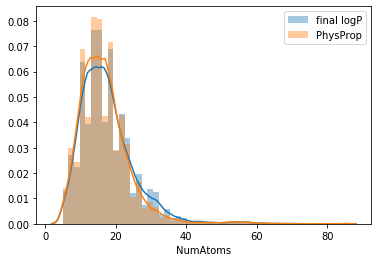

In [11]:
sns.distplot(logP_dataset_numatoms[NUM_ATOMS_COLUMN], label='final logP')
sns.distplot(physprop_dataset_numatoms[NUM_ATOMS_COLUMN], label='PhysProp')
plt.legend()